In [1]:
"""
jupyter-nbconvert report_plots.ipynb --to python; python -u report_plots.py

"""

'\njupyter-nbconvert report_plots.ipynb --to python; python -u report_plots.py\n\n'

In [2]:
from __future__ import division
import os
import glob
import pickle
from natsort import natsorted
import argparse
import os
import sys
import numpy as np
import tqdm
import pandas as pd
import cv2

import scipy as sp
import numpy as np
from pprint import pprint
import glob
import sys
sys.path.append('../')
from plume_env import PlumeEnvironment, PlumeFrameStackEnvironment
import config
import agents
import agent_analysis
import os
import sklearn
import sklearn.decomposition as skld


import sim_analysis

import importlib
import log_analysis
importlib.reload(log_analysis)

import config
np.random.seed(config.seed_global)

In [3]:
import sys
batchmode = False
if 'ipykernel_launcher' in sys.argv[0]:
    print("Interactive mode")
else:
    batchmode = True
    print("Batch/CLI mode")
    import argparse

Interactive mode


In [4]:
# Common
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.patches as mpatches



from IPython.display import clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(style="white")
# print(plt.style.available)

mpl.rcParams['figure.dpi'] = 100

mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0


dpi_save = 300
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

# Interactive vs. CLI
if not batchmode:
    %matplotlib inline
    # %config InlineBackend.figure_format = 'svg'
    %config InlineBackend.figure_format = 'retina'
if batchmode:
    matplotlib.use("Agg")
    
pca3d_figsize=(10,5)

In [5]:
# Common
# outcome_colormap = {'HOME': 'green', 
#                     'OOB':'red', 
#                     'OOT':'blue'
#                    }

# outcome_colormap = {'HOME': 'skyblue', 
#                     'OOB':'orange', 
#                     'OOT':'blue'
#                    }

# regime_colormap = {'SEARCH': 'red', 
#                    'TRACK':'green', 
#                    'RECOVER':'blue', 
#                    'WARMUP':'cyan'
#                   }

importlib.reload(config)
outcome_colormap = config.outcome_colormap
regime_colormap = config.regime_colormap



# https://seaborn.pydata.org/generated/seaborn.set_color_codes.html#seaborn.set_color_codes
sns.color_palette()
sns.set_color_codes(palette='deep')

In [6]:
if batchmode:
    parser = argparse.ArgumentParser(description='')
    parser.add_argument('--expt_dir') 
#                 default='/home/satsingh/plume/plumezoo/latest/fly/memory/')
    args = parser.parse_args()
    print(args)
    
    expt_dir = args.expt_dir
else:
#     handpicked = "1.0x"
#     diffusion_multiplier = 1.0 # 2022-07-28 Fig2, all but (c)
#     expt_dir = '/home/satsingh/plume/plumezoo/latest/fly/memory/'

    handpicked = "0.5x"
    diffusion_multiplier = 0.5 # latest/memory is now 0.5
    expt_dir = '/home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained//'
    
#     expt_dir = '/home/satsingh/plume/plumezoo/latest/fly/diff33/'
#     expt_dir = '/home/satsingh/plume/plumezoo/latest/fly/diff50/'
#     expt_dir = '/home/satsingh/plume/plumezoo/latest/fly/diff75/'


outdir = f'{expt_dir}/report_common_subspace/'
os.makedirs(outdir, exist_ok=True)

In [7]:
# diffusion_dict = {
#     'diff33':0.33,
#     'diff50':0.50,
#     'diff75':0.75,
# }

# for k in  diffusion_dict.keys():
#     if k in expt_dir:
#         diffusion_multiplier = diffusion_dict[k] 

In [8]:
models = natsorted(glob.glob(f'{expt_dir}/*VRNN*.pt'))
assert len(models) > 0

In [9]:
use_datasets = ['constantx5b5', 'switch45x5b5', 'noisy3x5b5', 
#                 'constantx5b5_0.2', 
                'constantx5b5_0.4', 
#                 'constantx5b5_0.6', 
               ]
selected_df_all = []

for model_fname in models:
    model_dir = model_fname.replace('.pt', '/')
    print("model_dir", model_dir)
    model_seed = model_dir.split('seed')[-1].split('/')[0]

#     outdir = f"{model_dir}/report_common_subspace/"
#     os.makedirs(outdir, exist_ok=True)
#     print(outdir)

#     is_recurrent = True if ('GRU' in model_dir) or ('VRNN' in model_dir) else False

#     logfiles = natsorted(glob.glob(model_dir + '*.pkl'))
#     [ x.split('/')[-1] for x in logfiles ]

    selected_df = log_analysis.get_selected_df(model_dir, 
                                  use_datasets, 
                                  n_episodes_home=60, 
                                  n_episodes_other=60,
                                  min_ep_steps=0)
    selected_df['model_seed'] = model_seed
    print(model_seed, selected_df.shape)
    selected_df_all.append( selected_df )



model_dir /home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9/
3307e9 (366, 6)
model_dir /home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed9781ba/
9781ba (392, 6)
model_dir /home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed776762/
776762 (460, 6)
model_dir /home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed2760377/
2760377 (478, 6)
model_dir /home/satsingh/p

In [10]:
selected_df_all = pd.concat(selected_df_all)
selected_df_all.shape

(2088, 6)

In [11]:
selected_df_all.groupby(['model_seed', 'dataset', 'outcome']).count()

idx  ep_length  log
model_seed dataset          outcome                     
2760377    constantx5b5     HOME      60         60   60
                            OOB       60         60   60
           constantx5b5_0.4 HOME      60         60   60
                            OOB       60         60   60
           noisy3x5b5       HOME      59         59   59
                            OOB       59         59   59
           switch45x5b5     HOME      60         60   60
                            OOB       60         60   60
3199993    constantx5b5     HOME      60         60   60
                            OOB       60         60   60
           constantx5b5_0.4 HOME      60         60   60
                            OOB       60         60   60
           noisy3x5b5       HOME      26         26   26
                            OOB       26         26   26
           switch45x5b5     HOME      50         50   50
                            OOB       50         50   50
3307e9     constantx5b5     HOME      38         38   38
                            OOB       38         38   38
           constantx5b5_0.4 HOME      36         36   36
                            OOB       36         36   36
           noisy3x5b5       HOME      49         49   49
                            OOB       49         49   49
           switch45x5b5     HOME      60         60   60
                            OOB       60         60   60
776762     constantx5b5     HOME      60         60   60
                            OOB       60         60   60
           constantx5b5_0.4 HOME      60         60   60
                            OOB       60         60   60
           noisy3x5b5       HOME      60         60   60
                            OOB       60         60   60
           switch45x5b5     HOME      50         50   50
                            OOB       50         50   50
9781ba     constantx5b5     HOME      60         60   60
                            OOB       60         60   60
           constantx5b5_0.4 HOME      26         26   26
                            OOB       26         26   26
           noisy3x5b5       HOME      50         50   50
                            OOB       50         50   50
           switch45x5b5     HOME      60         60   60
                            OOB       60         60   60

In [12]:
# Find a few good examples
# importlib.reload(agent_analysis)
# import sim_analysis
# importlib.reload(sim_analysis)
# # dataset = 'switch45x5b5'
# dataset = 'noisy3x5b5'
# # dataset = 'constantx5b5'
# birthx = 1.0
# # birthx = 0.4

# dataset_ = dataset if birthx==1.0 else f"{dataset}_{birthx}"
# subset =  selected_df_all.query("outcome == 'HOME' and dataset == @dataset_ and model_seed == '3307e9'").sample(5)
# # subset =  selected_df_all.query("outcome == 'HOME' and dataset == @dataset_").groupby(by='model_seed').sample(1)
# logs = subset['log'].to_list()
# idxs = subset['idx'].to_list()
# print(idxs)
# agent_analysis.visualize_episodes(logs, 
#                                   zoom=-1, 
#                                   dataset=dataset,
#                                   episode_idxs=idxs,
#                                   animate=False,
#                                   plotsize=(8,8), 
#                                   birthx=birthx,
#                                       diffusionx=diffusion_multiplier,
#                                  )

In [13]:
if handpicked == "1.0x":
    # 1.0x
    ep_selected = []
    ep_selected.append({'dataset':'constantx5b5', 'model_seed':'9781ba', 
                        'idx':196, 'birthx':1.0, 'zoom':1, 'order':1 })
    ep_selected.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':153, 'birthx':0.4, 'zoom':1, 'order':2})
    ep_selected.append({'dataset':'switch45x5b5', 'model_seed':'9781ba', 
                        'idx':219, 'birthx':1.0, 'zoom':2, 'order':3})
    ep_selected.append({'dataset':'noisy3x5b5', 'model_seed':'541058', 
                        'idx':112, 'birthx':1.0, 'zoom':2, 'order':4})
    ep_selected = pd.DataFrame(ep_selected)

if handpicked == "0.5x":
    # 0.50x
    ep_selected = []
    ep_selected.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':107, 'birthx':1.0, 'zoom':1, 'order':1})
    ep_selected.append({'dataset':'switch45x5b5', 'model_seed':'3307e9', 
                        'idx':158, 'birthx':1.0, 'zoom':2, 'order':2})
    ep_selected.append({'dataset':'noisy3x5b5', 'model_seed':'3307e9', 
                        'idx':98, 'birthx':1.0, 'zoom':2, 'order':3})
    ep_selected.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':106, 'birthx':0.4, 'zoom':1, 'order':4})
    ep_selected = pd.DataFrame(ep_selected)

if handpicked == "0.33x":                                                                          
    # 0.33x
    ep_selected = []
    ep_selected.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':137, 'birthx':1.0, 'zoom':1})
    ep_selected.append({'dataset':'switch45x5b5', 'model_seed':'3307e9', 
                        'idx':118, 'birthx':1.0, 'zoom':2})
    ep_selected.append({'dataset':'noisy3x5b5', 'model_seed':'3307e9', 
                        'idx':137, 'birthx':1.0, 'zoom':2})
    ep_selected.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':41, 'birthx':0.4, 'zoom':1})
    ep_selected = pd.DataFrame(ep_selected)

ep_selected

dataset model_seed  idx  birthx  zoom  order
0  constantx5b5     3307e9  107     1.0     1      1
1  switch45x5b5     3307e9  158     1.0     2      2
2    noisy3x5b5     3307e9   98     1.0     2      3
3  constantx5b5     3307e9  106     0.4     1      4

## Figure 1

In [14]:
# ep_selected = ep_selected.sort_values(['model_seed','dataset','order'])
ep_selected = ep_selected.sort_values(['model_seed','order'])

In [15]:
# Return sequence of concentrations while walking y-axis along passed x_val 
def walk_y(data_at_t, x_val, y_vals=[0.0]):
    q1 = str(x_val) + ' > x_minus_radius and ' + str(x_val) + ' < x_plus_radius'
    data_t_x = data_at_t.query(q1)     
    concentrations = []
    for y_val in y_vals:
        q2 = str(y_val) + ' > y_minus_radius and ' + str(y_val) + ' < y_plus_radius'
        c = data_t_x.query(q2).concentration.sum()
        concentrations.append(c)
    return concentrations

# Return sequence of concentrations while walking x-axis along passed y_val 
def walk_x(data_at_t, y_val, x_vals=[0., 1., 2., 3., 4., 5.]):
    q1 = str(y_val) + ' > y_minus_radius and ' + str(y_val) + ' < y_plus_radius'
    data_t_y = data_at_t.query(q1)     
    concentrations = []
    for x_val in x_vals:
        q2 = str(x_val) + ' > x_minus_radius and ' + str(x_val) + ' < x_plus_radius'
        c = data_t_y.query(q2).concentration.sum()
        concentrations.append(c)
    return concentrations

dataset       constantx5b5
model_seed          3307e9
idx                    107
birthx                 1.0
zoom                     1
order                    1
Name: 0, dtype: object
constantx5b5
Applying diffusion_multiplier 0.5


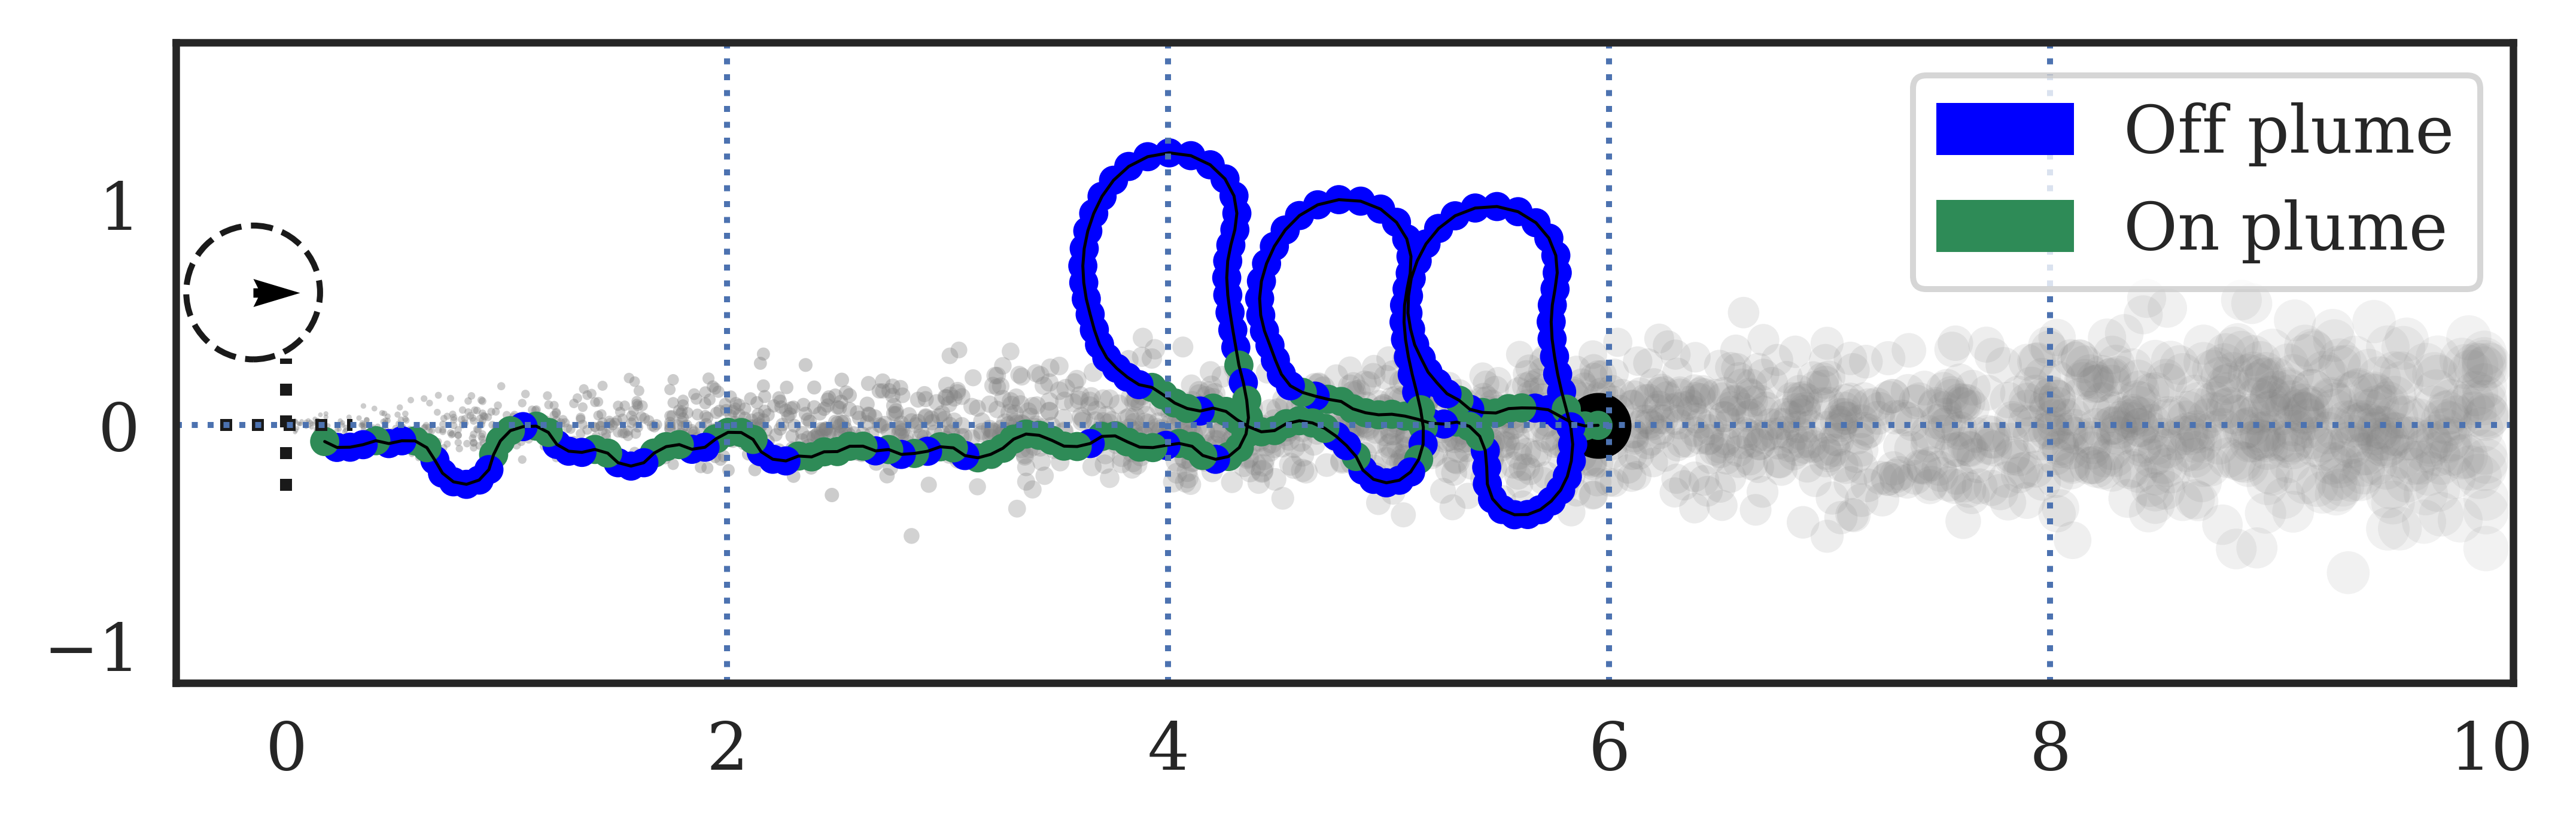

seed specific thresholds 12 35
constantx5b5
Applying diffusion_multiplier 0.5
Y-range:  [-1.17041015625, 1.7330436014891457] 2.903453757739146
ylims [-1.17041015625, 1.7330436014891457]
Dataset constantx5b5, yrange 2.903453757739146, figsize (1.7, 1.25)


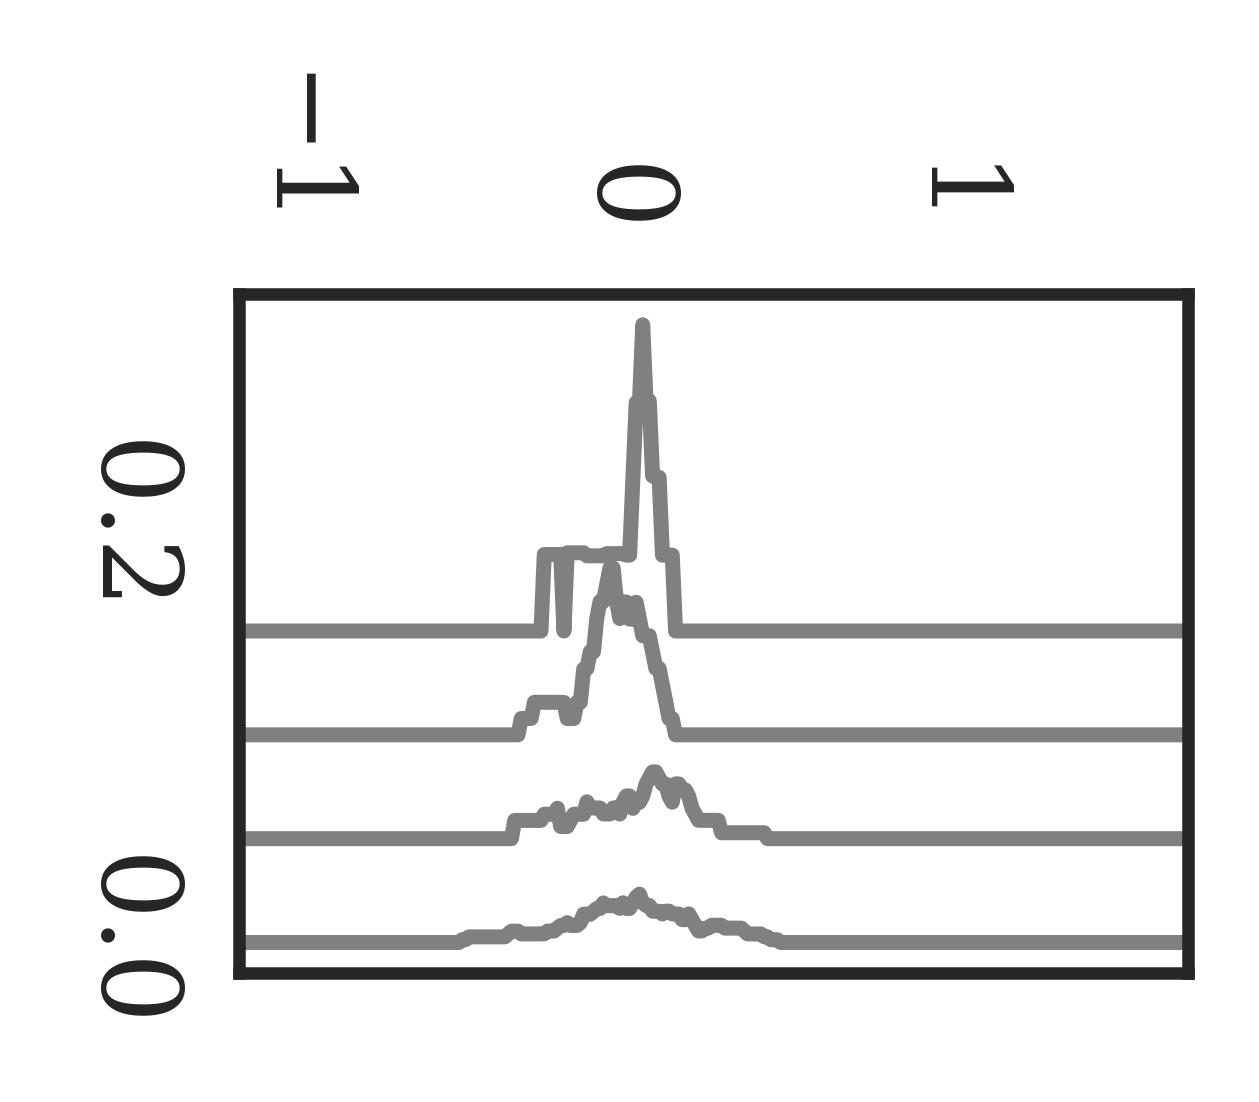

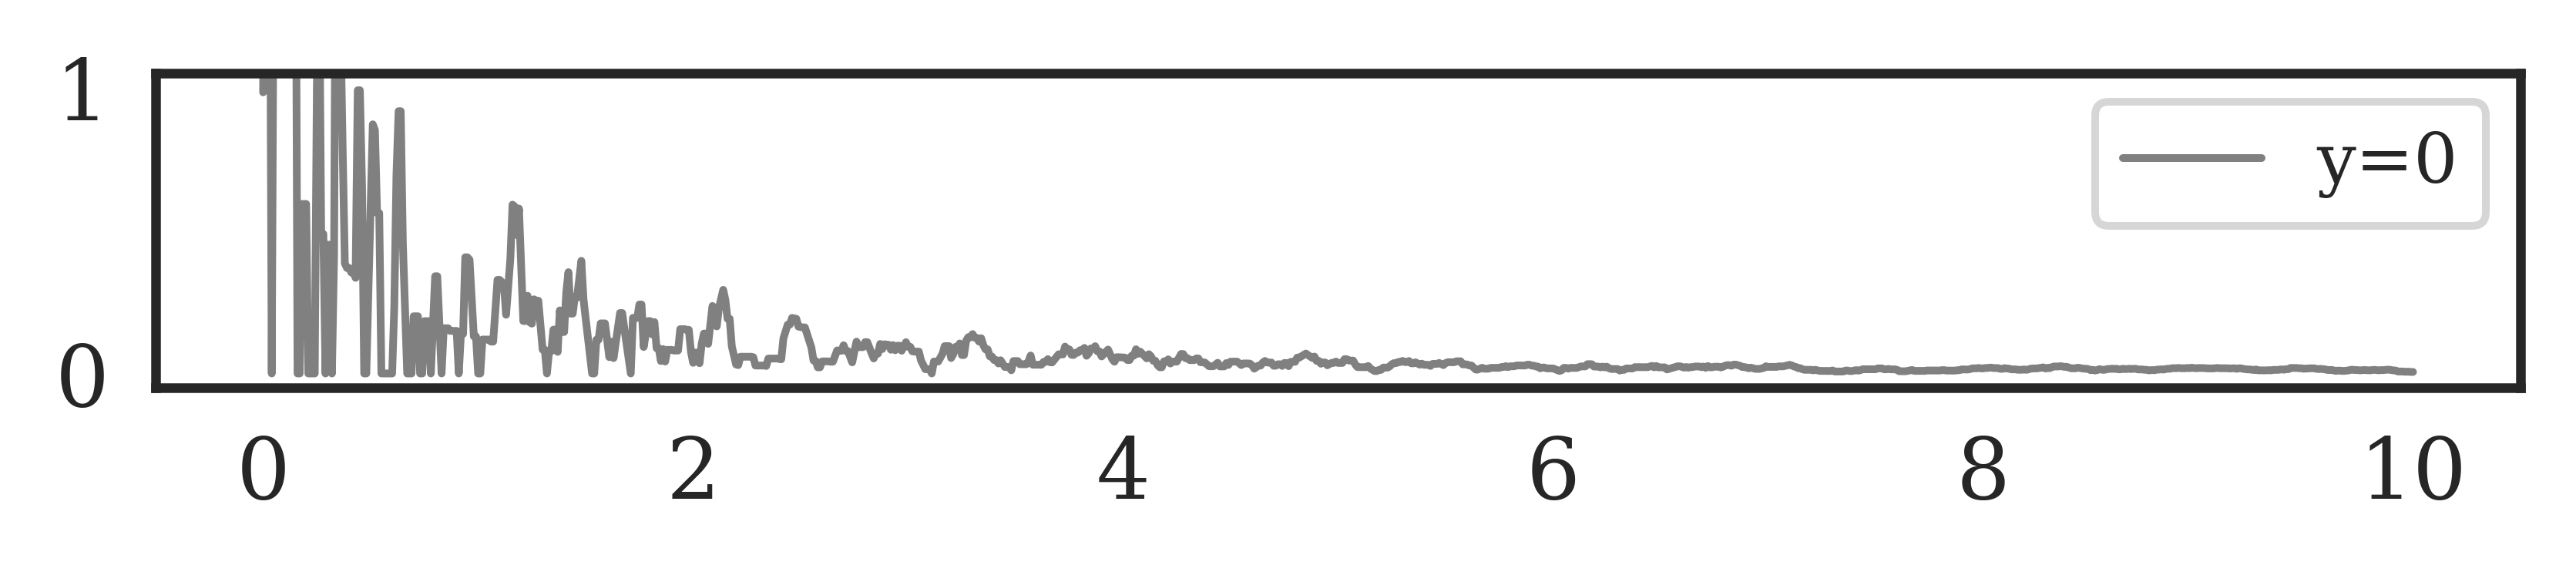

seed specific thresholds 12 35


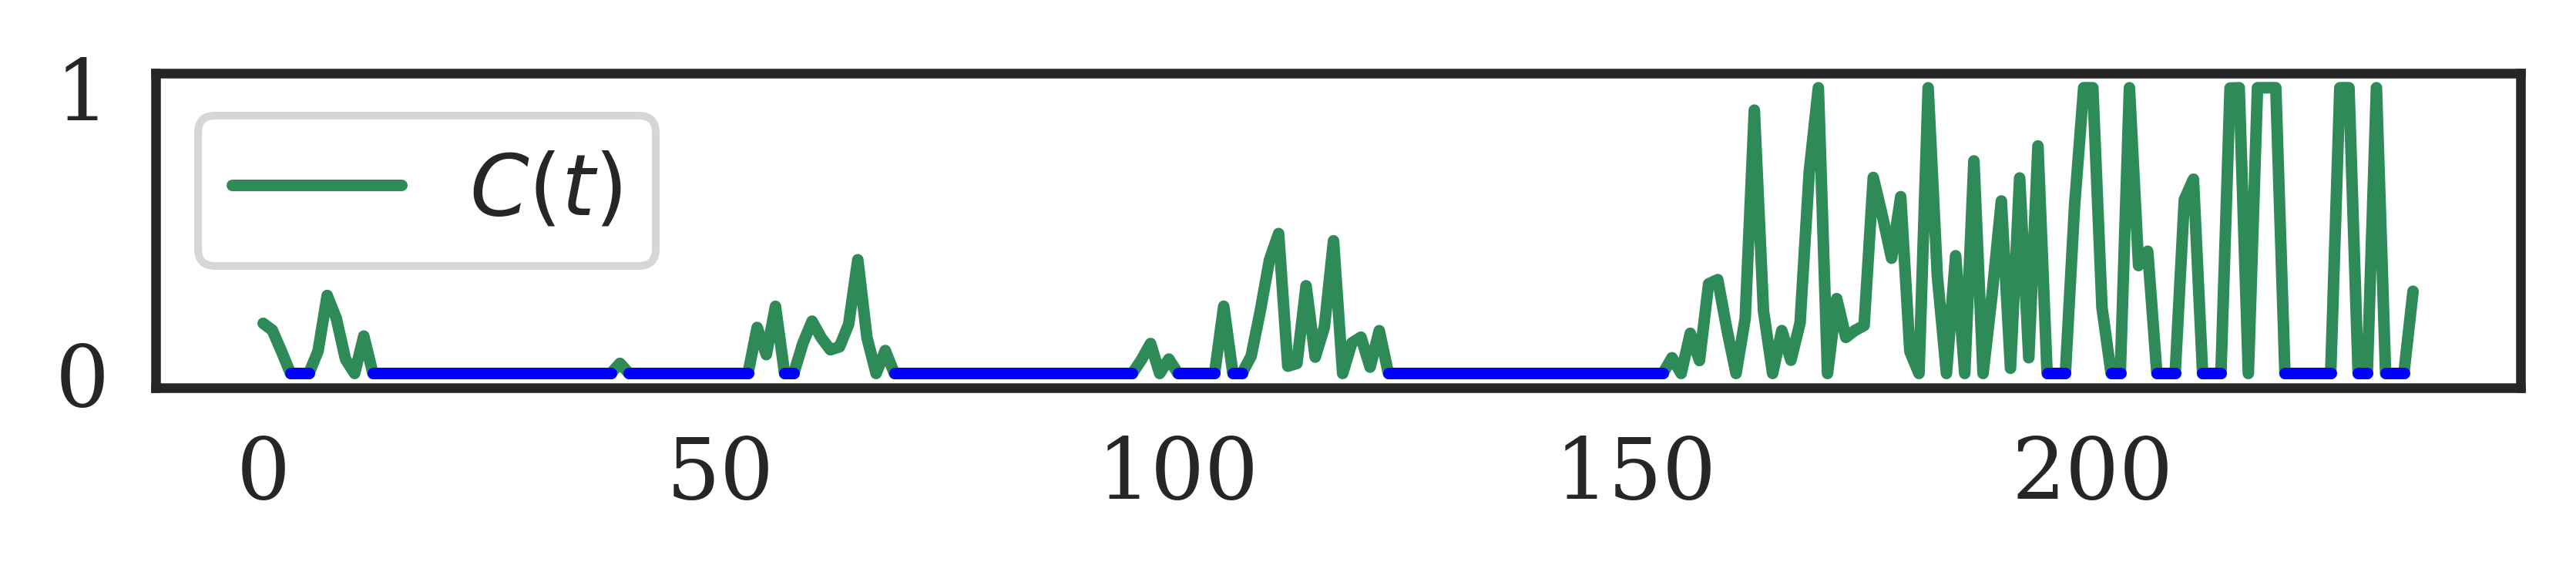

dataset       switch45x5b5
model_seed          3307e9
idx                    158
birthx                 1.0
zoom                     2
order                    2
Name: 1, dtype: object
switch45x5b5
Applying diffusion_multiplier 0.5


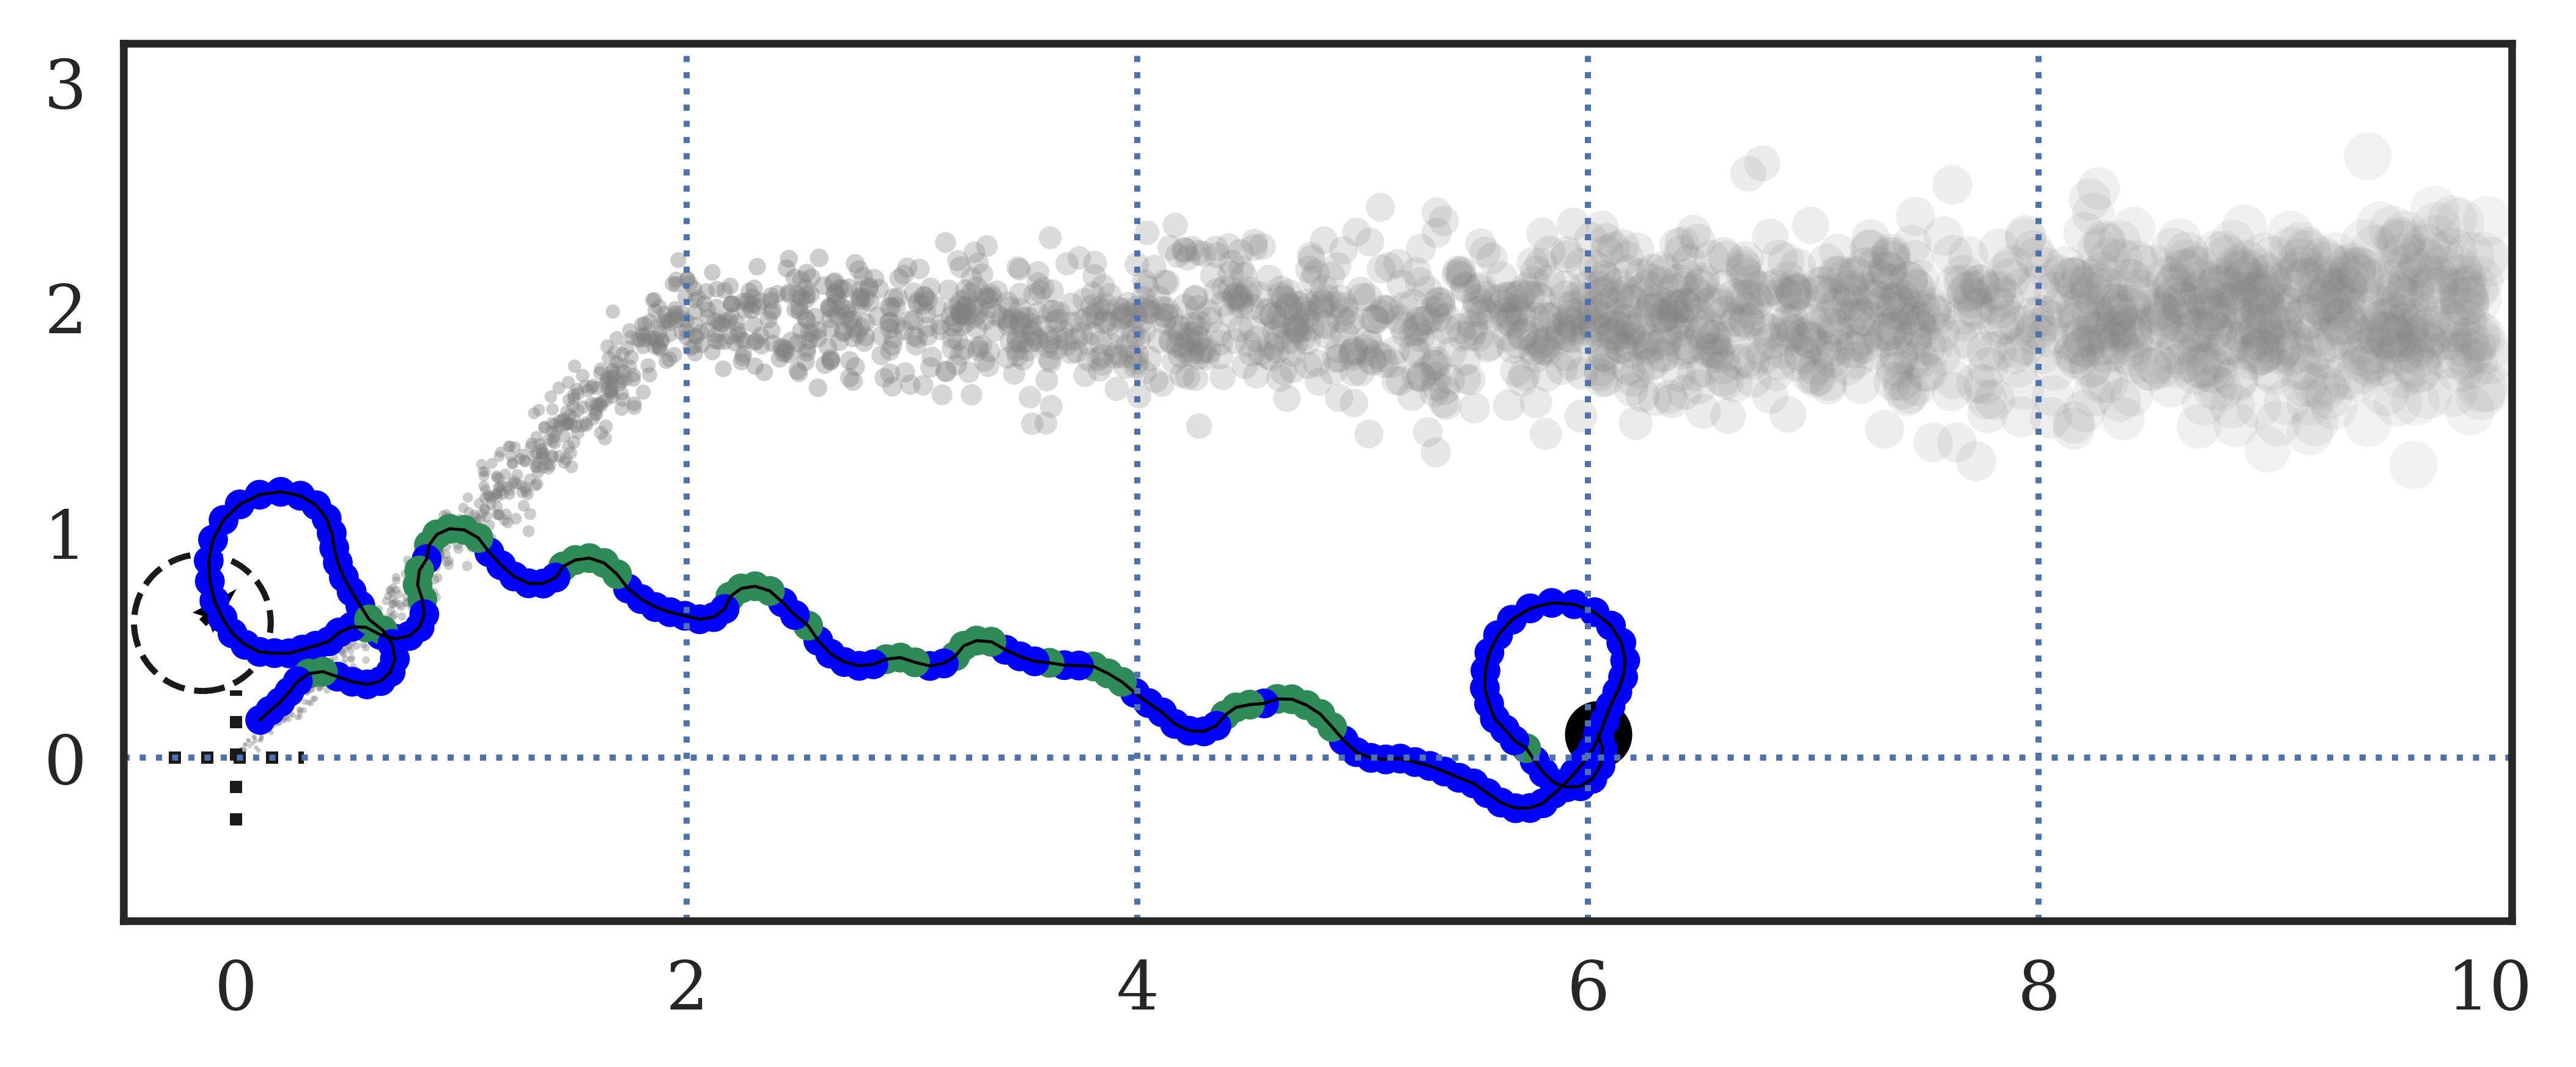

seed specific thresholds 12 35
switch45x5b5
Applying diffusion_multiplier 0.5
Y-range:  [-0.7235917061017099, 3.169921875] 3.89351358110171
ylims [-0.7235917061017099, 3.169921875]
Dataset switch45x5b5, yrange 3.89351358110171, figsize (2.5956757207344734, 1.25)


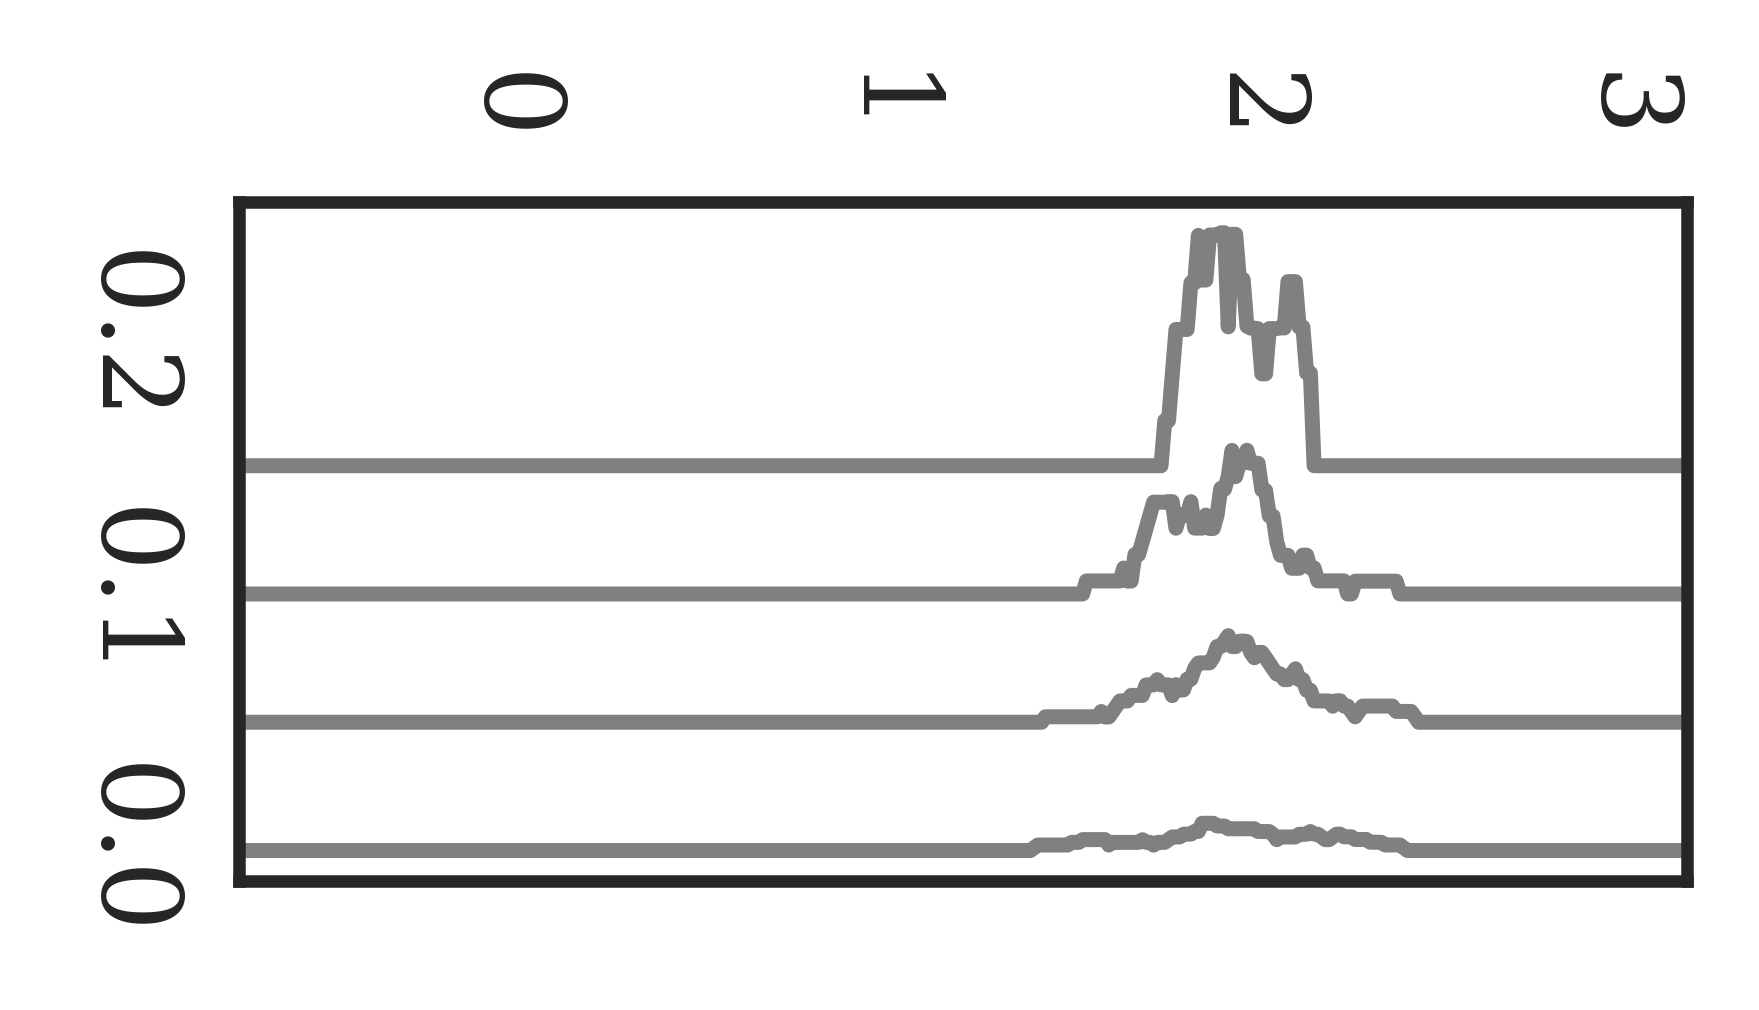

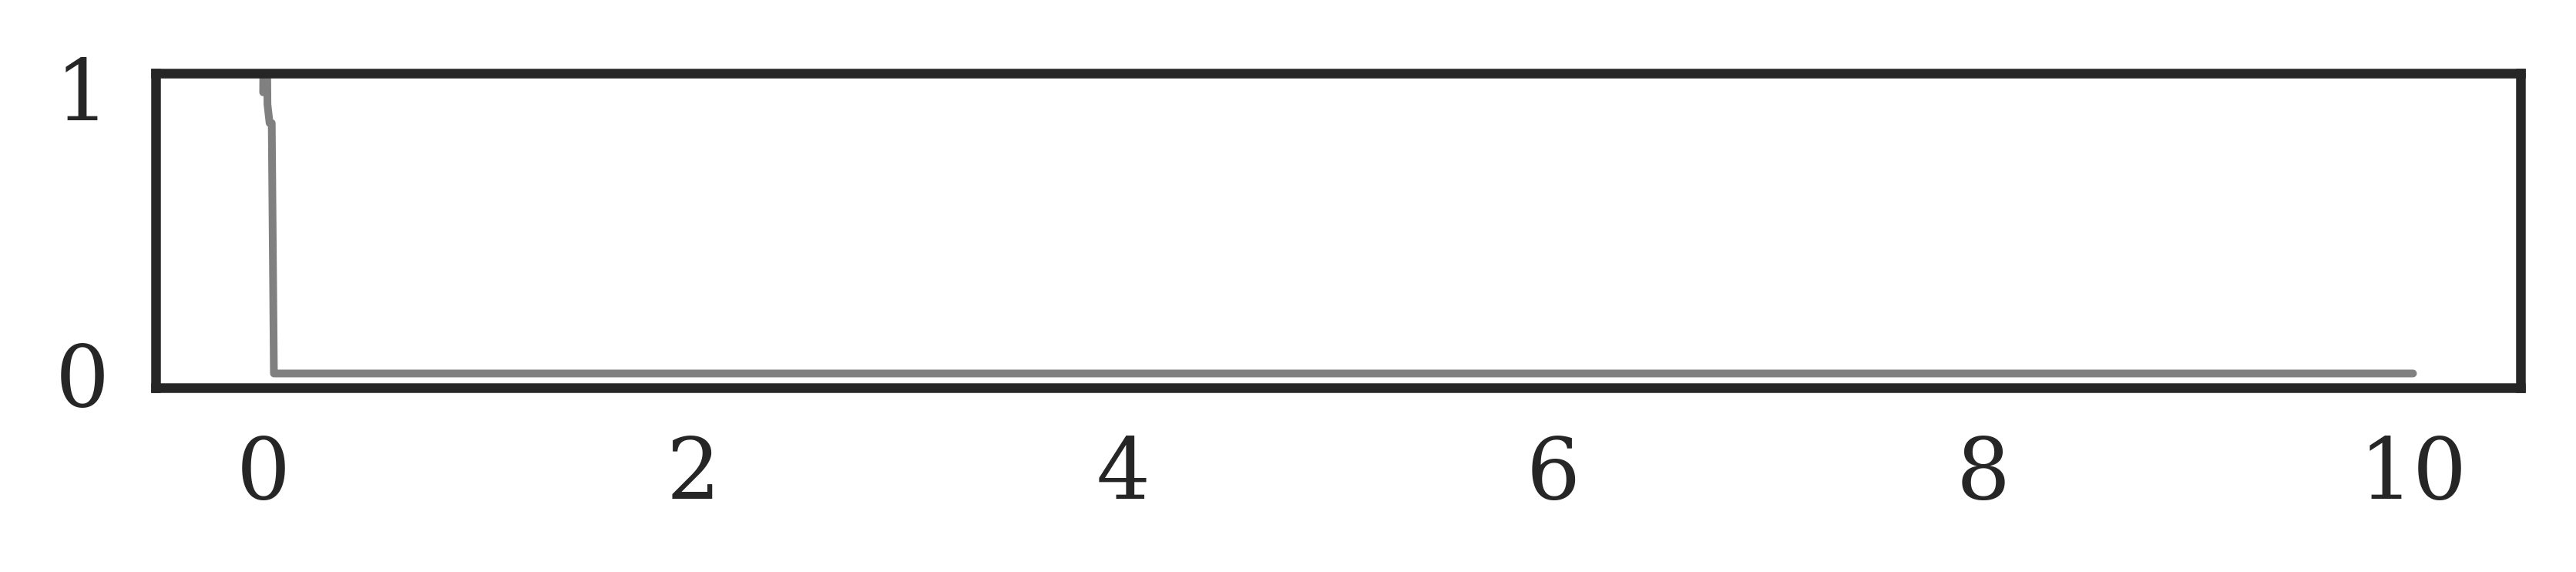

seed specific thresholds 12 35


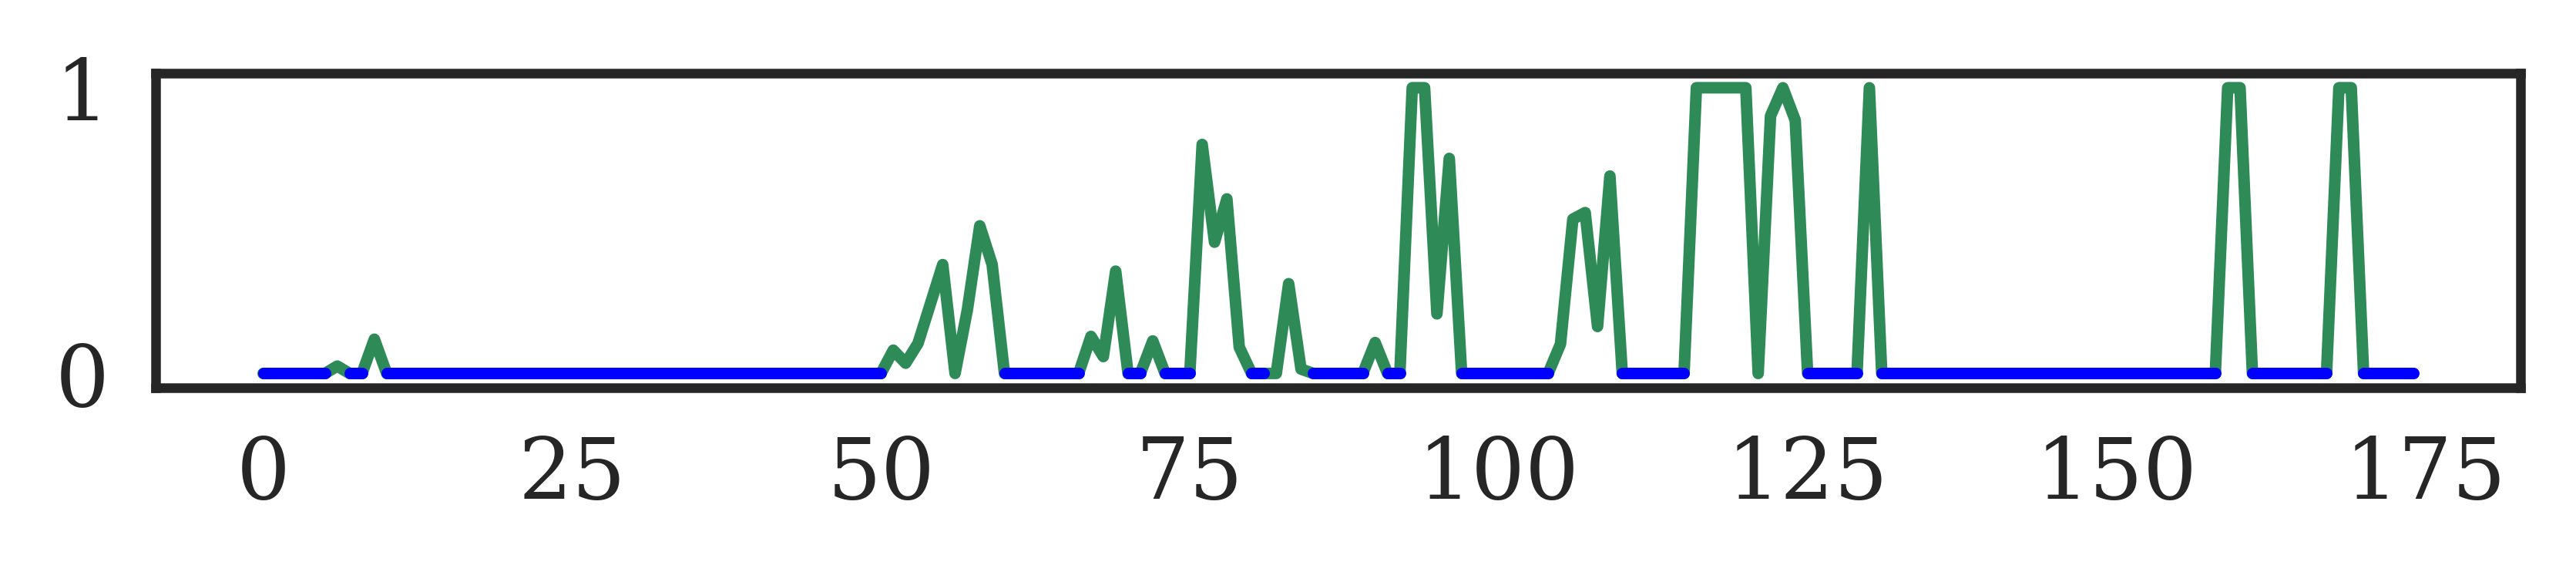

dataset       noisy3x5b5
model_seed        3307e9
idx                   98
birthx               1.0
zoom                   2
order                  3
Name: 2, dtype: object
noisy3x5b5
Applying diffusion_multiplier 0.5


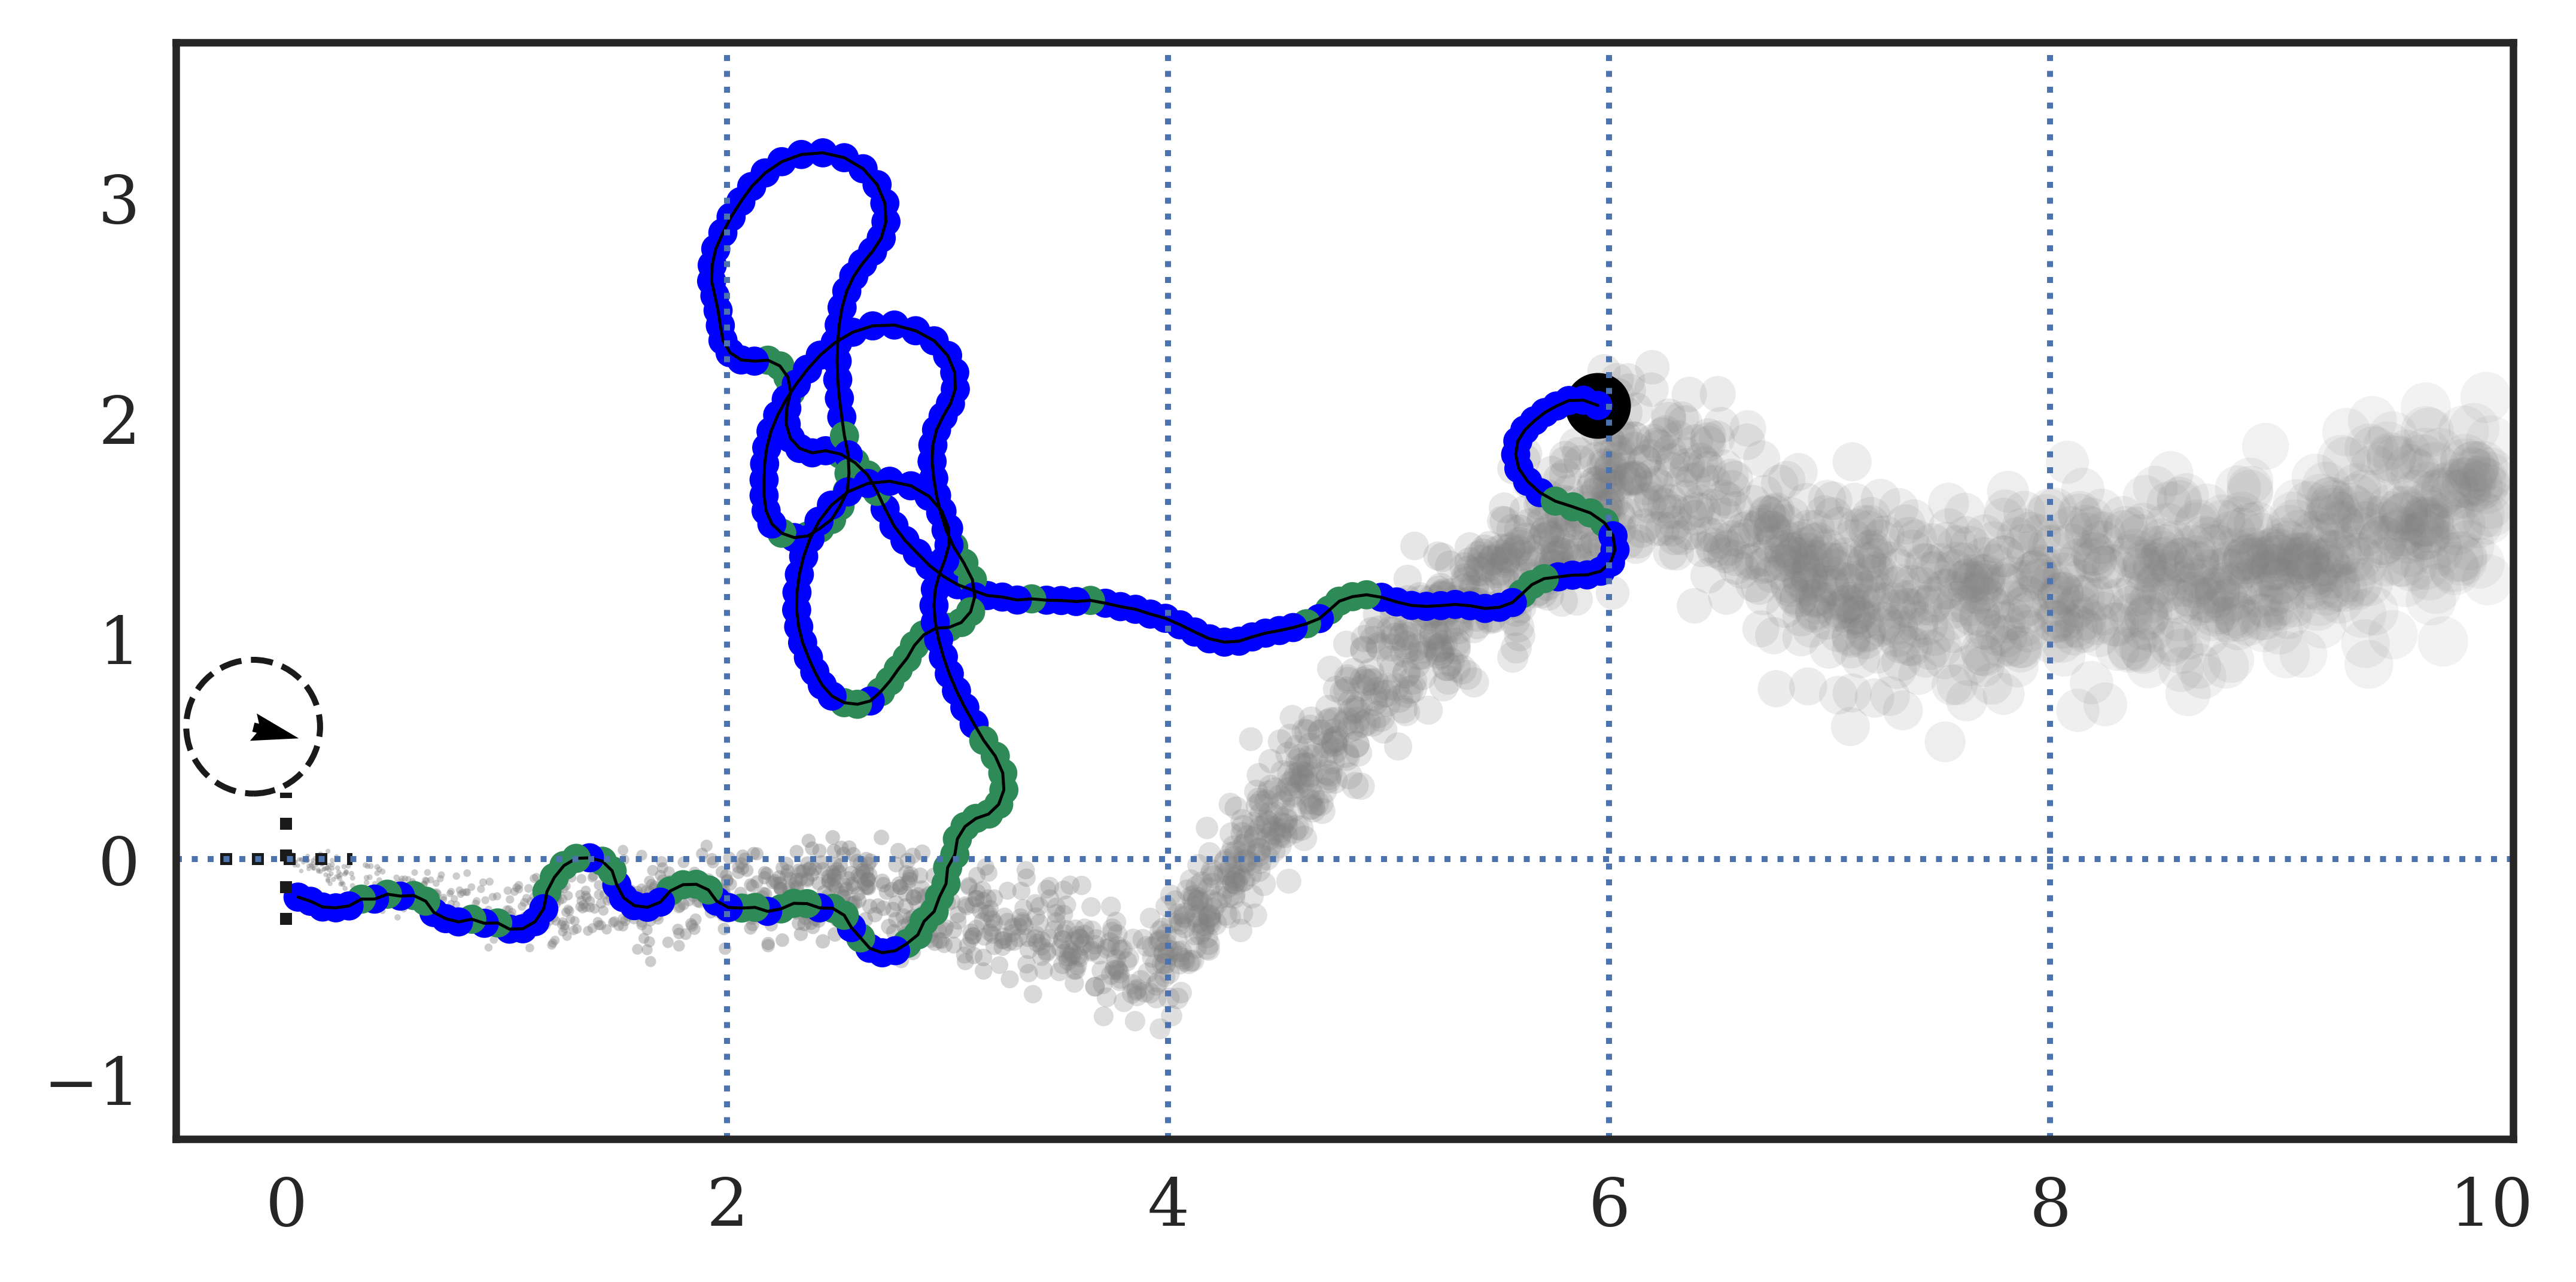

seed specific thresholds 12 35
noisy3x5b5
Applying diffusion_multiplier 0.5
Y-range:  [-1.2705078125, 3.7032597339449214] 4.973767546444922
ylims [-1.2705078125, 3.7032597339449214]
Dataset noisy3x5b5, yrange 4.973767546444922, figsize (3.315845030963281, 1.25)


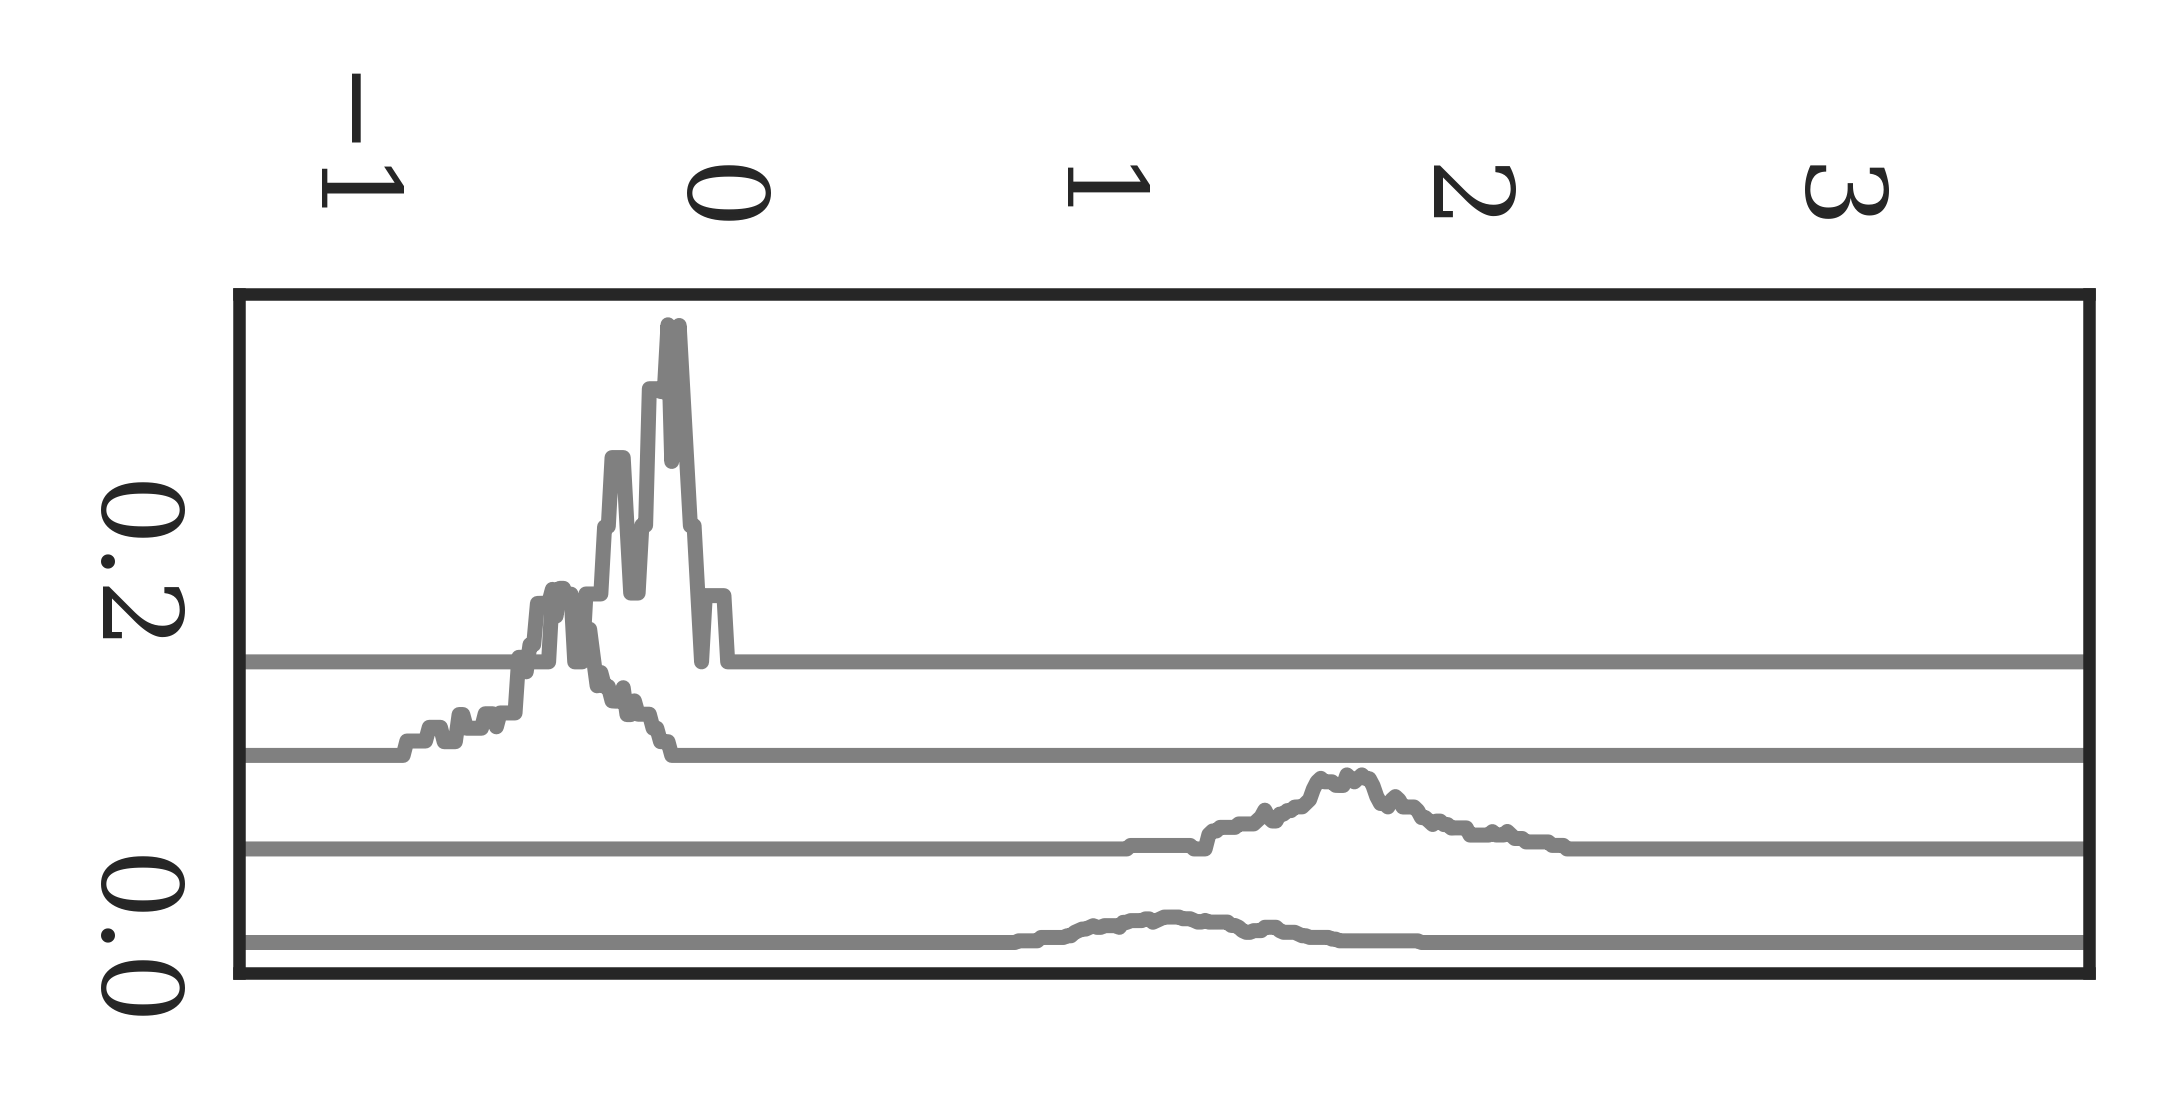

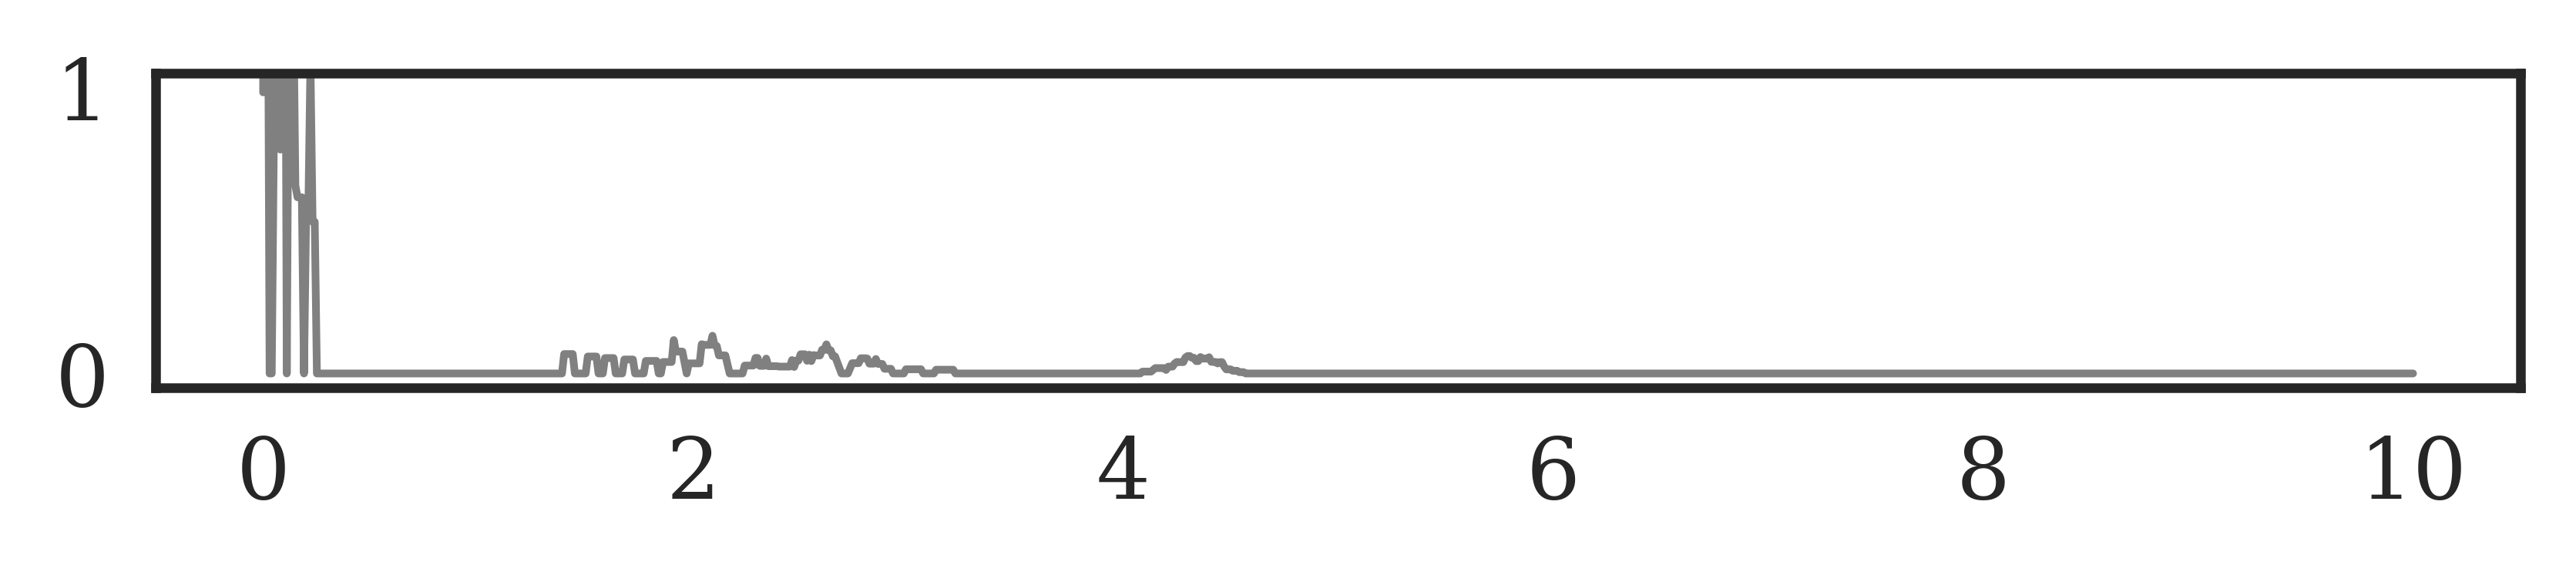

seed specific thresholds 12 35


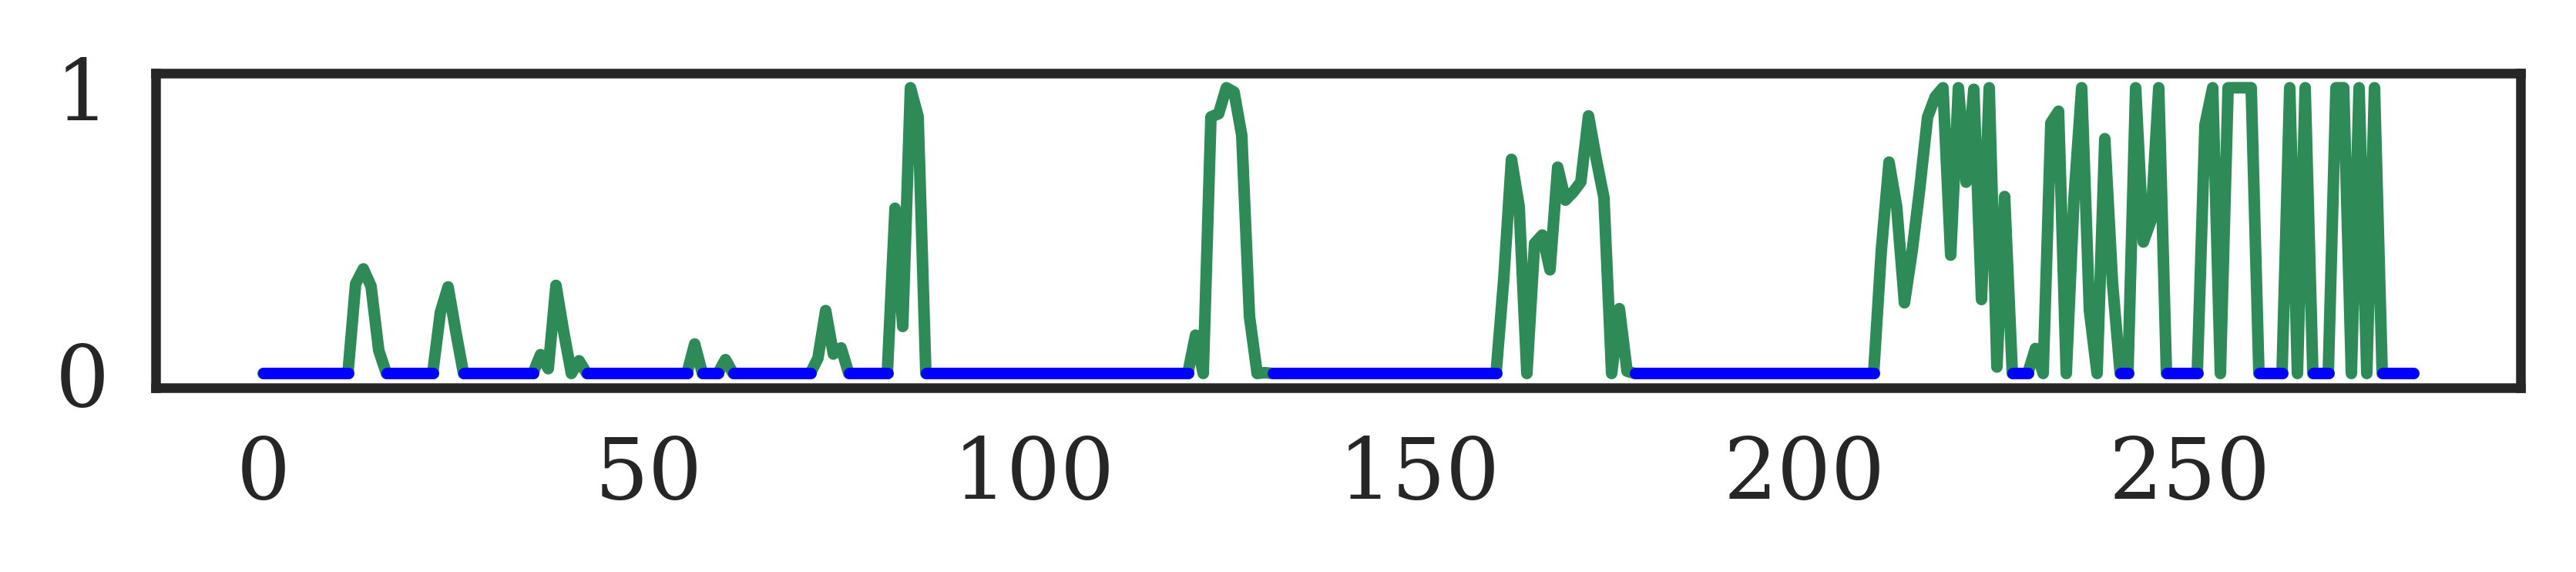

dataset       constantx5b5
model_seed          3307e9
idx                    106
birthx                 0.4
zoom                     1
order                    4
Name: 3, dtype: object
constantx5b5
Sparsifying puffs to 0.4x
Applying diffusion_multiplier 0.5


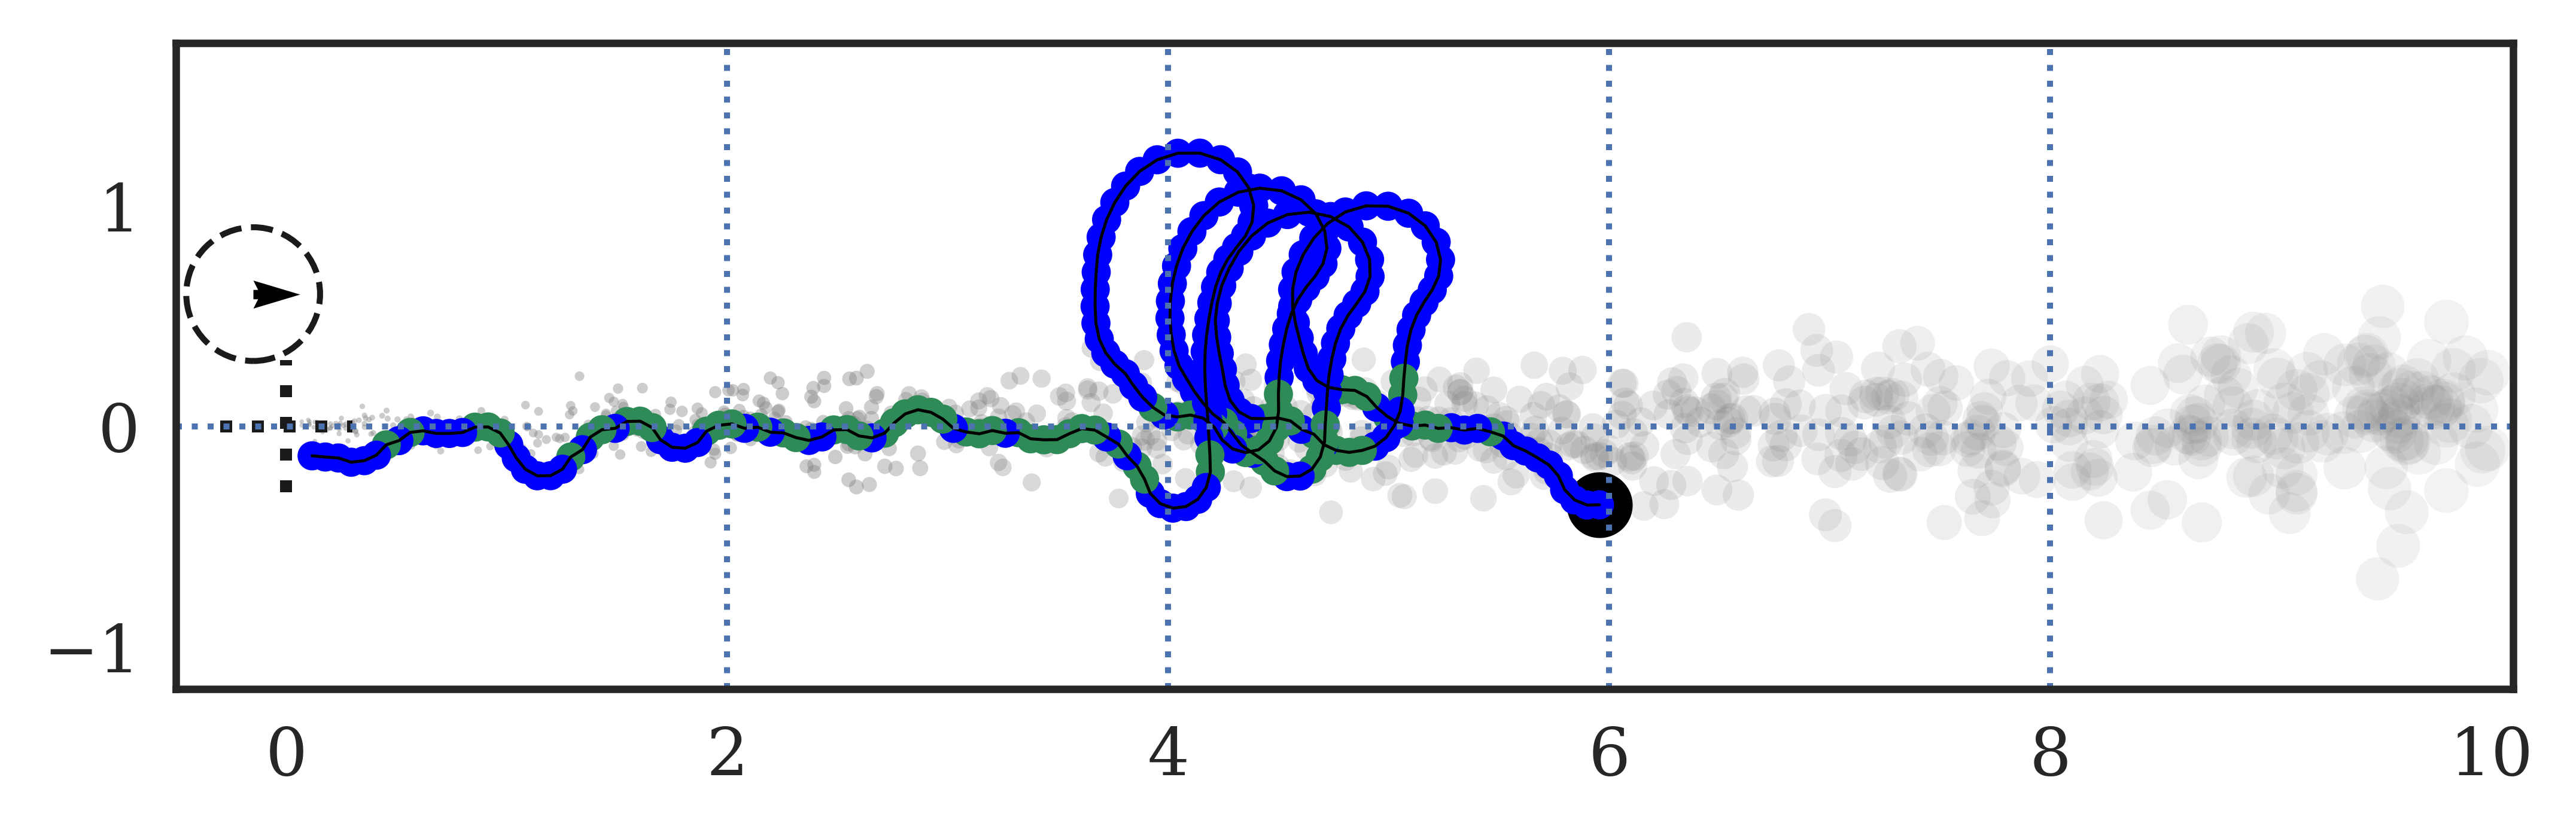

seed specific thresholds 12 35
constantx5b5
Sparsifying puffs to 0.4x
Applying diffusion_multiplier 0.5
Y-range:  [-0.993408203125, 1.7395783495944233] 2.7329865527194235
ylims [-0.993408203125, 1.7395783495944233]
Dataset constantx5b5, yrange 2.7329865527194235, figsize (2, 1.25)


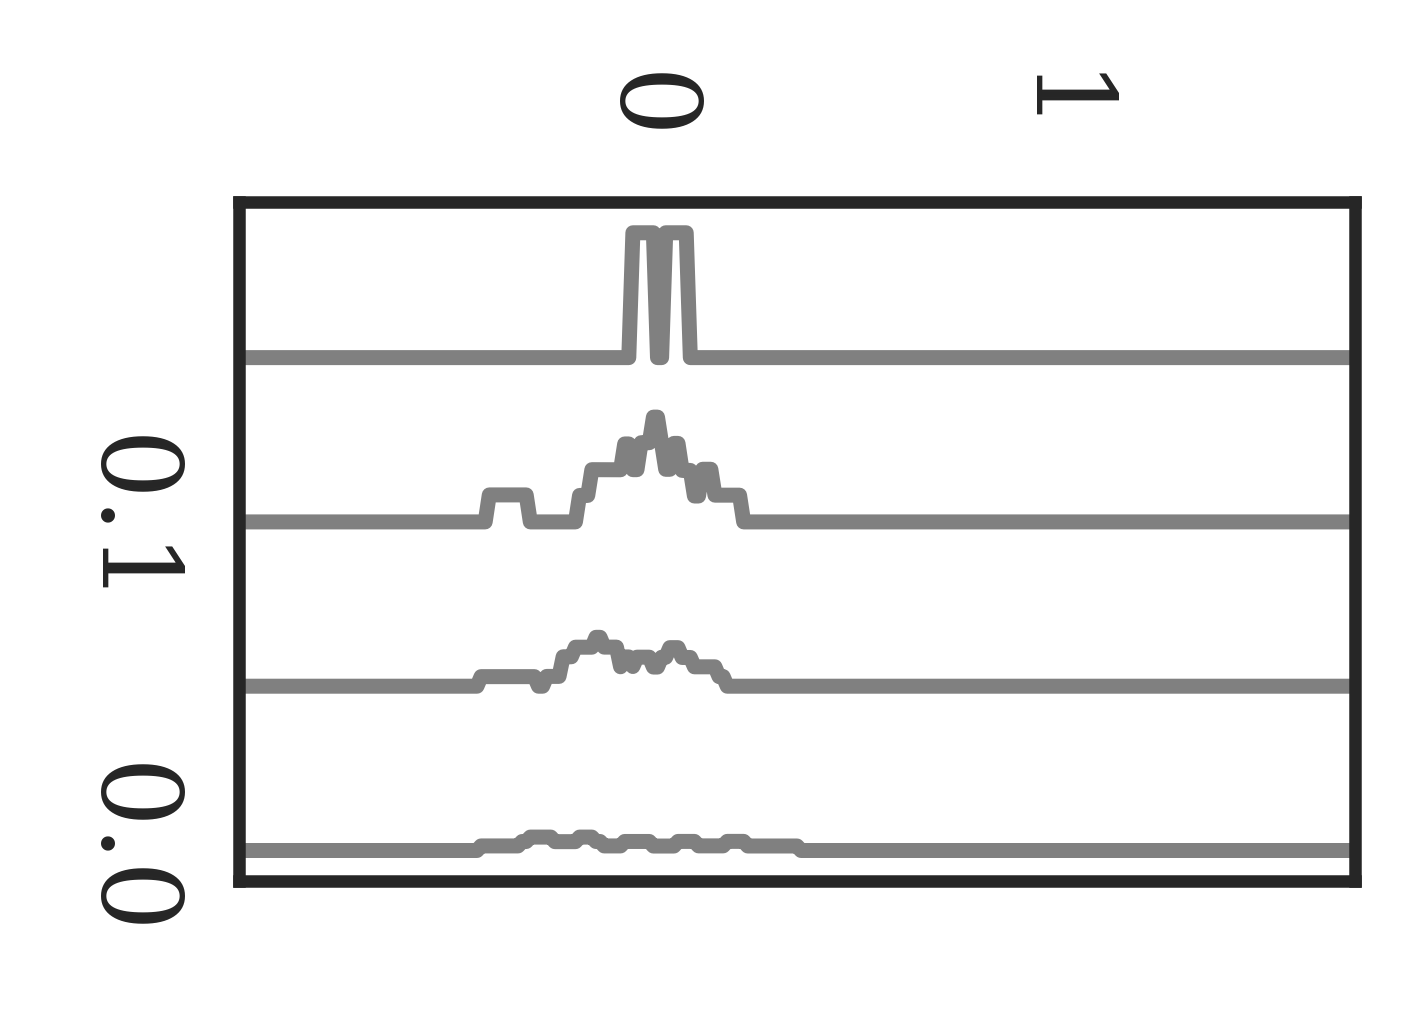

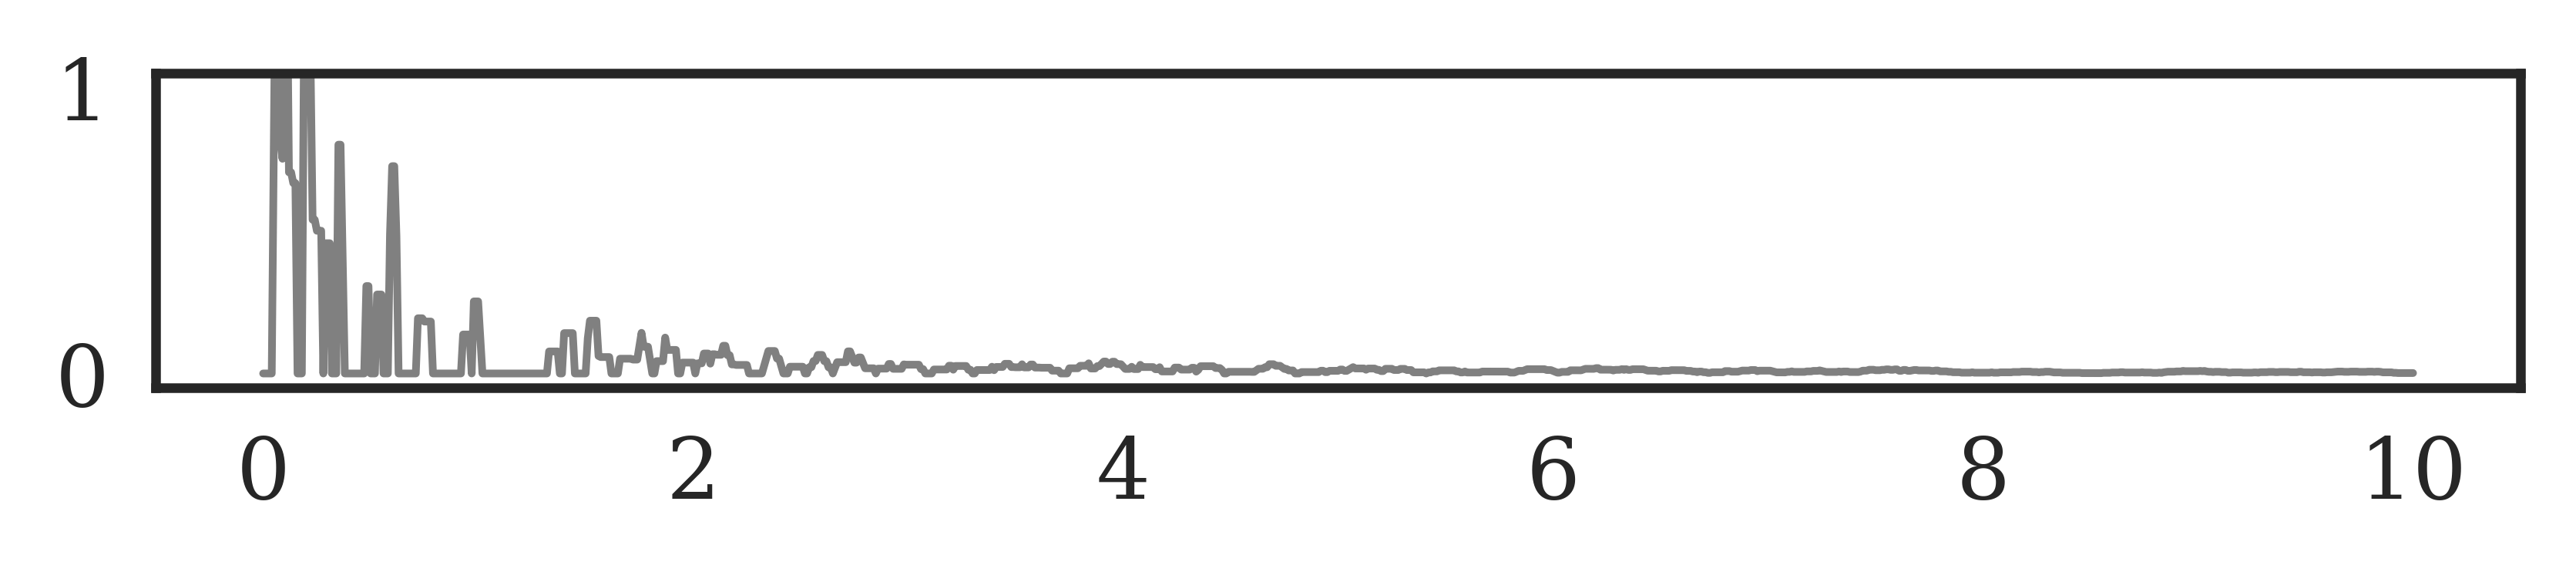

seed specific thresholds 12 35


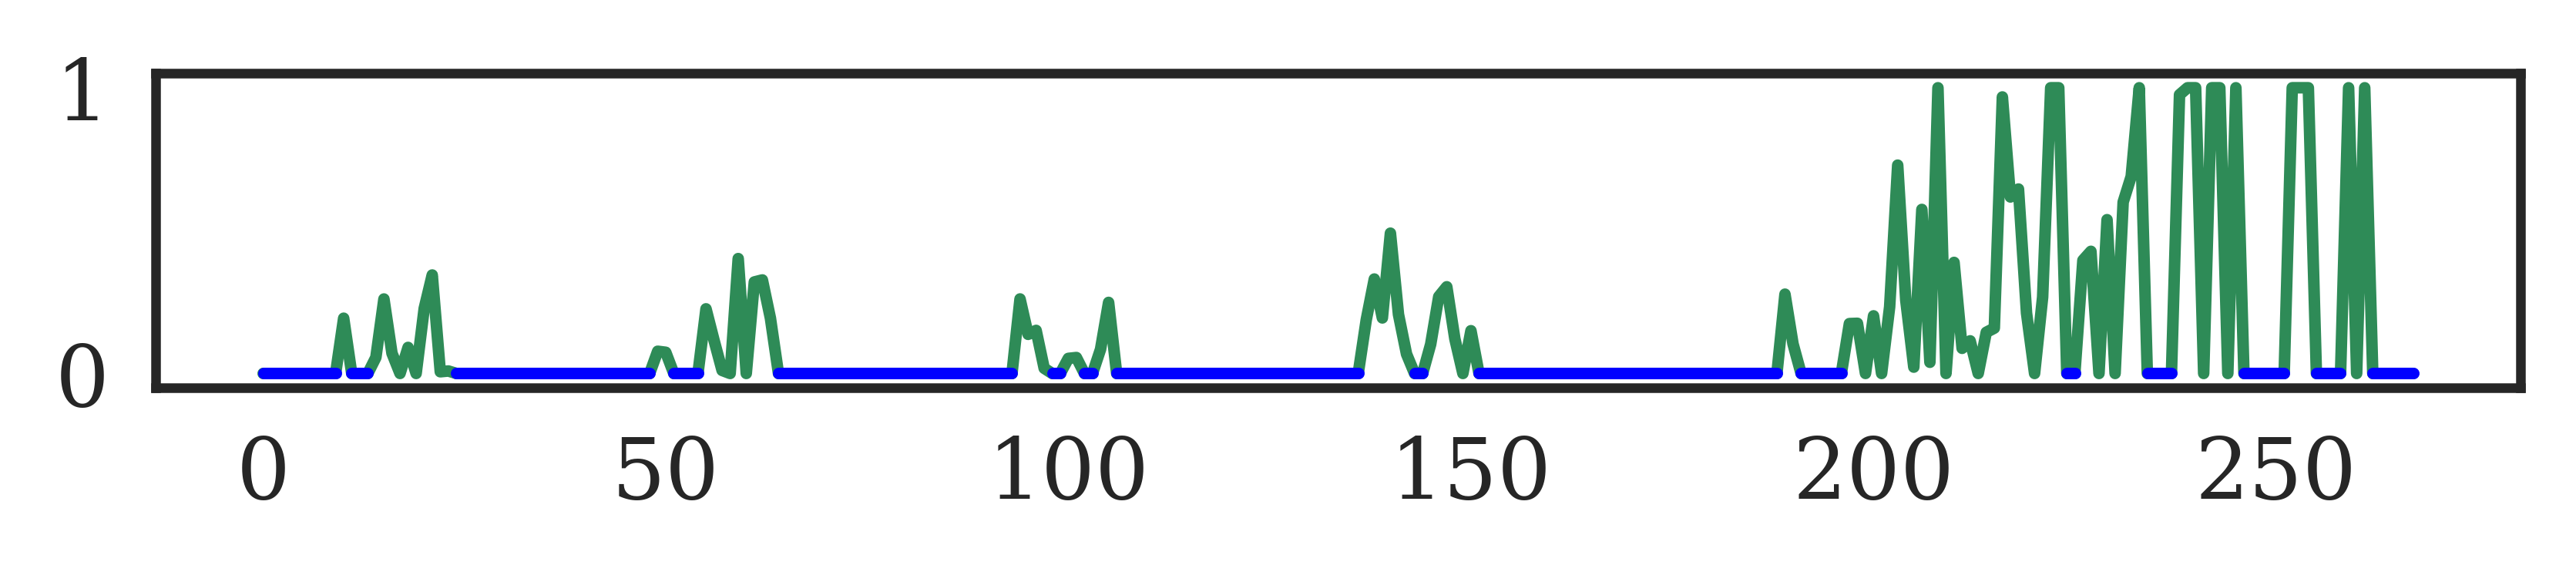

In [16]:
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 360

importlib.reload(config)
importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)

forCosyne = False
forNMI = True

for idx, row in ep_selected.iterrows():
    print(row)
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = row['idx']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
#     print(task)

    subset = selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list() # only one episode in logs
    zoom = row['zoom']
    zoom = -1
    if len(logs) != 1:
        print("Error locating", row)
        continue

        

    
    
    # Trajectory plot
    legend = True if (dataset == 'constantx5b5' and birthx==1.0) else False
    figs, axs = agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(7,7), 
                                      birthx=birthx,
                                      diffusionx=diffusion_multiplier,
                                      legend=legend,
                                     )
    # Getting size info
#     print(figs, axs)
#     fig = plt.gcf()
#     size = fig.get_size_inches()
#     ax = plt.gca()
#     bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     bbox2 = axs[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     print("Traj plot size", size, 
#           bbox.width, bbox.height,
#           bbox2.width, bbox2.height)
#     tmpimg = "/tmp/tmp.png"
#     plt.savefig(tmpimg, dpi=dpi_save)
#     imsaved = cv2.imread(tmpimg)
#     print("Saved fig shape", imsaved.shape, [s*1.0/dpi_save for s in imsaved.shape])
    
    ax_traj = plt.gca()
    if forNMI:
        ax = plt.gca()
        ax.axvline(x=2, linestyle=':', lw=1.0)
        ax.axvline(x=4, linestyle=':', lw=1.0)
        ax.axvline(x=6, linestyle=':', lw=1.0)
        ax.axvline(x=8, linestyle=':', lw=1.0)
        ax.axhline(y=0, linestyle=':', lw=1.0)
    
    # Plot centerlines for Cosyne abstract
    if ('noisy3' in dataset or 'switch' in dataset) and forCosyne: 
        centerline_filename = f'{config.datadir}/centerline_data_{dataset}.pickle' 
        centerline_df = pd.read_pickle(centerline_filename)
        
        t_val = [record[0]['t_val'] for record in logs[0]['infos']][-1]
        tidx = int(t_val*100)
        centerline_t = centerline_df[ centerline_df.tidx == tidx ]
        plt.plot(centerline_t['x'], centerline_t['y'], lw=3, alpha=1.0, c='r', label='Centerline')
        plt.legend()
        
    plt.show()


    
    # For NMI manuscript -- Odor crossections
    traj_df = log_analysis.get_traj_df(logs[0], 
        extended_metadata=False, 
        squash_action=True,
        seed=model_seed)
    radiusx=1.0
    t_start = logs[0]['infos'][0][0]['t_val']
    t_end = logs[0]['infos'][-1][0]['t_val']
    data_puffs, data_wind = sim_analysis.load_plume(dataset, 
        t_val_min=t_start-1.0, 
        t_val_max=t_end+1.0,
        radius_multiplier=radiusx,
        puff_sparsity=np.clip(birthx, a_min=0.01, a_max=1.00),
        diffusion_multiplier=diffusion_multiplier,                                                        

    )
    data_at_t = data_puffs[data_puffs.time==t_end]

    # Make x=[2,4,6,8] walk_y plots -- this one gets rotated 90 CCW
    x_vals = reversed([2., 4., 6., 8.])
    c_sep = 0.05 # how many conc. units buffer/separating plots
    y_max = max(data_puffs[data_puffs.time == t_end].y.max(), traj_df.iloc[:,1].max()) + 0.5
    y_min = min(data_puffs[data_puffs.time == t_end].y.min(), traj_df.iloc[:,1].min()) - 0.5
    ylims = [y_min, y_max]
    yrange = y_max - y_min
    print("Y-range: ", [y_min, y_max], yrange)
    y_vals=np.linspace(ylims[0], ylims[1], int(yrange*100)) # ~1cm step
#     y_vals=np.linspace(ylims[0], ylims[1], int(yrange*1000)) # ~0.1cm step
    print('ylims', ylims)

    figsize=(2,1.25) #3,1.25
    if dataset == 'constantx5b5' and birthx==1.0:
        figsize=(1.70,1.25)
    if dataset in ['noisy3x5b5', 'switch45x5b5', ]:
        figsize = (yrange/1.5,1.25)
    print(f"Dataset {dataset}, yrange {yrange}, figsize {figsize}")
    fig = plt.figure(figsize=figsize) #3,1.25
    
    for idx, x_val in enumerate(x_vals):
        cs = walk_y(data_at_t, x_val=x_val, y_vals=y_vals)
        cs = pd.Series(cs) # .clip(0.0, 1.0) # Why?
        cs = cs.apply(lambda c: c if c > config.env['odor_threshold'] else 0.0)
        plt.plot(y_vals, 
                 cs + idx*c_sep, 
#                  linewidth=2.0, 
                 color = config.plume_color,
                 label=f'$x={x_val}$',
                )
        plt.xlim(ylims)

        # Plot/overwrite odor ABSENT sections    
#         ax = plt.gca()
#         idxs = list(range(len(cs)))
#         for start, stop in zip(idxs[:-1], idxs[1:]):
#             if (cs[[start,stop]] < config.env['odor_threshold']).all():
#                 # print(start, stop)
#                 ax.plot(y_vals[[start,stop]], 
#                         cs[[start,stop]] + idx*c_sep,
#                         color='lightgray')    

#     https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
#     plt.legend(loc='upper right', labelspacing=0.07, bbox_to_anchor=(1.02, 1.02), prop={'size': 9})
    ax = plt.gca()
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('none') 
    plt.xticks(rotation = -90, ha='center')
    plt.yticks(rotation = -90, va='center')
    plt.show()



    # Make y=[0.0] walk_x plot
    y_val = 0
    x_vals=np.linspace(10.0, 0.0, 1001) # 1000cm/5001 = ~1.0cm step
#     x_vals=np.linspace(10.0, 0.0, 10001) # 1000cm/10001 = ~0.1cm step
    cs = walk_x(data_at_t, y_val, x_vals=x_vals)
    cs = pd.Series(cs) # .clip(0.0, 1.0)
    cs = cs.apply(lambda c: c if c > config.env['odor_threshold'] else 0.0)
    fig = plt.figure(figsize=(5.5,0.75)) #5.5,0.75
    plt.plot(x_vals, cs, 
             linewidth=1.0, 
             color = config.plume_color,
             label=f'y={y_val}',
            )
    plt.ylim(-0.05,1.05)
    # plt.ylim(None, 1)
    # plt.yscale('log')
    ax = plt.gca()
    if dataset == 'constantx5b5' and birthx==1.0:
        plt.legend(loc='upper right', bbox_to_anchor=(1, 1.02), prop={'size': 9})

     # Plot/overwrite odor ABSENT sections    
#     idxs = list(range(len(cs)))
#     for start, stop in zip(idxs[:-1], idxs[1:]):
#         if (cs[[start,stop]] < config.env['odor_threshold']).all():
#             ax.plot(x_vals[[start,stop]], 
#                     cs[[start,stop]],
#                     color='lightgray')    
    plt.show()


    # For NMI manuscript -- Odor timecourse       
    traj_df = log_analysis.get_traj_df(logs[0], 
        extended_metadata=False, 
        squash_action=True,
        seed=model_seed)
    regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )

    odor_timecourse = traj_df['odor_clip'] 
    odor_tidxs = list(range(len(odor_timecourse)))
    odor_timecourse = odor_timecourse.apply(lambda c: c if c > config.env['odor_threshold'] else 0.0)

    fig, ax = plt.subplots(figsize=(5.5,0.75))
    # Plot whole timecourse as if odor ON
    odor_timecourse.plot(
                       ax=ax,
                       subplots=True, 
                       ylim=(-0.05, 1.05),
                       legend=True,
                       color=config.traj_colormap['on'],
                      )
    if dataset == 'constantx5b5' and birthx==1.0:    
        ax.legend([r'$C(t)$'], loc='upper left')
    else:
        ax.get_legend().remove()
    # Plot/overwrite odor OFF sections    
    for start, stop in zip(odor_tidxs[:-1], odor_tidxs[1:]):
        if (odor_timecourse[[start,stop]] < config.env['odor_threshold']).all():
            # print(start, stop)
            ax.plot([start,stop], 
                    odor_timecourse[[start,stop]],
                    color=config.traj_colormap['off'])    
    plt.show()



    # subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == '3307e9'").sample(5)
    # subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task").groupby(by='model_seed').sample(1)
    # logs = subset['log'].to_list()
    # idxs = subset['idx'].to_list()
    # print(idxs)

    # from matplotlib.lines import Line2D
    # handles, labels = plt.gca().get_legend_handles_labels()
    # patch1 = mpatches.Patch(color=config.traj_colormap['off'], label='Off plume')   
    # patch2 = mpatches.Patch(color=config.traj_colormap['on'], label='On plume')   
    # # line = Line2D([0], [0], label = 'manual line',color='b')
    # handles.extend([patch1, patch2])
    # # handles.extend([patch,line])
    # plt.legend(handles=handles)
    # plt.show()


In [17]:
[elem for elem in dir(ax_traj) if 'get' in elem]

['__getattribute__',
 '__getstate__',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 'get_adjustable',
 'get_agg_filter',
 'get_alpha',
 'get_anchor',
 'get_animated',
 'get_aspect',
 'get_autoscale_on',
 'get_autoscalex_on',
 'get_autoscaley_on',
 'get_axes_locator',
 'get_axisbelow',
 'get_box_aspect',
 'get_children',
 'get_clip_box',
 'get_clip_on',
 'get_clip_path',
 'get_contains',
 'get_cursor_data',
 'get_data_ratio',
 'get_data_ratio_log',
 'get_default_bbox_extra_artists',
 'get_facecolor',
 'get_fc',
 'get_figure',
 'get_frame_on',
 'get_geometry',
 'get_gid',
 'get_gridspec',
 'get_images',
 'get_in_layout',
 'get_label',
 'get_legend',
 'get_legend_handles_labels',
 'get_lines',
 'get_navigate',
 'get_navigate_mode',
 'get_path_effects',
 'get_picker',
 'get_position',
 'get_rasterization_zorder',
 'get_rasterized',
 'get_renderer_cache',
 'get_shared_x_axes',
 'get_shared_y_axes',
 'get_sketch_par

In [18]:
# # def visualize_single_episode_crossections():

# %config InlineBackend.figure_format = 'retina'
# mpl.rcParams['figure.dpi'] = 360


# episode_logs = logs    
# ep_log = logs[0]


# t_starts = []
# t_ends = []
# for log in episode_logs: 
#     t_starts.append( log['infos'][0][0]['t_val'] )
#     t_ends.append( log['infos'][-1][0]['t_val'] )


# t_val_end = ep_log['infos'][-1][0]['t_val']

# radiusx = 1.0    
# data_puffs_all, data_wind_all = sim_analysis.load_plume(dataset, 
#     t_val_min=min(t_starts)-1.0, 
#     t_val_max=max(t_ends)+1.0,
#     radius_multiplier=radiusx,
#     puff_sparsity=np.clip(birthx, a_min=0.01, a_max=1.00),
#     diffusion_multiplier=diffusion_multiplier,                                                        
#     )
# t_vals_all = data_puffs_all['time'].unique()

# t_val = t_val_end
# data_at_t = data_puffs_all[data_puffs_all.time==t_val]



# y_vals=np.linspace(-1.0, 1.0, 101) # 200cm/401 = ~0.5cm step
# fig = plt.figure(figsize=(3,1))
# for x_val in reversed([2., 4., 6., 8.]):
#     cs = walk_y(data_at_t, x_val=x_val, y_vals=y_vals)
#     cs = pd.Series(cs)
#     plt.plot(y_vals, cs + x_val/100, linewidth=1.0, label=f'$x={x_val}$')
#     # https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot

# ax = plt.gca()
# # ax.xaxis.labelpad = 5
# ax.tick_params(axis='both', pad=0)
    
# plt.legend(loc='upper right', 
#            labelspacing=0.07, 
#            bbox_to_anchor=(1.02, 1.02), 
#            framealpha=1.0,
#            prop={'size': 9,})



In [19]:

# y_val = 0.0
# x_vals=np.linspace(10.0, 0.0, 2001) # 1000cm/5001 = ~0.5cm step
# cs = walk_x(data_at_t, y_val, x_vals=x_vals)
# cs = pd.Series(cs)

# fig = plt.figure(figsize=(7,1))
# # plt.plot(x_vals, cs, linewidth=1.0, label=r'$C(x) _{y=0}$')
# plt.plot(x_vals, cs, linewidth=1.0, label=f'y={y_val}')
# plt.ylim(-0.05,1)
# # plt.ylim(None, 1)
# # plt.yscale('log')
# plt.legend(loc='upper right', bbox_to_anchor=(1, 1.02), prop={'size': 9})
# # x_vals

In [20]:
# import matplotlib.pyplot as plt
# # red_patch = mpatches.Patch(color='lime', label='The red data')
# # blue_patch = mpatches.Patch(color='blue', label='The blue data')
# # plt.legend(handles=[red_patch, blue_patch])
# patch1 = mpatches.Patch(edgecolor='blue', facecolor='red', lw=3, label='Off plume')   
# patch2 = mpatches.Patch(edgecolor='lime', facecolor='red', lw=3, label='On plume')   
# line = Line2D([0], [0], label = 'manual line',color='blue', lw=4, mec='blue', mfc='red',)
# plt.legend(handles=[patch1, patch2, line])
# plt.show()

In [21]:
# STOP # throw error

## Figure 2

In [22]:
# # Find a few good examples
# %config InlineBackend.figure_format = 'png'
# mpl.rcParams['figure.dpi'] = 100

# # importlib.reload(agent_analysis)
# # import sim_analysis
# # importlib.reload(sim_analysis)
# # dataset = 'switch45x5b5'
# # dataset = 'noisy3x5b5'
# dataset = 'constantx5b5'
# birthx = 1.0
# # # birthx = 0.4

# task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
# subset =  selected_df_all.query("outcome != 'HOME' and dataset == @task and model_seed == '3307e9'").sample(5)
# # subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task").groupby(by='model_seed').sample(1)
# logs = subset['log'].to_list()
# idxs = subset['idx'].to_list()
# print(idxs)
# agent_analysis.visualize_episodes(logs, 
#                                   zoom=2, 
#                                   dataset=dataset,
#                                   episode_idxs=idxs,
#                                   animate=False,
#                                   plotsize=(7,7), 
#                                   birthx=birthx,
#                                   colorby='regime'
#                                       diffusionx=diffusion_multiplier,
#                                  )



In [23]:
if handpicked == "1.0x":
    ep_selected2 = [] # selected in above cell
    ep_selected2.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':130, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_selected2.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':189, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
    ep_selected2 = pd.DataFrame(ep_selected2)

if handpicked == "0.5x":
    ep_selected2 = [] # selected in above cell
    ep_selected2.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':107, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_selected2.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':14, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
    ep_selected2 = pd.DataFrame(ep_selected2)

seed specific thresholds 12 35
constantx5b5
Applying diffusion_multiplier 0.5
seed specific thresholds 12 35
constantx5b5
Applying diffusion_multiplier 0.5


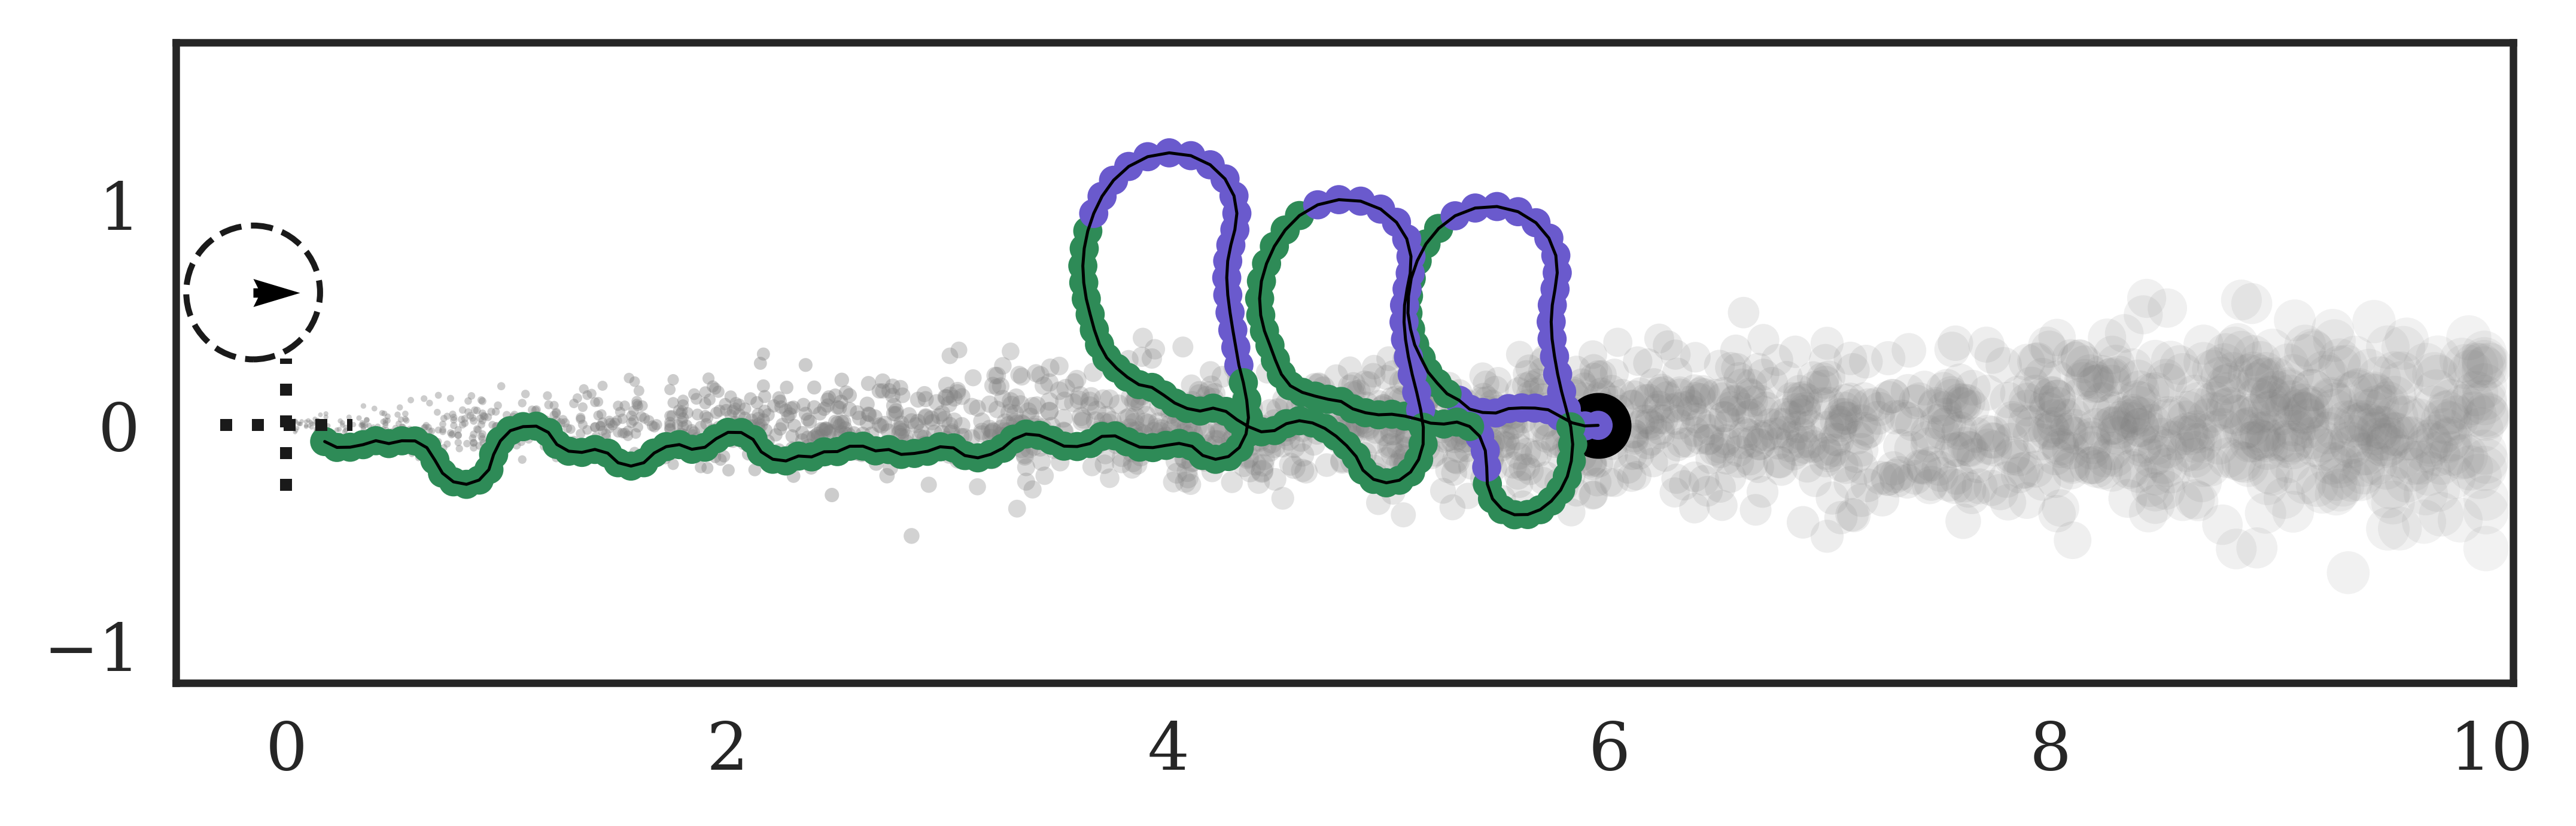

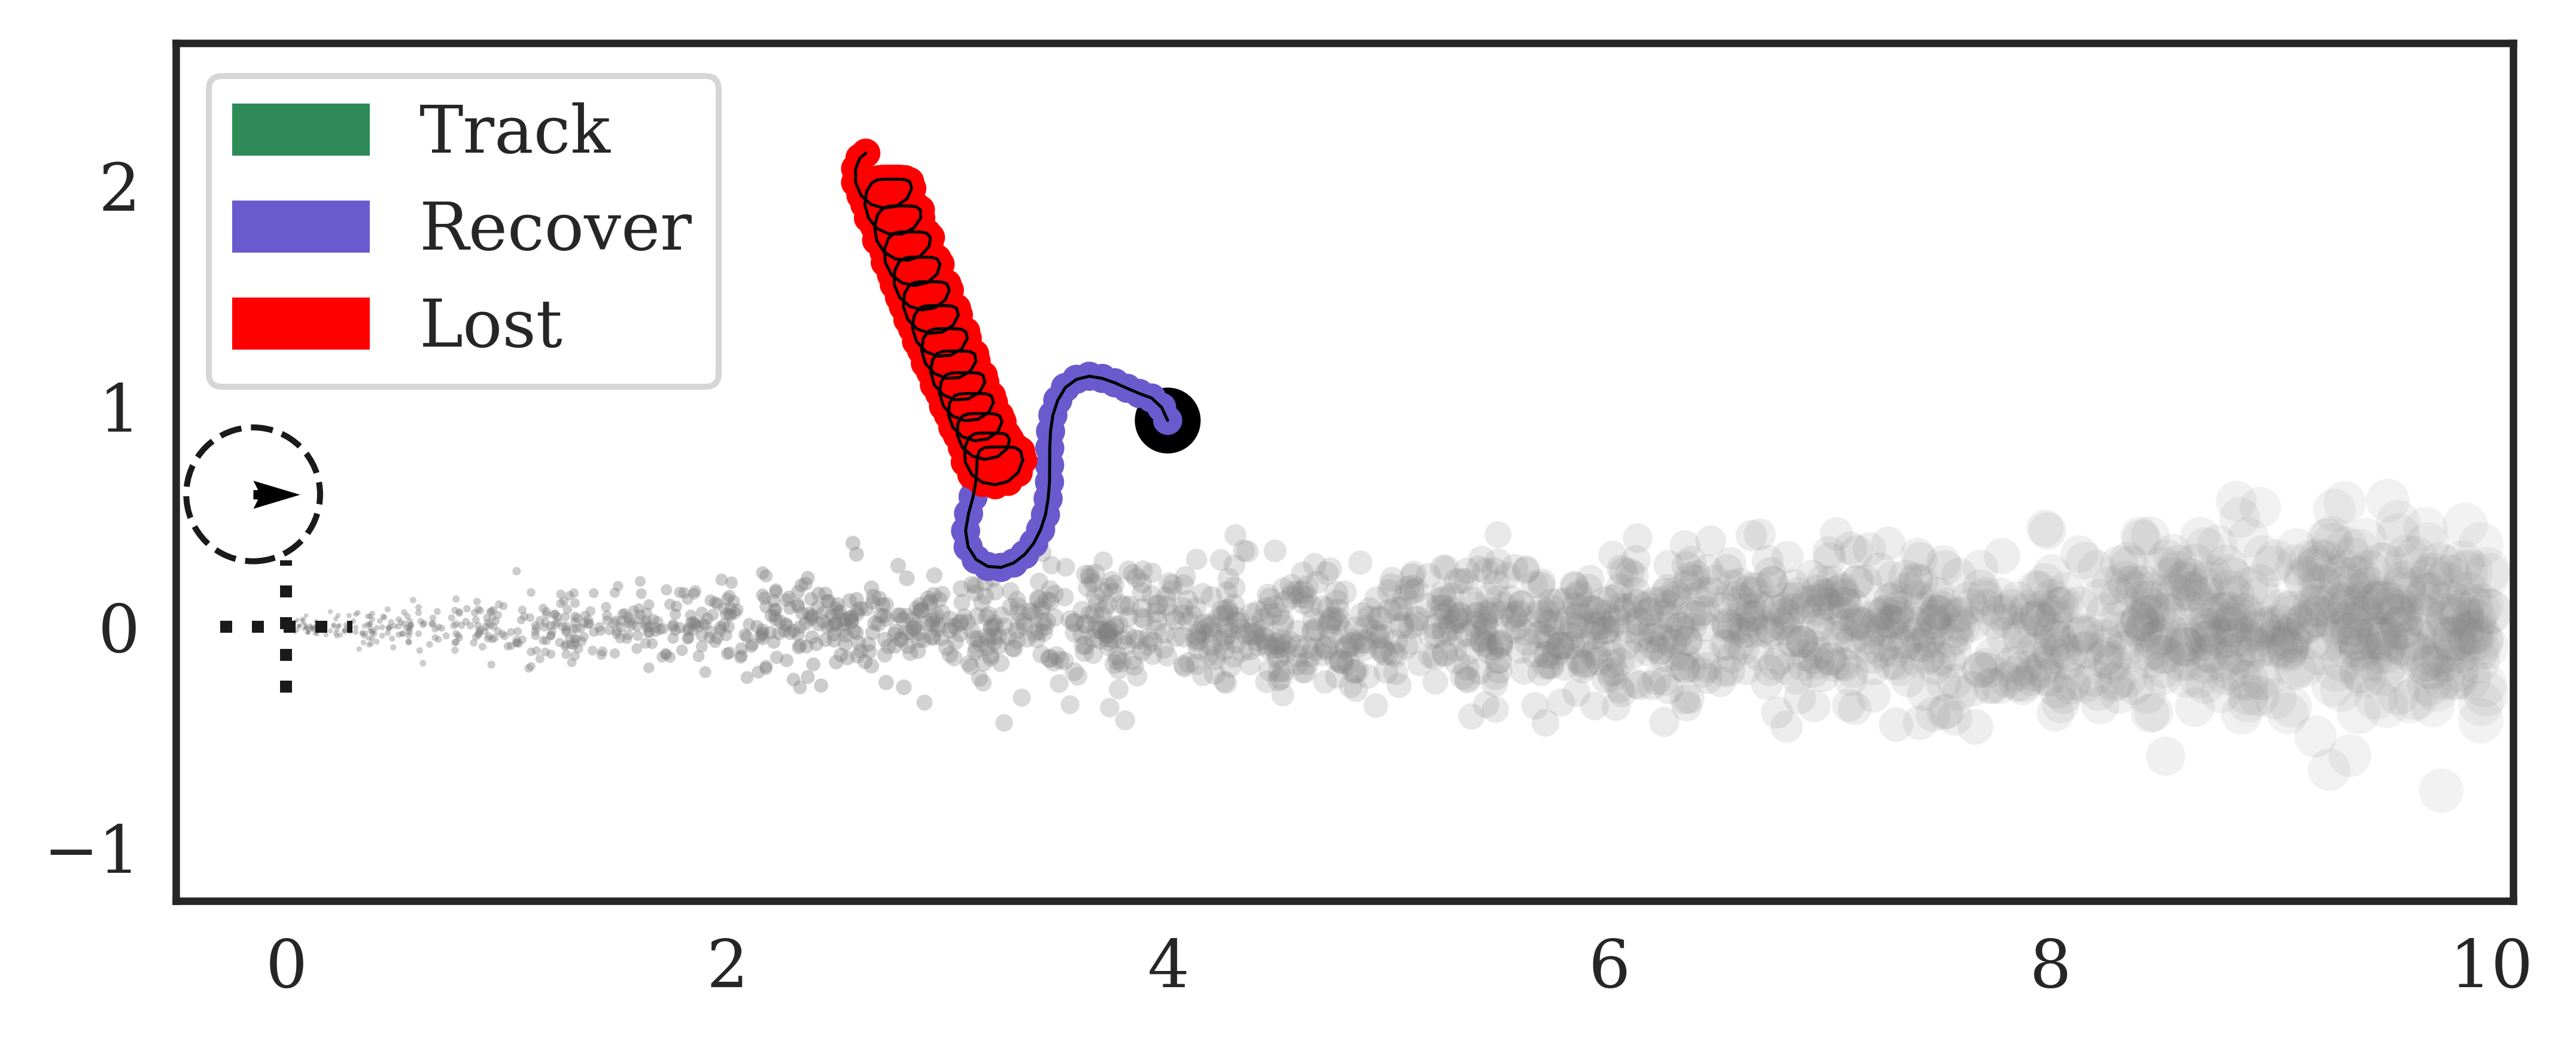

dataset model_seed  idx  birthx  zoom outcome
0  constantx5b5     3307e9  107     1.0     1    HOME
1  constantx5b5     3307e9   14     1.0     1     OOB

In [24]:
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 360

importlib.reload(agent_analysis)
importlib.reload(sim_analysis)
importlib.reload(log_analysis)
importlib.reload(config)

for idx, row in ep_selected2.iterrows():
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = row['idx']
    outcome = row['outcome']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

    subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list()
    zoom = row['zoom']
    zoom = -1
    
    viz_log = logs[0]
    traj_df = log_analysis.get_traj_df(viz_log, 
        extended_metadata=False, 
        squash_action=True,
        seed=model_seed)
    regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )


    agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(7,7), 
                                      birthx=birthx,
                                      colorby=regime_colorby,
                                      diffusionx=diffusion_multiplier,
                                     )
    
    if outcome == 'HOME': # Add manually
        plt.gca().get_legend().remove()
#         plt.ylabel("Arena width [m]")
#         plt.xlabel("Arena length [m]")

# from matplotlib.lines import Line2D
handles, labels = plt.gca().get_legend_handles_labels()
patch1 = mpatches.Patch(color=regime_colormap['TRACK'], label='Track')   
patch2 = mpatches.Patch(color=regime_colormap['RECOVER'], label='Recover')   
patch3 = mpatches.Patch(color=regime_colormap['SEARCH'], label='Lost')   
# line = Line2D([0], [0], label = 'manual line',color='b')
# line = Line2D([0], [0], label = 'manual line',color='b')
handles.extend([patch1, patch2, patch3])
# handles.extend([patch,line])
plt.legend(handles=handles, loc='upper left')
plt.show()

ep_selected2

## Figure 6 - Dynamics associated with each Regime

In [25]:
if handpicked == "1.0x":
    ep_fig6 = []
    ep_fig6.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':108, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_fig6.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':189, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
    ep_fig6 = pd.DataFrame(ep_fig6)
    
if handpicked == "0.5x":
    ep_fig6 = []
    ep_fig6.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':107, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_fig6.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':14, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
    ep_fig6 = pd.DataFrame(ep_fig6)

seed specific thresholds 12 35
constantx5b5
Applying diffusion_multiplier 0.5


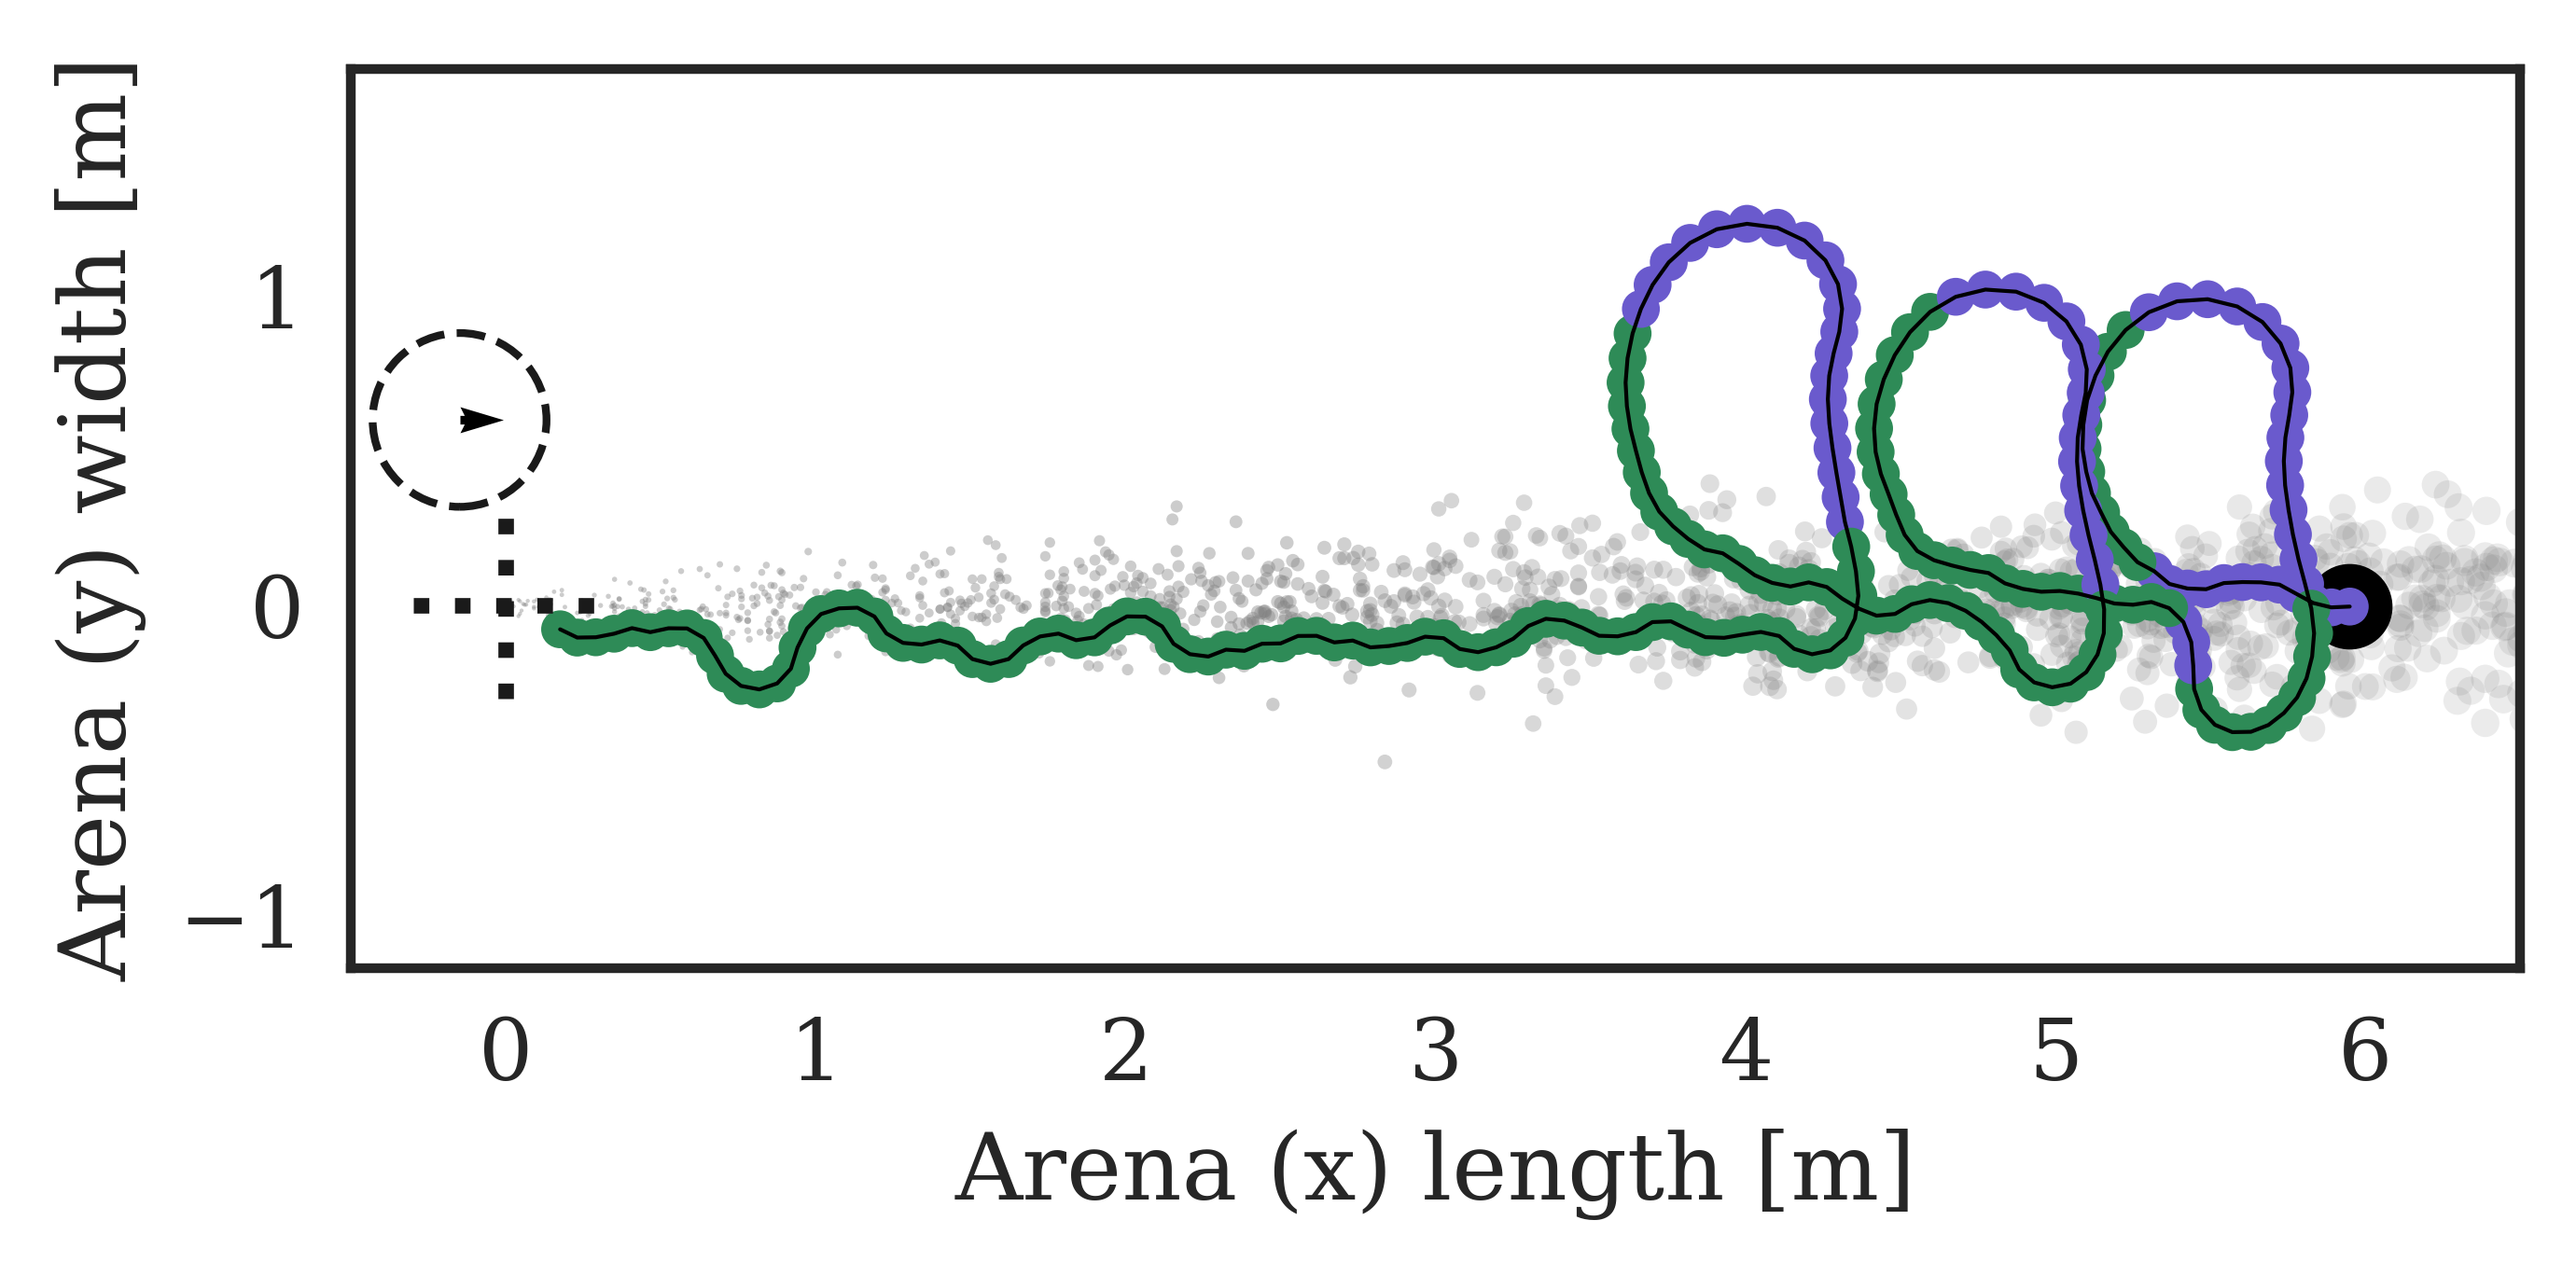

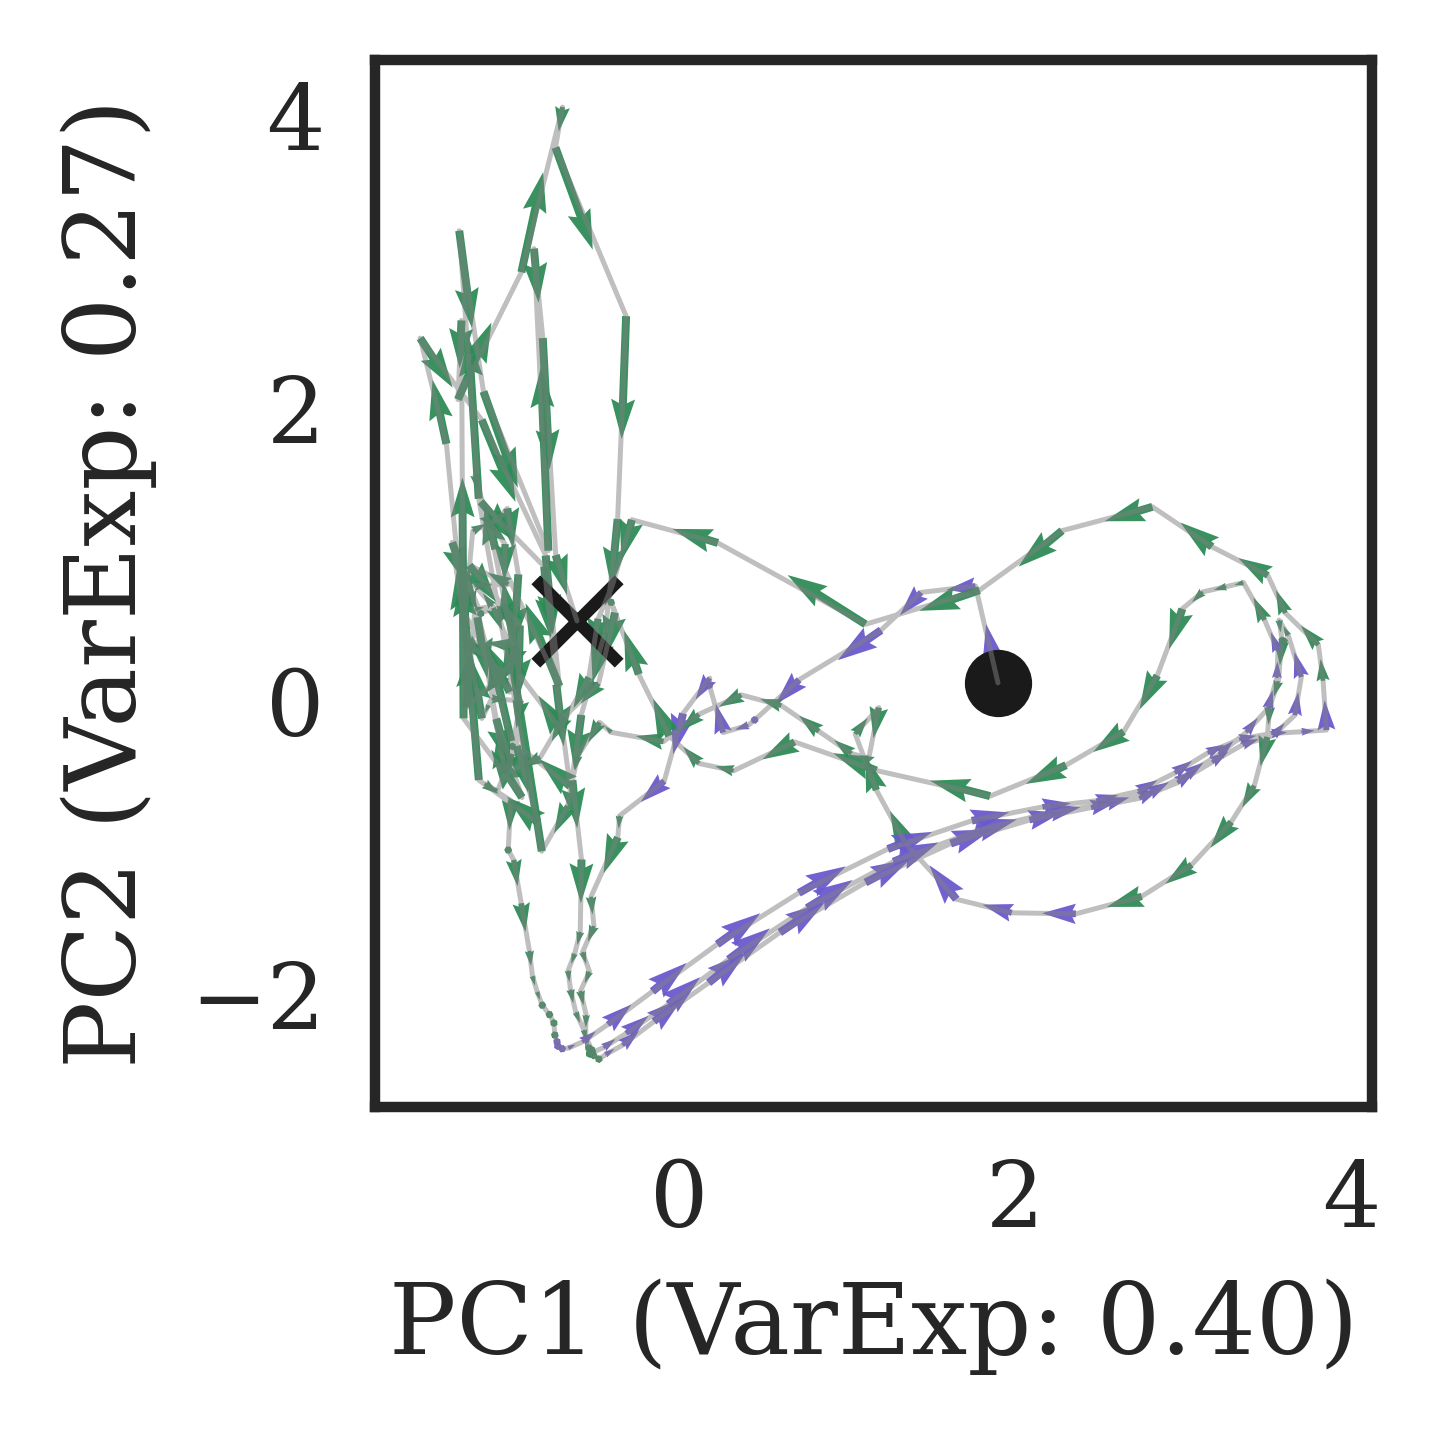

seed specific thresholds 12 35
constantx5b5
Applying diffusion_multiplier 0.5


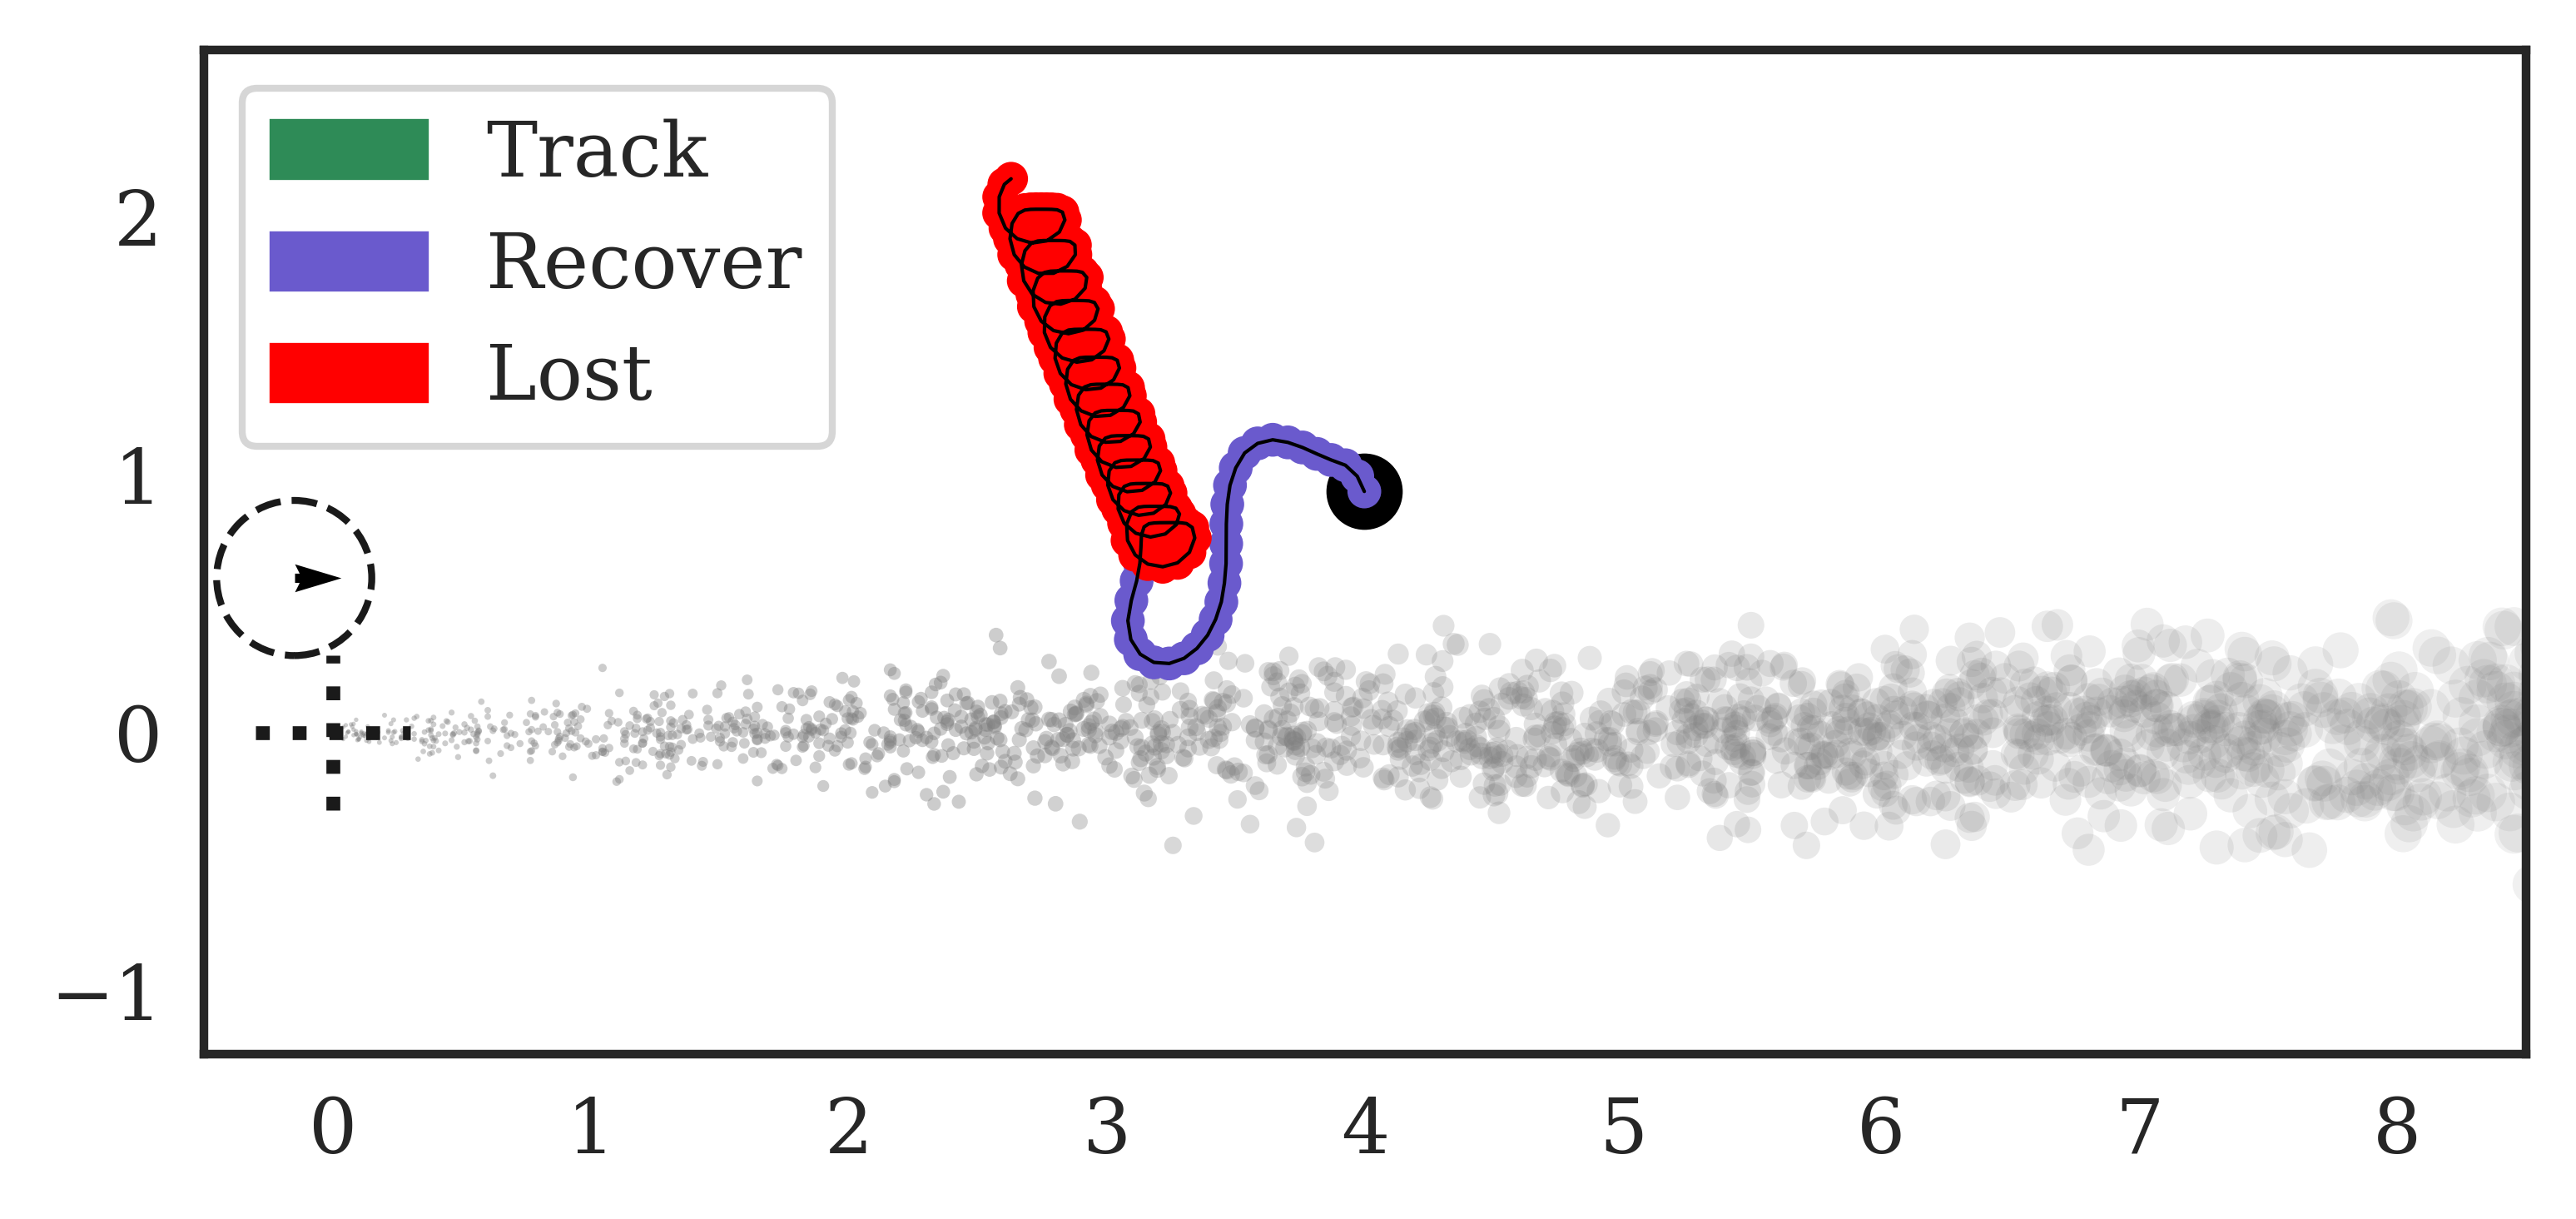

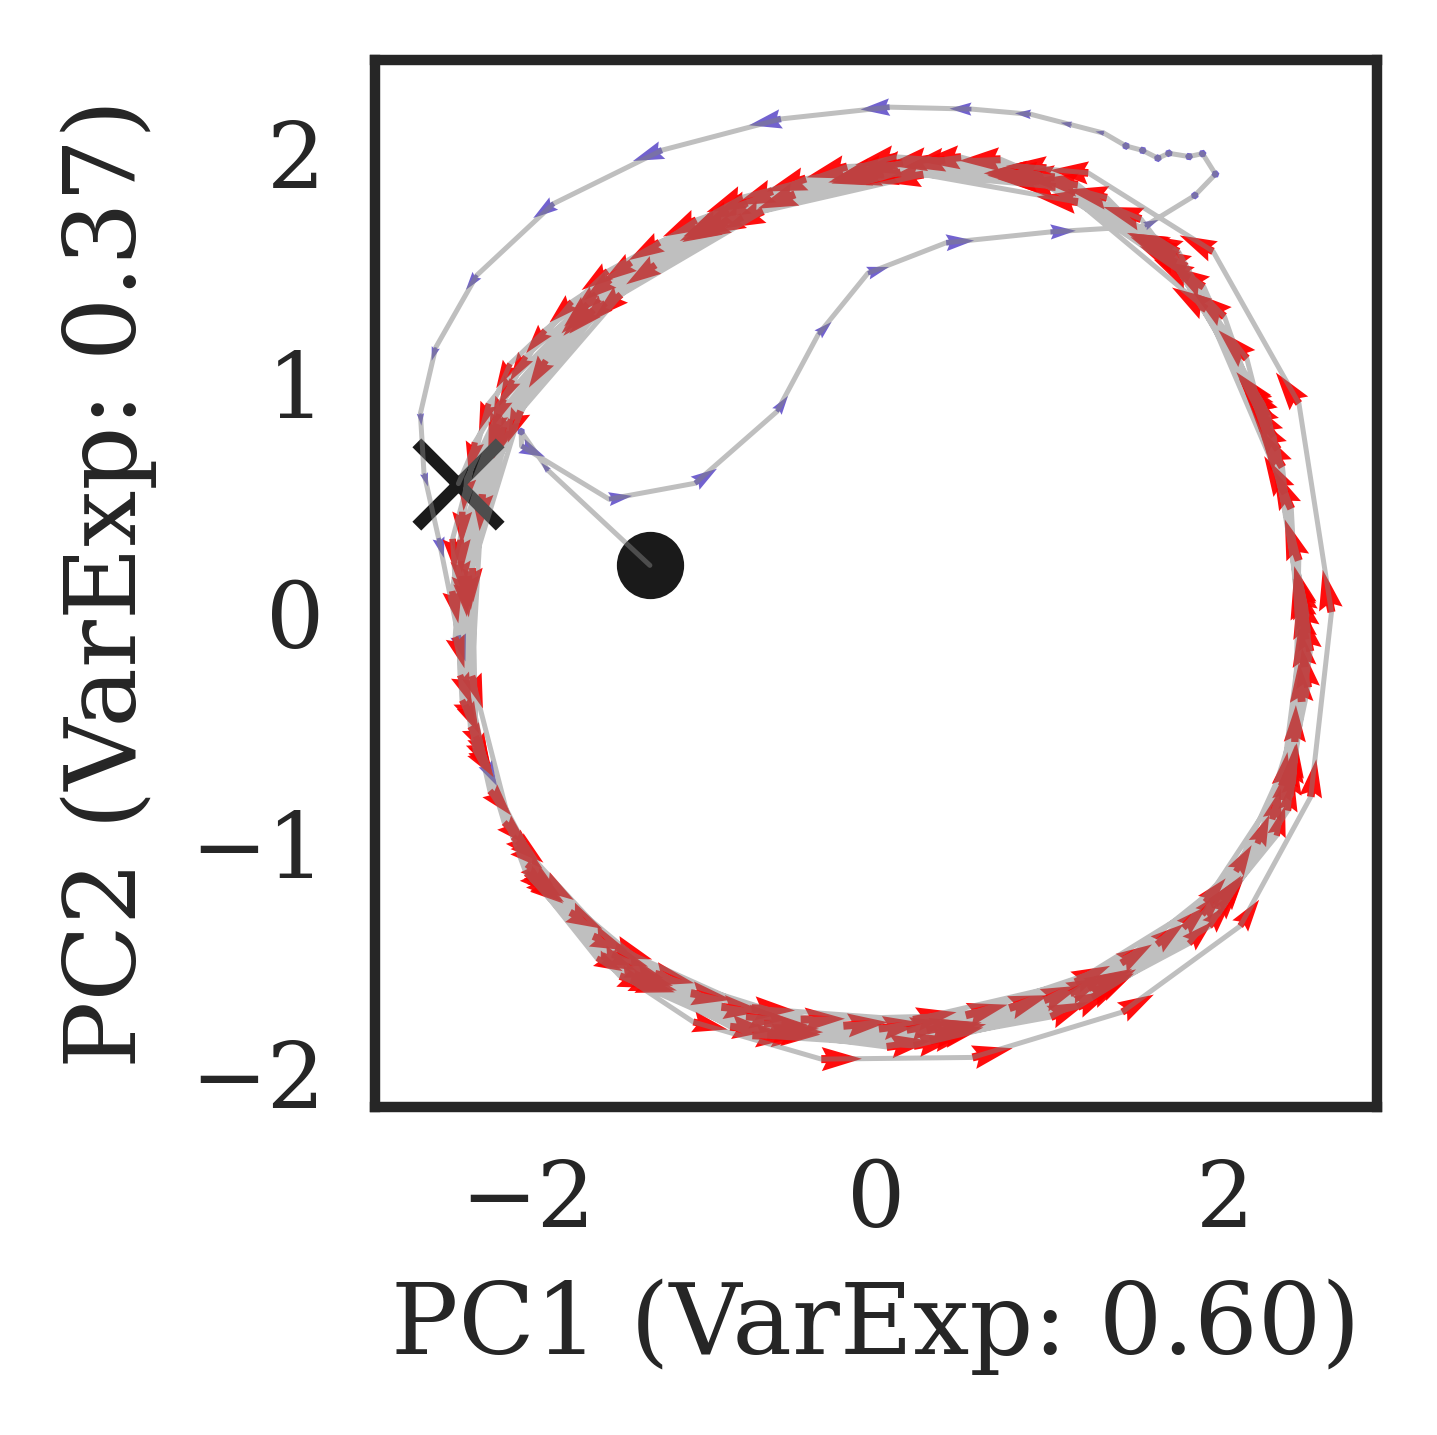

dataset model_seed  idx  birthx  zoom outcome
0  constantx5b5     3307e9  107     1.0     1    HOME
1  constantx5b5     3307e9   14     1.0     1     OOB

In [26]:
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 300

importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)
importlib.reload(config)

for idx, row in ep_fig6.iterrows():
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = row['birthx']
    idx = row['idx']
    outcome = row['outcome']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

    subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list()
    zoom = row['zoom']
    zoom = -1
    
    traj_df = log_analysis.get_traj_df(logs[0], 
            extended_metadata=True, 
            squash_action=True, 
            seed=model_seed,
          )
    regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )




    agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(5,5) if outcome == 'HOME' else (6,6), 
                                      birthx=birthx,
                                      colorby=regime_colorby,
#                                       colorby='regime',
                                      diffusionx=diffusion_multiplier,
                                     )
    
    if outcome == 'HOME':
        plt.gca().get_legend().remove()
        plt.xlim(-0.5, 6.5)
        plt.ylabel("Arena (y) width [m]")
        plt.xlabel("Arena (x) length [m]")
    else:
        plt.xlim(-0.5, 8.5)
        # from matplotlib.lines import Line2D
        handles, labels = plt.gca().get_legend_handles_labels()
        patch1 = mpatches.Patch(color=regime_colormap['TRACK'], label='Track')   
        patch2 = mpatches.Patch(color=regime_colormap['RECOVER'], label='Recover')   
        patch3 = mpatches.Patch(color=regime_colormap['SEARCH'], label='Lost')   

        # line = Line2D([0], [0], label = 'manual line',color='b')
        # line = Line2D([0], [0], label = 'manual line',color='b')
        handles.extend([patch1, patch2, patch3])
        # handles.extend([patch,line])
        plt.legend(handles=handles, loc='upper left')
        plt.show()
        
    # Neural activity
    colname = 'regime'

    ep_activity = np.array(pd.DataFrame(logs[0]['activity'])['rnn_hxs'].to_list())
    pca = skld.PCA(3, whiten=False)
    if outcome == 'HOME':
        pca.fit(ep_activity[ (traj_df['regime'] == 'TRACK').to_numpy(),: ]  )
    else:
        pca.fit(ep_activity[ (traj_df['regime'] == 'SEARCH').to_numpy(),: ]  )    
    X_pca = pca.transform(ep_activity)

    # Plot 2D
#     fig = plt.figure(figsize=(3,3))
#     ax = fig.gca()
#     ax.plot(X_pca[:, 0], X_pca[:, 1],  linewidth=0.6, c='grey', alpha=0.5)
#     colors = [config.regime_colormap[x] for x in traj_df[colname]]
#     sc = ax.scatter(X_pca[:, 0], X_pca[:, 1],
#             s=20, c=colors, cmap=plt.cm.get_cmap('RdBu'), vmin=0., vmax=1.)
#     ax.scatter(X_pca[0, 0], X_pca[0, 1], c='k', marker='o', s=100) # Start
#     ax.scatter(X_pca[-1, 0], X_pca[-1, 1], c='k', marker='x', s=200) # End
#     ax.set_xlabel(f'PC1 (VarExp: {pca.explained_variance_ratio_[0]:0.2f})')
#     ax.set_ylabel(f'PC2 (VarExp: {pca.explained_variance_ratio_[1]:0.2f})')
# #     ax.set_aspect('equal')    
#     plt.tight_layout()
#     plt.show()

    # Quiver 2D
    fig = plt.figure(figsize=(2.5,2.5))
    ax = fig.gca()
    U = X_pca[1:, 0] - X_pca[:-1, 0]
    V = X_pca[1:, 1] - X_pca[:-1, 1]
    colors = [config.regime_colormap[x] for x in traj_df[colname].iloc[:-1]]
    ax.plot(X_pca[:, 0], X_pca[:, 1],  linewidth=0.6, c='grey', alpha=0.5)
    ax.quiver(X_pca[:-1, 0], X_pca[:-1, 1], U, V,
              width=0.008,
              color=colors, alpha=0.95)
    ax.scatter(X_pca[0, 0], X_pca[0, 1], c='k', marker='o', s=50) # Start
    ax.scatter(X_pca[-1, 0], X_pca[-1, 1], c='k', marker='x', s=100) # End
    ax.set_xlabel(f'PC1 (VarExp: {pca.explained_variance_ratio_[0]:0.2f})')
    ax.set_ylabel(f'PC2 (VarExp: {pca.explained_variance_ratio_[1]:0.2f})')
    plt.tight_layout()
    plt.show()


    
    # Plot 3D
#     fig = plt.figure(figsize=(4,4))
#     ax = fig.gca(projection='3d')
#     ax.plot(X_pca[:, 0], X_pca[:, 1],  linewidth=0.6, c='grey', alpha=0.5)
#     colors = [config.regime_colormap[x] for x in traj_df[colname]]
#     ax.plot(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], linewidth=0.6, c='grey', alpha=0.5)
#     sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
#             s=20, c=colors, vmin=0, vmax=1)
#     ax.scatter(X_pca[0, 0], X_pca[0, 1], X_pca[0, 2], c='k', marker='o', s=100) # Start
#     ax.scatter(X_pca[-1, 0], X_pca[-1, 1], X_pca[-1, 2], c='k', marker='x', s=150) # End
#     ax.set_xlabel(f'PC1 (VarExp: {pca.explained_variance_ratio_[0]:0.2f})')
#     ax.set_ylabel(f'PC2 (VarExp: {pca.explained_variance_ratio_[1]:0.2f})')
#     ax.set_zlabel(f'PC3 (VarExp: {pca.explained_variance_ratio_[2]:0.2f})')
#     print(f'ax.elev: {ax.elev}, ax.azim {ax.azim}') # Get original rotation
#     if outcome == 'HOME':
#         ax.view_init(30, 30)
#         ax.set_xlim(-1, 3.5)
#     plt.tight_layout()
#     plt.show()


ep_fig6

seed specific thresholds 12 35
constantx5b5
Applying diffusion_multiplier 0.5
Saving: /home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained///report_common_subspace//regime_traj_3307e9_HOME_107.png


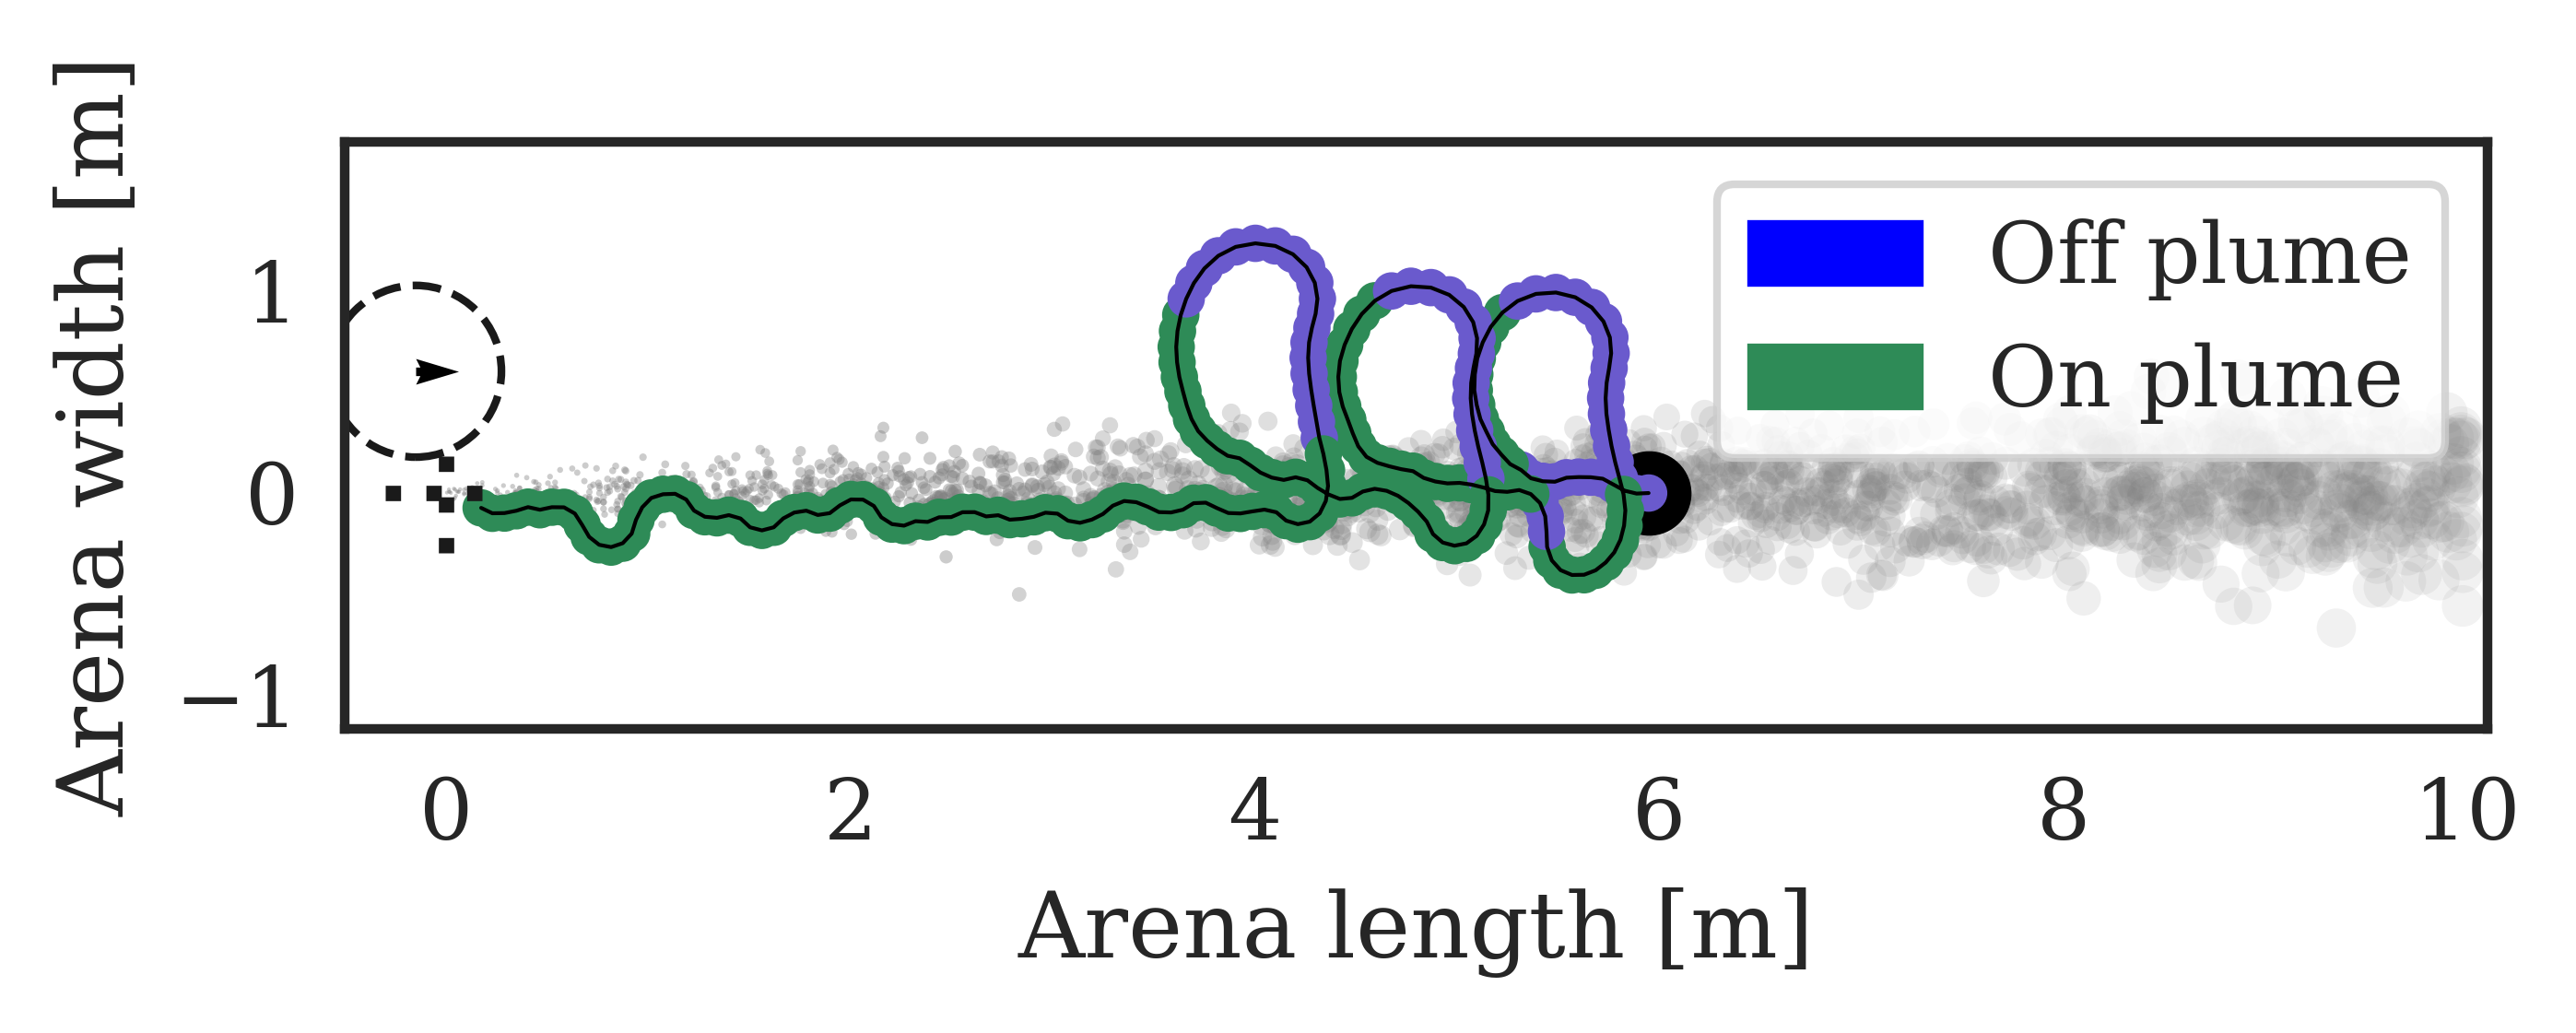

Saving: /home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained///report_common_subspace//regime_neural_3307e9_HOME_107.png


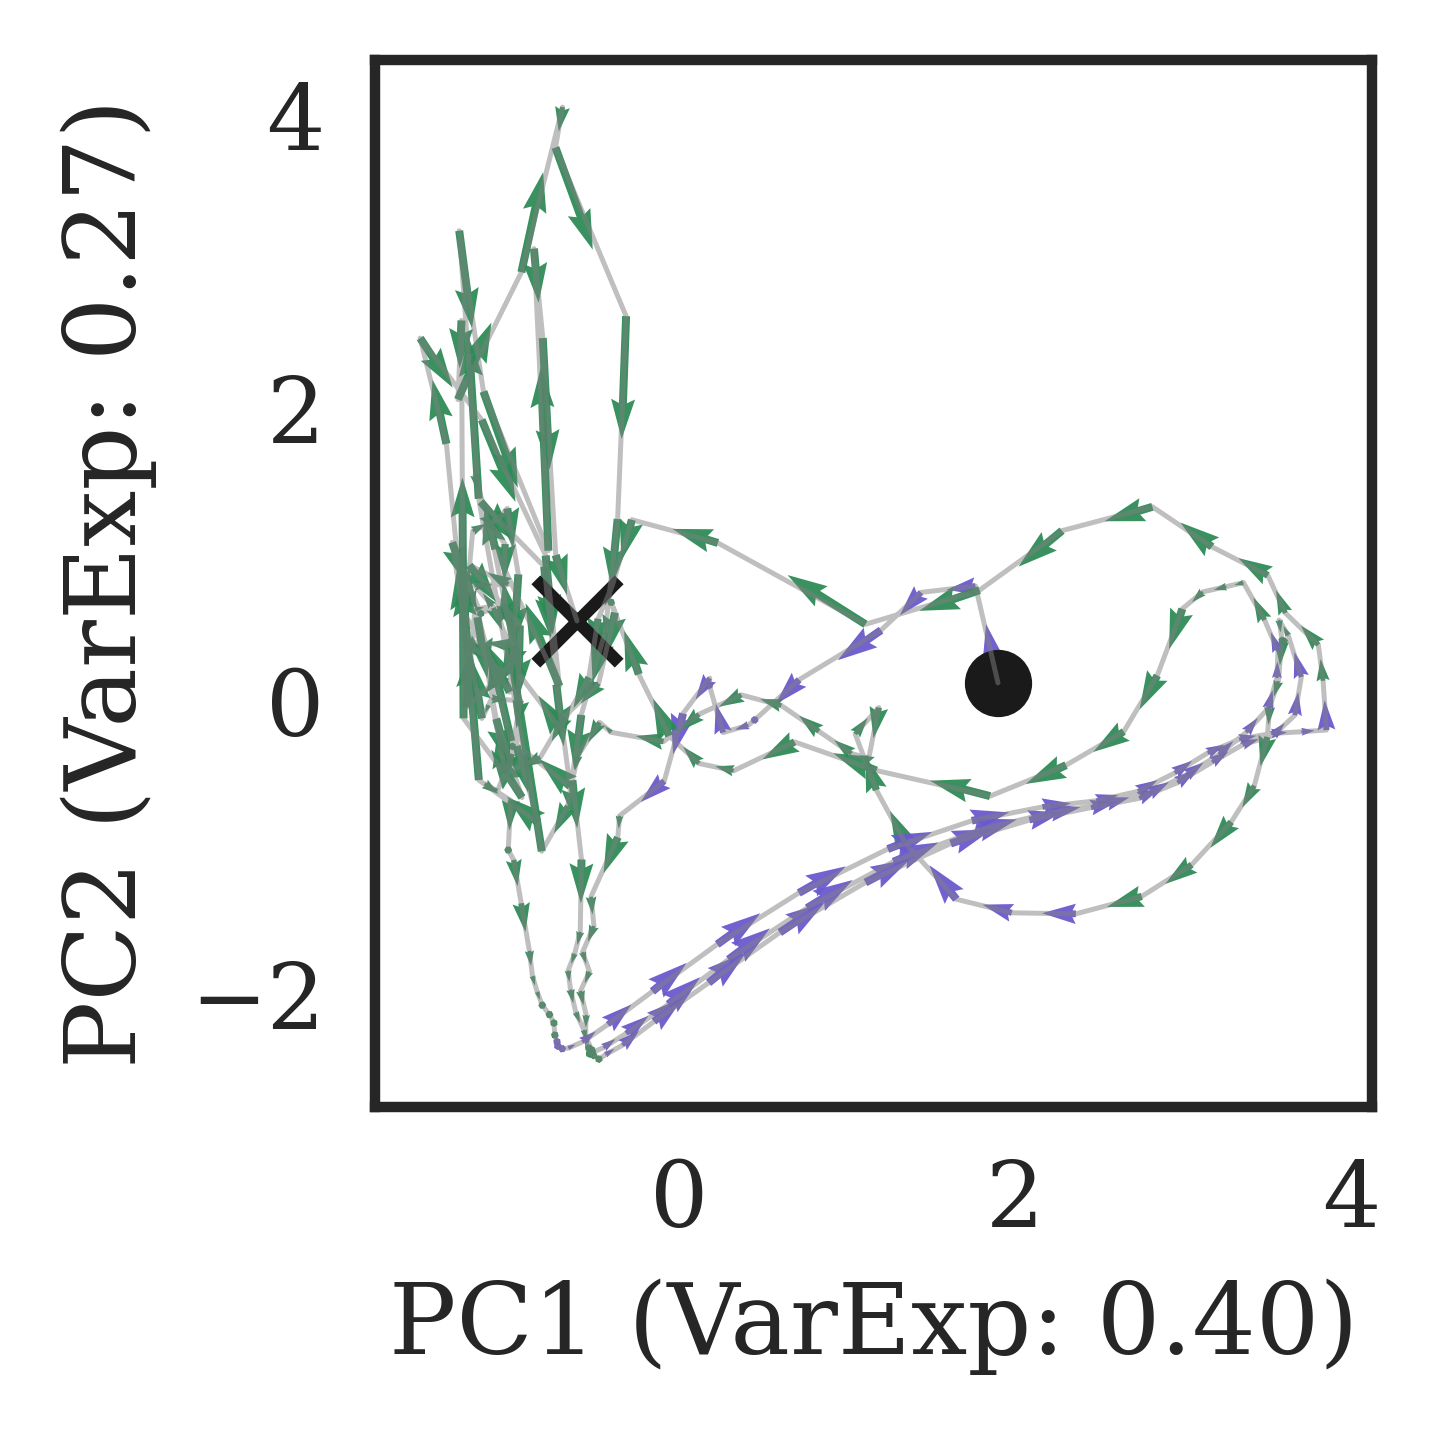

seed specific thresholds 12 35
constantx5b5
Applying diffusion_multiplier 0.5
Saving: /home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained///report_common_subspace//regime_traj_3307e9_OOB_14.png


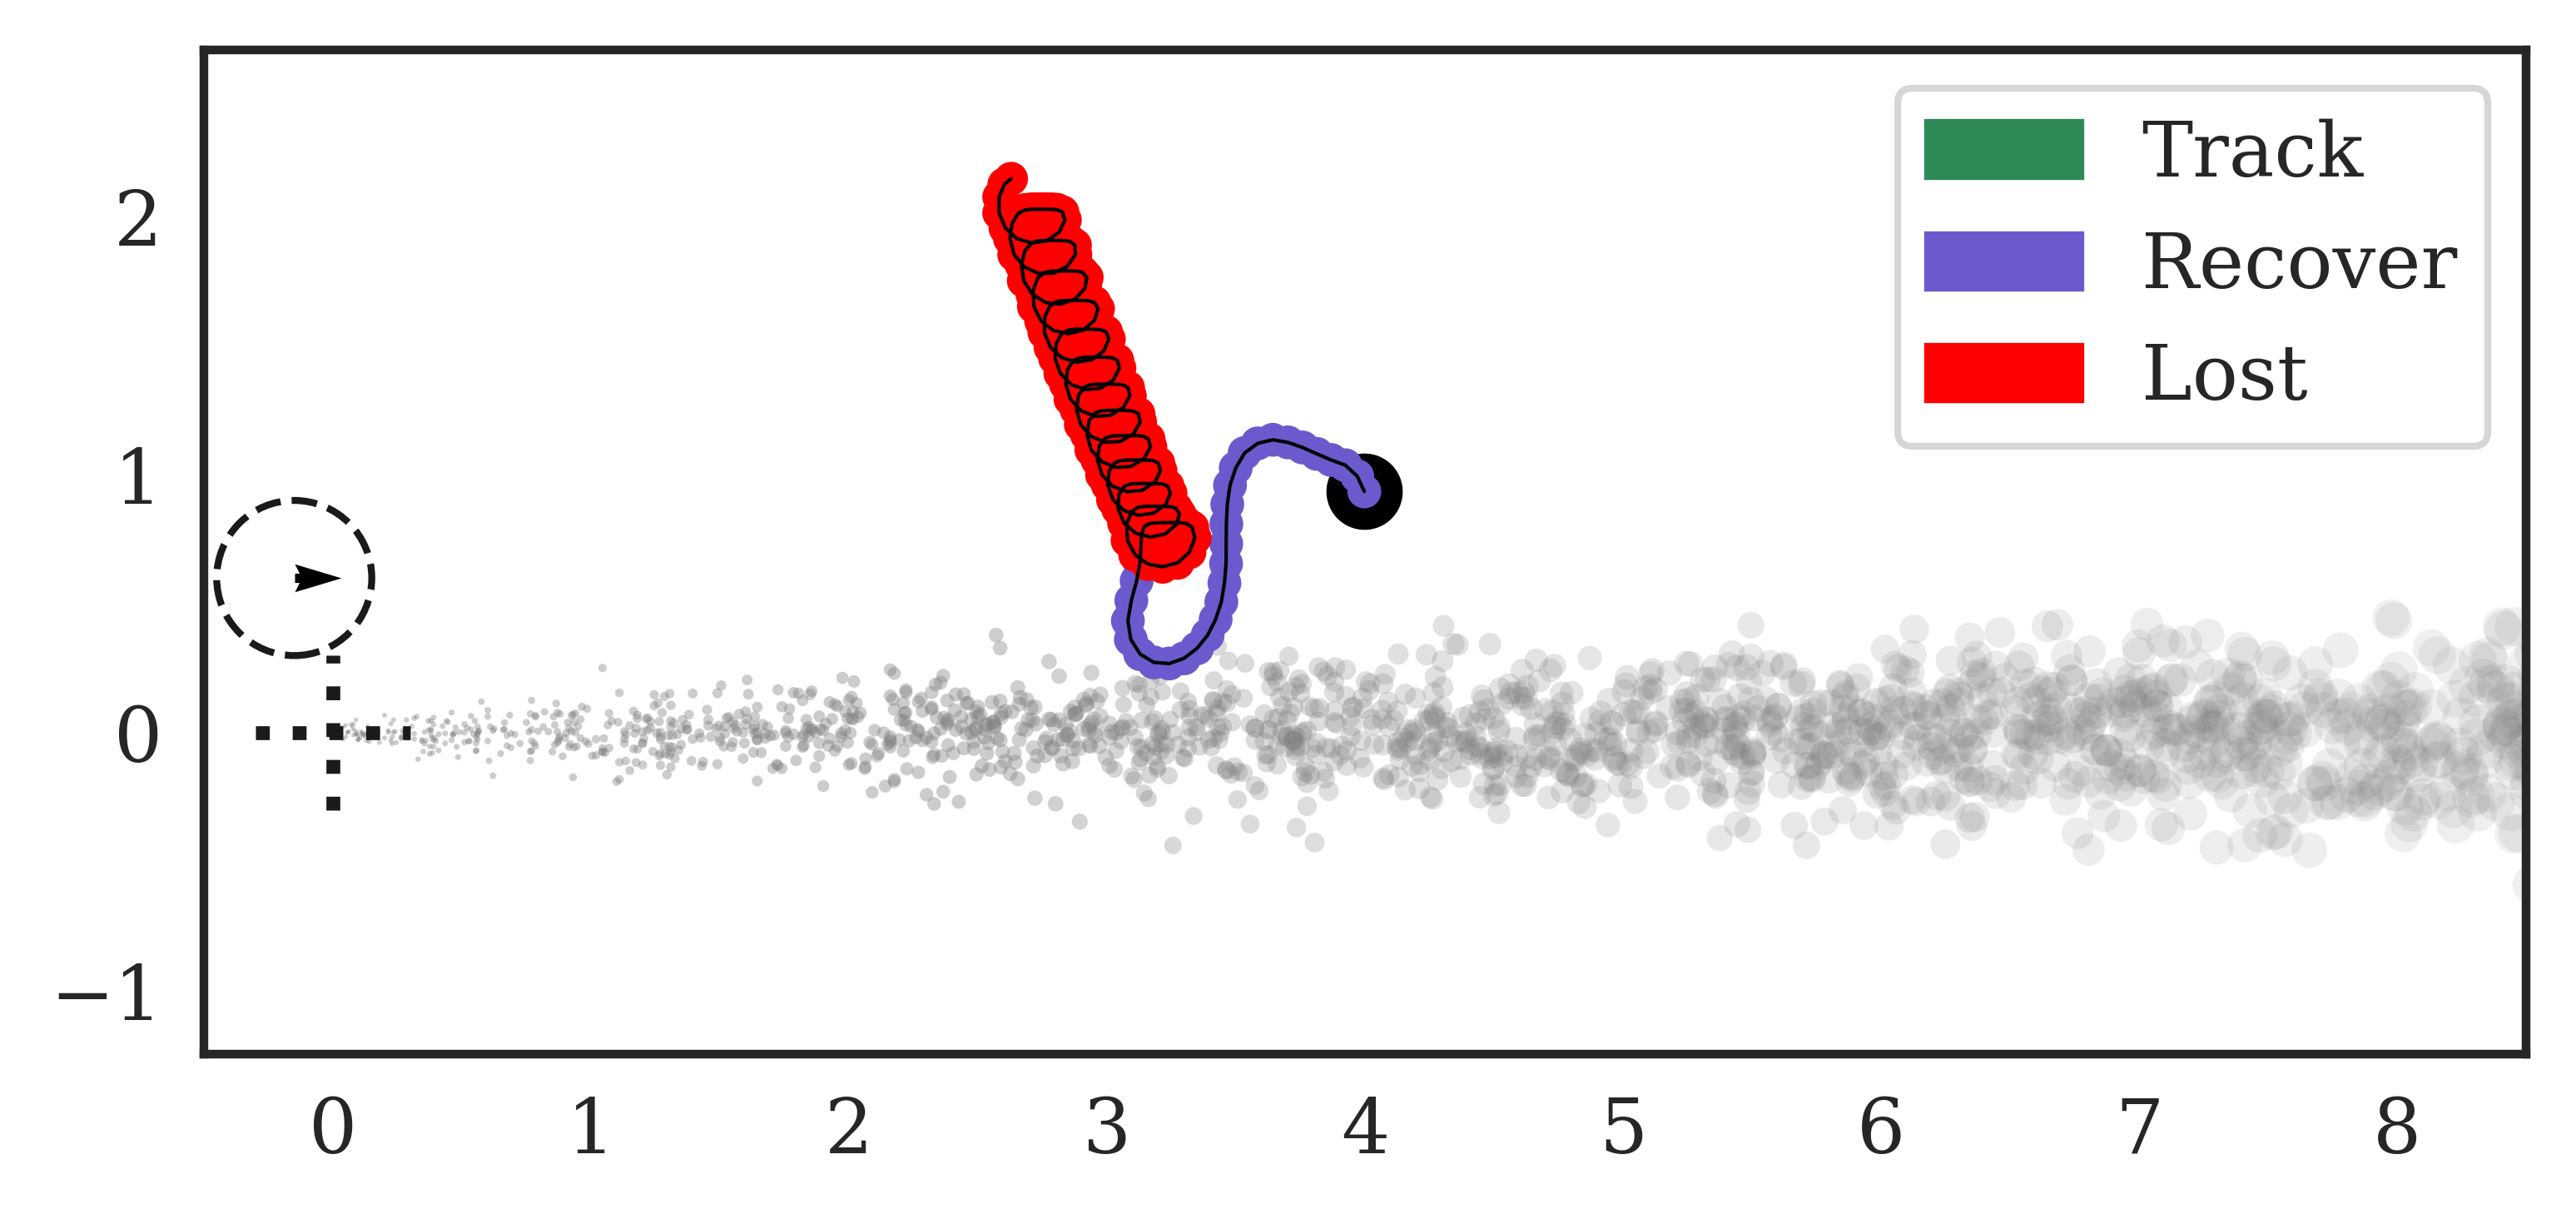

Saving: /home/satsingh/plume/plumezoo/latest/fly/diff50sim_and_tabulated_pretrained///report_common_subspace//regime_neural_3307e9_OOB_14.png


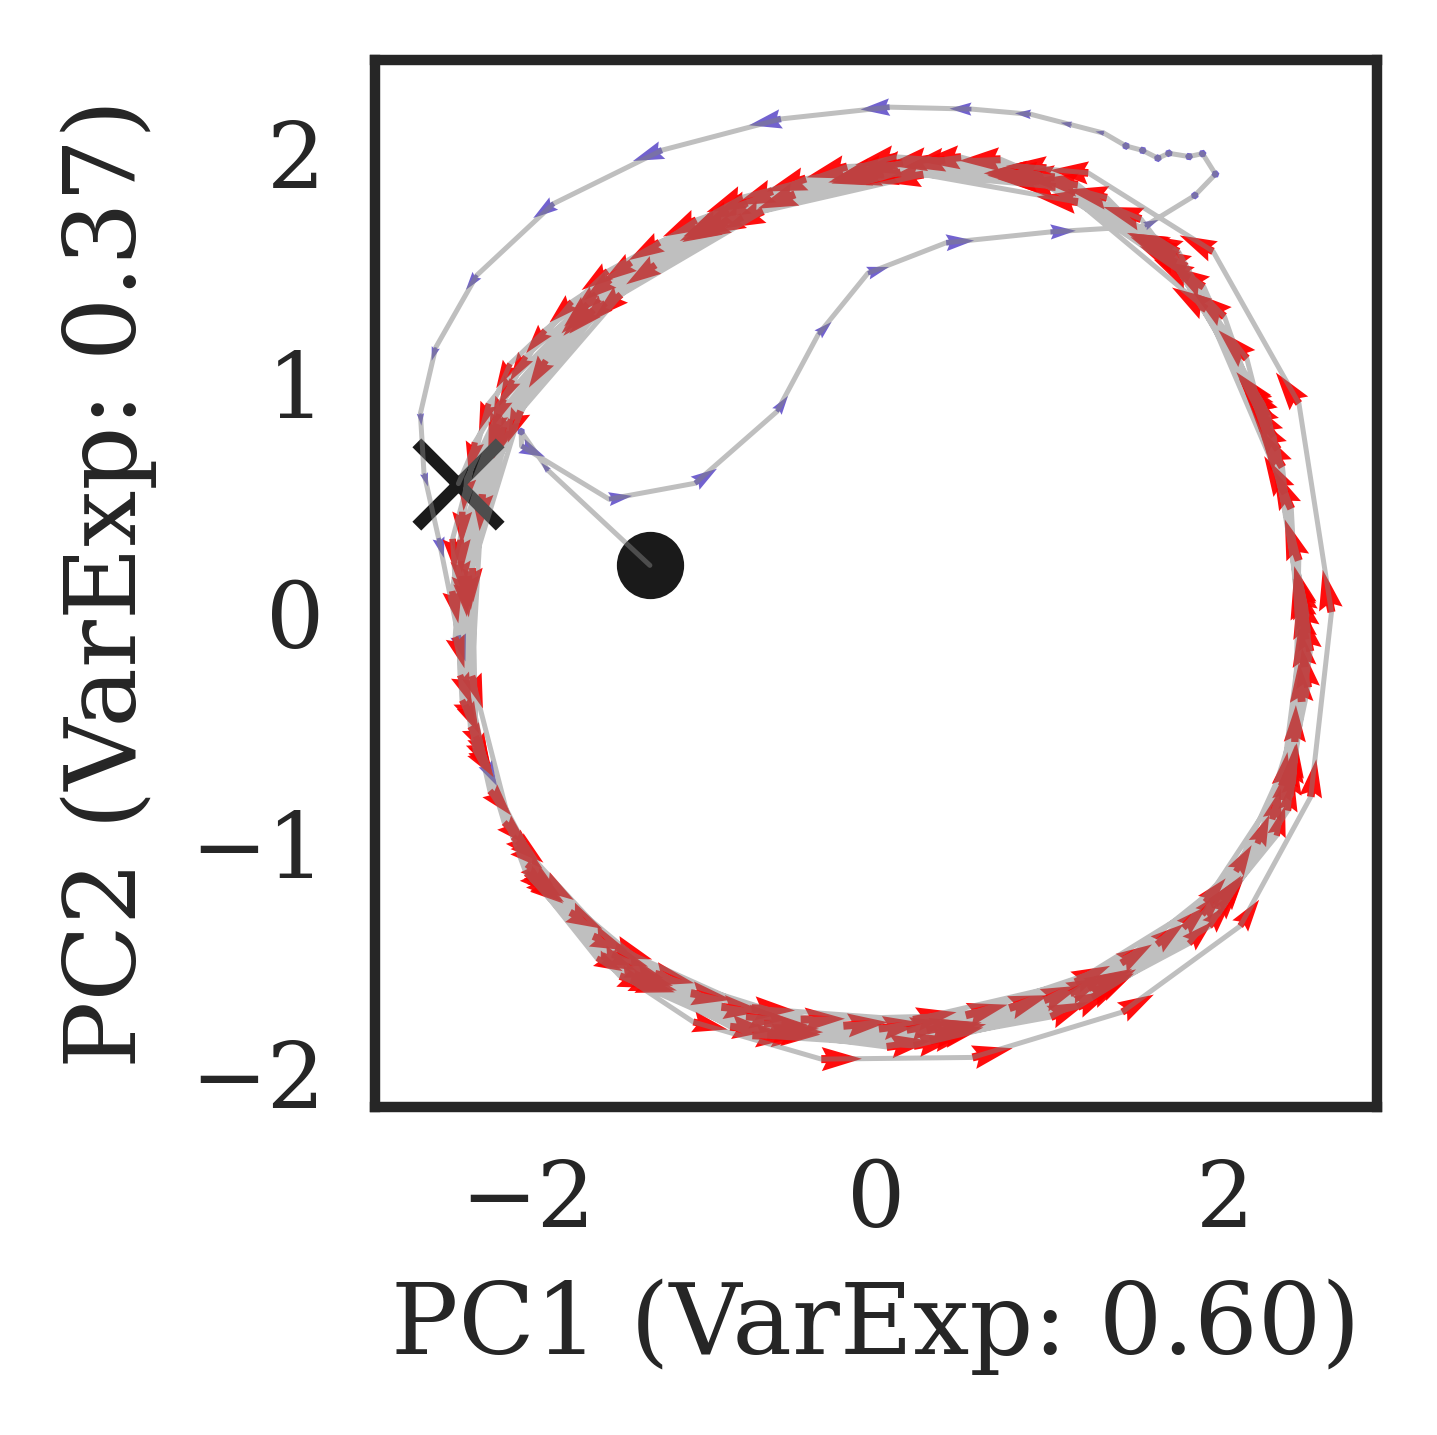

In [27]:
# Fig 6 appendices
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 300

importlib.reload(agent_analysis)
import sim_analysis
importlib.reload(sim_analysis)
importlib.reload(config)

# Random sample
ep_fig6_appendix = selected_df_all.query("dataset == 'constantx5b5'").groupby(by=["model_seed", "outcome",]).sample(1)

# Used in manuscript
if handpicked == "0.5x":
    ep_fig6_appendix = []
    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':107, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':14, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

if handpicked == "1.0x":
    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':108, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
                        'idx':189, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'9781ba', 
                        'idx':196, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'9781ba', 
                        'idx':130, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'541058', 
                        'idx':165, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'541058', 
                        'idx':103, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'2760377', 
                        'idx':148, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'2760377', 
                        'idx':136, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})

    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3199993', 
                        'idx':161, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
    ep_fig6_appendix.append({'dataset':'constantx5b5', 'model_seed':'3199993', 
                        'idx':144, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})





ep_fig6_appendix = pd.DataFrame(ep_fig6_appendix)




for idx, row in ep_fig6_appendix.iterrows():
    model_seed = row['model_seed']
    dataset = row['dataset']
    birthx = 1.0
    idx = row['idx']
    outcome = row['outcome']
    task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

    subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
#     print(subset)
    logs = subset['log'].to_list()
#     zoom = row['zoom']
    zoom = -1
    
    traj_df = log_analysis.get_traj_df(logs[0], 
            extended_metadata=True, 
            squash_action=True, 
            seed=model_seed,
          )
    regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )




    agent_analysis.visualize_episodes(logs, 
                                      zoom=zoom, 
                                      dataset=dataset,
                                      animate=False,
                                      plotsize=(5,5) if outcome == 'HOME' else (6,6), 
                                      birthx=birthx,
                                      colorby=regime_colorby,
#                                       colorby='regime',
                                      diffusionx=diffusion_multiplier,
                                     )
    
    if outcome == 'HOME':
#         plt.xlim(-0.5, 6.5)
        plt.ylabel("Arena width [m]")
        plt.xlabel("Arena length [m]")
    else:
        plt.xlim(-0.5, 8.5)
        # from matplotlib.lines import Line2D
        handles, labels = plt.gca().get_legend_handles_labels()
        patch1 = mpatches.Patch(color=regime_colormap['TRACK'], label='Track')   
        patch2 = mpatches.Patch(color=regime_colormap['RECOVER'], label='Recover')   
        patch3 = mpatches.Patch(color=regime_colormap['SEARCH'], label='Lost')   

        # line = Line2D([0], [0], label = 'manual line',color='b')
        # line = Line2D([0], [0], label = 'manual line',color='b')
        handles.extend([patch1, patch2, patch3])
        # handles.extend([patch,line])
        plt.legend(handles=handles, loc='best')
    
    fname = f"{outdir}/regime_traj_{model_seed}_{outcome}_{idx}.png"
    print("Saving:", fname)
    plt.savefig(fname, dpi=dpi_save, bbox_inches='tight', transparent=True)
    plt.show()
        
    # Neural activity
    colname = 'regime'

    ep_activity = np.array(pd.DataFrame(logs[0]['activity'])['rnn_hxs'].to_list())
    pca = skld.PCA(3, whiten=False)
    if outcome == 'HOME':
        pca.fit(ep_activity[ (traj_df['regime'] == 'TRACK').to_numpy(),: ]  )
    else:
        pca.fit(ep_activity[ (traj_df['regime'] == 'SEARCH').to_numpy(),: ]  )    
    X_pca = pca.transform(ep_activity)

    # Quiver 2D
    fig = plt.figure(figsize=(2.5,2.5))
    ax = fig.gca()
    U = X_pca[1:, 0] - X_pca[:-1, 0]
    V = X_pca[1:, 1] - X_pca[:-1, 1]
    colors = [config.regime_colormap[x] for x in traj_df[colname].iloc[:-1]]
    ax.plot(X_pca[:, 0], X_pca[:, 1],  linewidth=0.6, c='grey', alpha=0.5)
    ax.quiver(X_pca[:-1, 0], X_pca[:-1, 1], U, V,
              width=0.008,
              color=colors, alpha=0.95)
    ax.scatter(X_pca[0, 0], X_pca[0, 1], c='k', marker='o', s=50) # Start
    ax.scatter(X_pca[-1, 0], X_pca[-1, 1], c='k', marker='x', s=100) # End
    ax.set_xlabel(f'PC1 (VarExp: {pca.explained_variance_ratio_[0]:0.2f})')
    ax.set_ylabel(f'PC2 (VarExp: {pca.explained_variance_ratio_[1]:0.2f})')
    plt.tight_layout()
    fname = f"{outdir}/regime_neural_{model_seed}_{outcome}_{idx}.png"
    print("Saving:", fname)
    plt.savefig(fname, dpi=dpi_save, bbox_inches='tight', transparent=True)
    plt.show()


In [28]:
# (traj_df['regime'] == 'TRACK').to_numpy().flatten()
# np.array(ep_activity).shape, traj_df.shape

## Figure 7 TTCS

In [29]:
# model_seed = '3307e9'
# model_dir = '/home/satsingh/plume/plumezoo/latest/fly/memory/plume_20210601_VRNN_constantx5b5noisy3x5b5_stepoob_bx0.30.8_t10000004000000_q2.00.5_dmx0.80.8_dmn0.70.4_h64_wd0.0001_n4_codeVRNN_seed3307e9/'
# comsubdir = f'{model_dir}/report_common_subspace/'
# # ttcs_df = pd.read_csv(f"{comsubdir}/ttcs_swarm_{model_seed}.csv")
# ttcs_df = pd.read_pickle(f"{comsubdir}/ttcs_swarm_{model_seed}.pkl")
# ttcs_df.head()

In [30]:
# # Test
# # %config InlineBackend.figure_format = 'png'
# # mpl.rcParams['figure.dpi'] = 100

# %config InlineBackend.figure_format = 'retina'
# mpl.rcParams['figure.dpi'] = 300


# importlib.reload(log_analysis)


# ep_fig7 = [] # selected in above cell
# # ep_fig7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
# #                     'idx':108, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
# ep_fig7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
#                     'idx':82, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})

# ep_fig7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
#                     'idx':130, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
# ep_fig7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
#                     'idx':44, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
# ep_fig7 = pd.DataFrame(ep_fig7)

# importlib.reload(agent_analysis)
# import sim_analysis
# importlib.reload(sim_analysis)
# importlib.reload(config)
# ttcs_colormap = config.ttcs_colormap


# for i, row in ep_fig7.iterrows():
#     model_seed = row['model_seed']
#     dataset = row['dataset']
#     birthx = row['birthx']
#     idx = row['idx']
#     outcome = row['outcome']
#     task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

#     subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
# #     print(subset)
#     logs = subset['log'].to_list()
#     zoom = row['zoom']
#     zoom = -1

#     # Load TTCS data
#     subset_ttcs = ttcs_df.query("outcome == @outcome and dataset == @task and idx == @idx")
#     home_distances = subset_ttcs['home_distances'].to_list()[0]
#     oob_distances = subset_ttcs['oob_distances'].to_list()[0]
#     entry_idx = subset_ttcs['entry_idx'].item()
#     exit_idx = subset_ttcs['exit_idx'].item()
#     home_idx = subset_ttcs['home_idx'].item()
#     oob_idx = subset_ttcs['oob_idx'].item()
#     range_oob = subset_ttcs['range_oob'].item()
#     range_home = subset_ttcs['range_home'].item()


#     # Plot traj
#     closer_to_home = [ home_distances[i] < oob_distances[i] for i in range(len(oob_distances)) ] 
#     colors = [ ttcs_colormap['HOME'] if x else ttcs_colormap['OOB'] for x in closer_to_home ]
#     agent_analysis.visualize_episodes(logs, 
#                                       zoom=zoom, 
#                                       dataset=dataset,
#                                       animate=False,
#                                       plotsize=(7,7), 
#                                       birthx=birthx,
# #                                       colorby=colors,
#                                      )
#     if i == 0:
#         handles, labels = plt.gca().get_legend_handles_labels()
#         patch1 = mpatches.Patch(color=config.traj_colormap['off'], label='Off plume')   
#         patch2 = mpatches.Patch(color=config.traj_colormap['on'], label='On plume')   
#         # line = Line2D([0], [0], label = 'manual line',color='b')
#         handles.extend([patch1, patch2])
#         # handles.extend([patch,line])
#         plt.legend(handles=handles)
#         plt.xlabel('')
#         plt.show()
#     elif i == 1:
#         plt.xlabel('')
#         plt.show()
#     elif i == 2:
#         plt.ylabel("Arena width [m]")
#         plt.xlabel("Arena length [m]")
#         plt.ylim(-1,2.25)
# #         plt.xlim(-0.5,9.5)
#         fig = matplotlib.pyplot.gcf()
#         fig.set_size_inches(6, 6)
#         plt.show()
#     else:
#         plt.show()
    
#     # Plot TTCS
#     print(entry_idx, exit_idx, home_idx, oob_idx)    
#     pd.Series(home_distances).plot(figsize=(5.5, 1.5), label=r'd$_{HOME}$') # Blue
#     pd.Series(oob_distances).plot(label=r'd$_{OOB}$') # Orange

#     if outcome == 'HOME':
#         plt.axhline(y=range_home, c='grey', ls='--')
#         plt.axvline(x=entry_idx, c='black', ls=':', label=r'$t_{PLUME}$')
#         plt.axvline(x=home_idx, c='b', ls='--', label=r'$t_{HOME}$')
#     if outcome == 'OOB':
#         plt.axhline(y=range_oob, c='grey', ls='--')
#         plt.axvline(x=exit_idx, c='black', ls='-.', label=r'$t_{PLUME}$')
#         plt.axvline(x=oob_idx, c='orange', ls='--', label=r'$t_{OOB}$')

#     if i == 0:
#         plt.legend(loc='upper left', ncol=2, labelspacing=0.05, columnspacing=0.4, framealpha=0.95)
#         plt.xlabel('')
#     if i == 1:
#         plt.xlabel('')
#     if i == 2:
#         plt.legend(loc='upper right', ncol=2, labelspacing=0.05, columnspacing=0.4, framealpha=0.95)
#         plt.ylabel("Distance [AU]")
#         plt.xlabel("Time [frames]")
#     plt.xlim(0,250)
#     plt.show()
    


## Figure for centerline tracking

In [31]:
# # # Find a few good examples
# importlib.reload(agent_analysis)
# import sim_analysis
# importlib.reload(sim_analysis)
# dataset = 'switch45x5b5'
# # dataset = 'noisy3x5b5'
# # dataset = 'constantx5b5'
# birthx = 1.0

# centerline_filename = f'{config.datadir}/centerline_data_{dataset}.pickle' 
# centerline_df = pd.read_pickle(centerline_filename)

# task = dataset if birthx==1.0 else f"{dataset}_{birthx}"
# subset =  selected_df_all.query("outcome == 'HOME' and dataset == @task and model_seed == @model_seed").tail(5)
# logs = subset['log'].to_list()
# idxs = subset['idx'].to_list()
# print(idxs)
# for log in logs:
#     traj_df = log_analysis.get_traj_df(log, 
#         extended_metadata=False, 
#         squash_action=True,
#         seed=model_seed)
#     regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )
    
#     agent_analysis.visualize_episodes([log], 
#                                       zoom=-1, 
#                                       dataset=dataset,
#                                       episode_idxs=idxs,
#                                       animate=False,
#                                       plotsize=(8,8), 
#                                       birthx=birthx,
#                                       colorby=regime_colorby,
#                                      )
    
#     tidx = (100*traj_df['t_val']).to_numpy(dtype=int)[-1]
#     print(tidx)
#     centerline_t = centerline_df[ centerline_df.tidx == tidx ]
#     plt.plot(centerline_t['x'], centerline_t['y'], lw=2, c='r')
#     plt.show()





# # ep_selected7 = [] # selected in above cell
# # ep_selected7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
# #                     'idx':130, 'birthx':1.0, 'zoom':1, 'outcome': 'HOME'})
# # ep_selected7.append({'dataset':'constantx5b5', 'model_seed':'3307e9', 
# #                     'idx':189, 'birthx':1.0, 'zoom':1, 'outcome': 'OOB'})
# # ep_selected7 = pd.DataFrame(ep_selected7)


# # %config InlineBackend.figure_format = 'retina'
# # mpl.rcParams['figure.dpi'] = 300

# # importlib.reload(agent_analysis)
# # import sim_analysis
# # importlib.reload(sim_analysis)
# # importlib.reload(log_analysis)
# # importlib.reload(config)

# # for idx, row in ep_selected7.iterrows():
# #     model_seed = row['model_seed']
# #     dataset = row['dataset']
# #     birthx = row['birthx']
# #     idx = row['idx']
# #     outcome = row['outcome']
# #     task = dataset if birthx==1.0 else f"{dataset}_{birthx}"

# #     subset = selected_df_all.query("outcome == @outcome and dataset == @task and model_seed == @model_seed and idx == @idx")
# # #     print(subset)
# #     logs = subset['log'].to_list()
# #     zoom = row['zoom']
# #     zoom = -1
    
# #     viz_log = logs[0]
# #     traj_df = log_analysis.get_traj_df(viz_log, 
# #         extended_metadata=False, 
# #         squash_action=True,
# #         seed=model_seed)
# #     regime_colorby = log_analysis.regime_to_colors( traj_df['regime'].to_list() )


# #     agent_analysis.visualize_episodes(logs, 
# #                                       zoom=zoom, 
# #                                       dataset=dataset,
# #                                       animate=False,
# #                                       plotsize=(7,7), 
# #                                       birthx=birthx,
# #                                       colorby=regime_colorby,
# # #                                       colorby='regime',
# #                                      )
    
# #     if outcome == 'HOME':
# #         plt.ylabel("Arena width [m]")
# #         plt.xlabel("Arena length [m]")

# # # from matplotlib.lines import Line2D
# # handles, labels = plt.gca().get_legend_handles_labels()
# # patch1 = mpatches.Patch(color=regime_colormap['TRACK'], label='Track')   
# # patch2 = mpatches.Patch(color=regime_colormap['RECOVER'], label='Recover')   
# # patch3 = mpatches.Patch(color=regime_colormap['SEARCH'], label='Lost')   
# # # line = Line2D([0], [0], label = 'manual line',color='b')
# # # line = Line2D([0], [0], label = 'manual line',color='b')
# # handles.extend([patch1, patch2, patch3])
# # # handles.extend([patch,line])
# # plt.legend(handles=handles, loc='upper left')
# # plt.show()

# # ep_selected2

In [32]:
logs[0]['infos'][-1]

[{'t_val': 70.28,
  'tidx': 7028,
  'flipx': 1.0,
  'location': [2.628432404660477, 2.1466789663127193],
  'location_last': [2.602220029714359, 2.125014638821223],
  'location_initial': array([4.       , 0.8659668]),
  'stray_distance': 2.011710424648018,
  'wind_ground': [0.5, 0.0],
  'angle': [0.2756467447845819, 0.9612590036455646],
  'reward': -0.3700288123976534,
  'r_radial_step': -0.17002881239765344,
  'movex': 1.0,
  'done': 'OOB',
  'radiusx': 1.0,
  'episode': {'r': -67.33001361194708},
  'terminal_observation': array([ 1.092311  , -1.4830598 , -0.26232454], dtype=float32)}]

In [33]:
traj_df.columns


Index(['loc_x', 'loc_y', 't_val', 'wind_theta_obs', 'wind_x_obs', 'wind_y_obs',
       'step', 'turn', 'odor_obs', 'stray_distance', 'odor_01', 'odor_clip',
       'odor_lastenc', 'regime', 'agent_angle_ground', 'wind_angle_ground',
       'wind_speed_ground', 't_val_norm', 'odor_enc_2', 'odor_enc_4',
       'odor_enc_6', 'odor_enc_8', 'odor_enc_10', 'odor_enc_12', 'odor_enc_14',
       'odor_enc_16', 'odor_enc_18', 'odor_ewm', 'odor_ewm_2', 'odor_ewm_4',
       'odor_ewm_6', 'odor_ewm_8', 'odor_ewm_10', 'odor_ewm_12', 'odor_ewm_14',
       'odor_ewm_16', 'odor_ewm_18', 'odor_ma', 'odor_ma_2', 'odor_ma_4',
       'odor_ma_6', 'odor_ma_8', 'odor_ma_10', 'odor_ma_12', 'odor_ma_14',
       'odor_ma_16', 'odor_ma_18', 'odor_lastenc_norm', 'radius', 'r_step',
       'loc_x_dt1', 'loc_y_dt1', 'wind_theta_obs_dt1', 'odor_obs_dt1',
       'odor_01_dt1', 'odor_clip_dt1', 'odor_lastenc_dt1', 'radius_dt1',
       'stray_distance_dt1', 'r_step_dt1', 'agent_angle_ground_dt1',
       'wind_angle_gro